In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [23]:
# read data for experimentally determined structures in complex with active molecules
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to structure_df
ED_structure_df = df.copy()
# structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
ED_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field to denote if entry is crystallized, docked, etc.
ED_structure_df['entry_type'] = 'experimentally determined active'

In [25]:
# read data for best scoring docked poses of inactive molecules
df = pd.read_csv('data/dude_docking_data/dude_pipredock_interaction_energies.txt', sep=',')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
dock_structure_df = df.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)

# add entry_type field
dock_structure_df['entry_type'] = 'docked inactive'

In [26]:
# read data for best scoring docked poses of inactive molecules
df1 = pd.read_csv('data/selfdock_docking_data/selfdock_interaction_energies.txt', sep='\t')

#drop index
df1.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
selfdock_structure_df = df1.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
selfdock_structure_df['entry_type'] = 'self-docked active'

In [27]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df2 = pd.read_csv('data/selfdock_docking_data/nontestset_selfdock_interaction_energies.txt', sep='\t')

#drop index
df2.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
nontestset_selfdock_structure_df = df2.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
nontestset_selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
nontestset_selfdock_structure_df['entry_type'] = 'self-docked active'

In [28]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df3 = pd.read_csv('data/crossdock_docking_data/crossdock_interaction_energies.txt', sep=',')

#drop index
df3.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
crossdock_structure_df = df3.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
crossdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
crossdock_structure_df['entry_type'] = 'cross-docked active'

In [29]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df4 = pd.read_csv('data/hm_docking_data/dude_actives_hmdock_pipredock_interaction_energies.txt', sep='\t')

#drop index
df4.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
active_hmdock_structure_df = df4.copy()

# add entry_type field
active_hmdock_structure_df['entry_type'] = 'HM docked active'

active_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [36]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df5 = pd.read_csv('data/hm_docking_data/dude_inactives_hmdock_pipredock_interaction_energies.txt', sep='\t')

#drop index
df5.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
inactive_hmdock_structure_df = df5.copy()

# add entry_type field
inactive_hmdock_structure_df['entry_type'] = 'HM docked inactive'

inactive_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [38]:
# join all datasets
frames = [ED_structure_df, dock_structure_df, selfdock_structure_df, nontestset_selfdock_structure_df, crossdock_structure_df, active_hmdock_structure_df, inactive_hmdock_structure_df] 
structure_df = pd.concat(frames)

# reset index of structure_df
structure_df.reset_index(inplace = True, drop = True)

In [39]:
# drop entries with bad ligand placement
PDBs_toremove = [
    '4LDL',
    '4LDO',
    '7VDL',
    '7VDM',
    '7VUY',
    '7VUZ',
    '7VV0',
    '7VV3',
    '7VV4',
    '7VV5',
    '7NA7',
    '7FIG',
    '7FIH',
    '7P02',
    '7P00',
    '4U15',
    '2YCX',
    '6YVR',
    '5T04',
    '4XEE',
    '4XES',
    '4GRV'
]

to_drop = []

for i in range(len(structure_df)):
    if structure_df.iloc[i,:]['PDBID'] in PDBs_toremove:
        to_drop.append(i)

structure_df.drop(to_drop, inplace = True)

In [40]:
structure_df

PDBID  Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
0      7EW2   Agonist                NaN           NaN              NaN   
1      7EW3   Agonist                NaN           NaN              NaN   
2      7EW4   Agonist                NaN           NaN              NaN   
3      7EW1   Agonist                NaN           NaN              NaN   
4      7LD4   Agonist                NaN           NaN              NaN   
...     ...       ...                ...           ...              ...   
1864  d3_nc  Inactive                NaN           NaN              NaN   
1865  d3_nc  Inactive                NaN           NaN              NaN   
1866  d3_nc  Inactive                NaN           NaN              NaN   
1867  d3_nc  Inactive                NaN           NaN              NaN   
1868  d3_nc  Inactive                NaN           NaN              NaN   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  \
0              NaN              NaN                NaN           NaN   
1              NaN              NaN                NaN           NaN   
2              NaN              NaN                NaN           NaN   
3              NaN              NaN                NaN           NaN   
4              NaN              NaN                NaN           NaN   
...            ...              ...                ...           ...   
1864           NaN              NaN                NaN           NaN   
1865           NaN              NaN                NaN           NaN   
1866           NaN              NaN                NaN           NaN   
1867           NaN              NaN                NaN           NaN   
1868           NaN              NaN                NaN           NaN   

      1.22_intenergy1  ... 7.68_intenergy1  7.68_inttype2  7.68_intenergy2  \
0                 NaN  ...             NaN            NaN              NaN   
1                 NaN  ...             NaN            NaN              NaN   
2                 NaN  ...             NaN            NaN              NaN   
3                 NaN  ...             NaN            NaN              NaN   
4                 NaN  ...             NaN            NaN              NaN   
...               ...  ...             ...            ...              ...   
1864              NaN  ...             NaN            NaN              NaN   
1865              NaN  ...             NaN            NaN              NaN   
1866              NaN  ...             NaN            NaN              NaN   
1867              NaN  ...             NaN            NaN              NaN   
1868              NaN  ...             NaN            NaN              NaN   

                            entry_type  Target 5.28_intenergysum  \
0     experimentally determined active     NaN               NaN   
1     experimentally determined active     NaN               NaN   
2     experimentally determined active     NaN               NaN   
3     experimentally determined active     NaN               NaN   
4     experimentally determined active     NaN               NaN   
...                                ...     ...               ...   
1864                HM docked inactive     NaN               NaN   
1865                HM docked inactive     NaN               NaN   
1866                HM docked inactive     NaN               NaN   
1867                HM docked inactive     NaN               NaN   
1868                HM docked inactive     NaN               NaN   

      5.28_inttype1  5.28_intenergy1 5.28_inttype2  5.28_intenergy2  
0               NaN              NaN           NaN              NaN  
1               NaN              NaN           NaN              NaN  
2               NaN              NaN           NaN              NaN  
3               NaN              NaN           NaN              NaN  
4               NaN              NaN           NaN              NaN  
...             ...              ...           ...              ..

## Intenergysums Plot

In [12]:
structure_df.columns.tolist()

['PDBID',
 'Function',
 '1.21_intenergysum',
 '1.21_inttype1',
 '1.21_intenergy1',
 '1.21_inttype2',
 '1.21_intenergy2',
 '1.22_intenergysum',
 '1.22_inttype1',
 '1.22_intenergy1',
 '1.22_inttype2',
 '1.22_intenergy2',
 '1.23_intenergysum',
 '1.23_inttype1',
 '1.23_intenergy1',
 '1.23_inttype2',
 '1.23_intenergy2',
 '1.24_intenergysum',
 '1.24_inttype1',
 '1.24_intenergy1',
 '1.24_inttype2',
 '1.24_intenergy2',
 '1.25_intenergysum',
 '1.25_inttype1',
 '1.25_intenergy1',
 '1.25_inttype2',
 '1.25_intenergy2',
 '1.26_intenergysum',
 '1.26_inttype1',
 '1.26_intenergy1',
 '1.26_inttype2',
 '1.26_intenergy2',
 '1.27_intenergysum',
 '1.27_inttype1',
 '1.27_intenergy1',
 '1.27_inttype2',
 '1.27_intenergy2',
 '1.28_intenergysum',
 '1.28_inttype1',
 '1.28_intenergy1',
 '1.28_inttype2',
 '1.28_intenergy2',
 '1.29_intenergysum',
 '1.29_inttype1',
 '1.29_intenergy1',
 '1.29_inttype2',
 '1.29_intenergy2',
 '1.30_intenergysum',
 '1.30_inttype1',
 '1.30_intenergy1',
 '1.30_inttype2',
 '1.30_intenergy2

In [13]:
energysum_cols = []

TM1_energysum_cols = []
TM2_energysum_cols = []
TM3_energysum_cols = []
TM4_energysum_cols = []
TM5_energysum_cols = []
TM6_energysum_cols = []
TM7_energysum_cols = []

for col in structure_df.columns.tolist():
    if 'intenergysum' in col:
        energysum_cols.append(col)
        if '1.' in col:
            TM1_energysum_cols.append(col)
        if '2.' in col:
            TM2_energysum_cols.append(col)
        if '3.' in col:
            TM3_energysum_cols.append(col)
        if '4.' in col:
            TM4_energysum_cols.append(col)
        if '5.' in col:
            TM5_energysum_cols.append(col)
        if '6.' in col:
            TM6_energysum_cols.append(col)
        if '7.' in col:
            TM7_energysum_cols.append(col)

In [14]:
for col in TM7_energysum_cols:
    print(col[:4])

7.21
7.22
7.23
7.24
7.25
7.26
7.27
7.28
7.29
7.30
7.31
7.32
7.33
7.34
7.35
7.36
7.37
7.38
7.39
7.40
7.41
7.42
7.43
7.44
7.45
7.46
7.47
7.48
7.49
7.50
7.51
7.52
7.53
7.54
7.55
7.56
7.57
7.58
7.59
7.60
7.61
7.62
7.63
7.64
7.65
7.66
7.67
7.68


<AxesSubplot:>

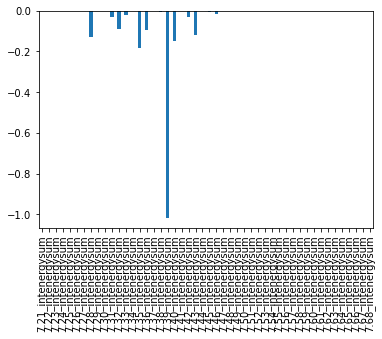

In [15]:
structure_df[TM7_energysum_cols].mean().plot.bar()

In [16]:
def gen_intenergy_plots_perTM(cols_list):
    i = 0
    for cols in cols_list:
        i += 1
        # get mean of each column representing a residue position's energy sum
        y_vals = structure_df[cols].mean()
        
        # get residue position numbers
        resnums = []
        for col in cols:
            resnums.append(col[:4])
        
        # plots
        matplotlib.rcParams['figure.figsize'] = [18, 5] #width, height (both in inches)
        matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()

        # create rectangles for bar plot
        rects = ax.bar(resnums, y_vals, width, label=resnums, color = 'black', edgecolor = "black", linewidth = 0.75)

        # Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
        plt.title("Mean Interaction Energy for Residues in TM" + str(i), fontsize = 24)
        ax.set_ylabel('Mean Interaction Energy\n(kcal/mol)', fontsize = 20)
        ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
        plt.xticks(rotation = 90, fontsize = 20)
        plt.yticks(fontsize = 20)
        ax.set_ylim([0, -4])
        fig.tight_layout()
        
        plt.xlim([-1,len(resnums)])
        plt.show()

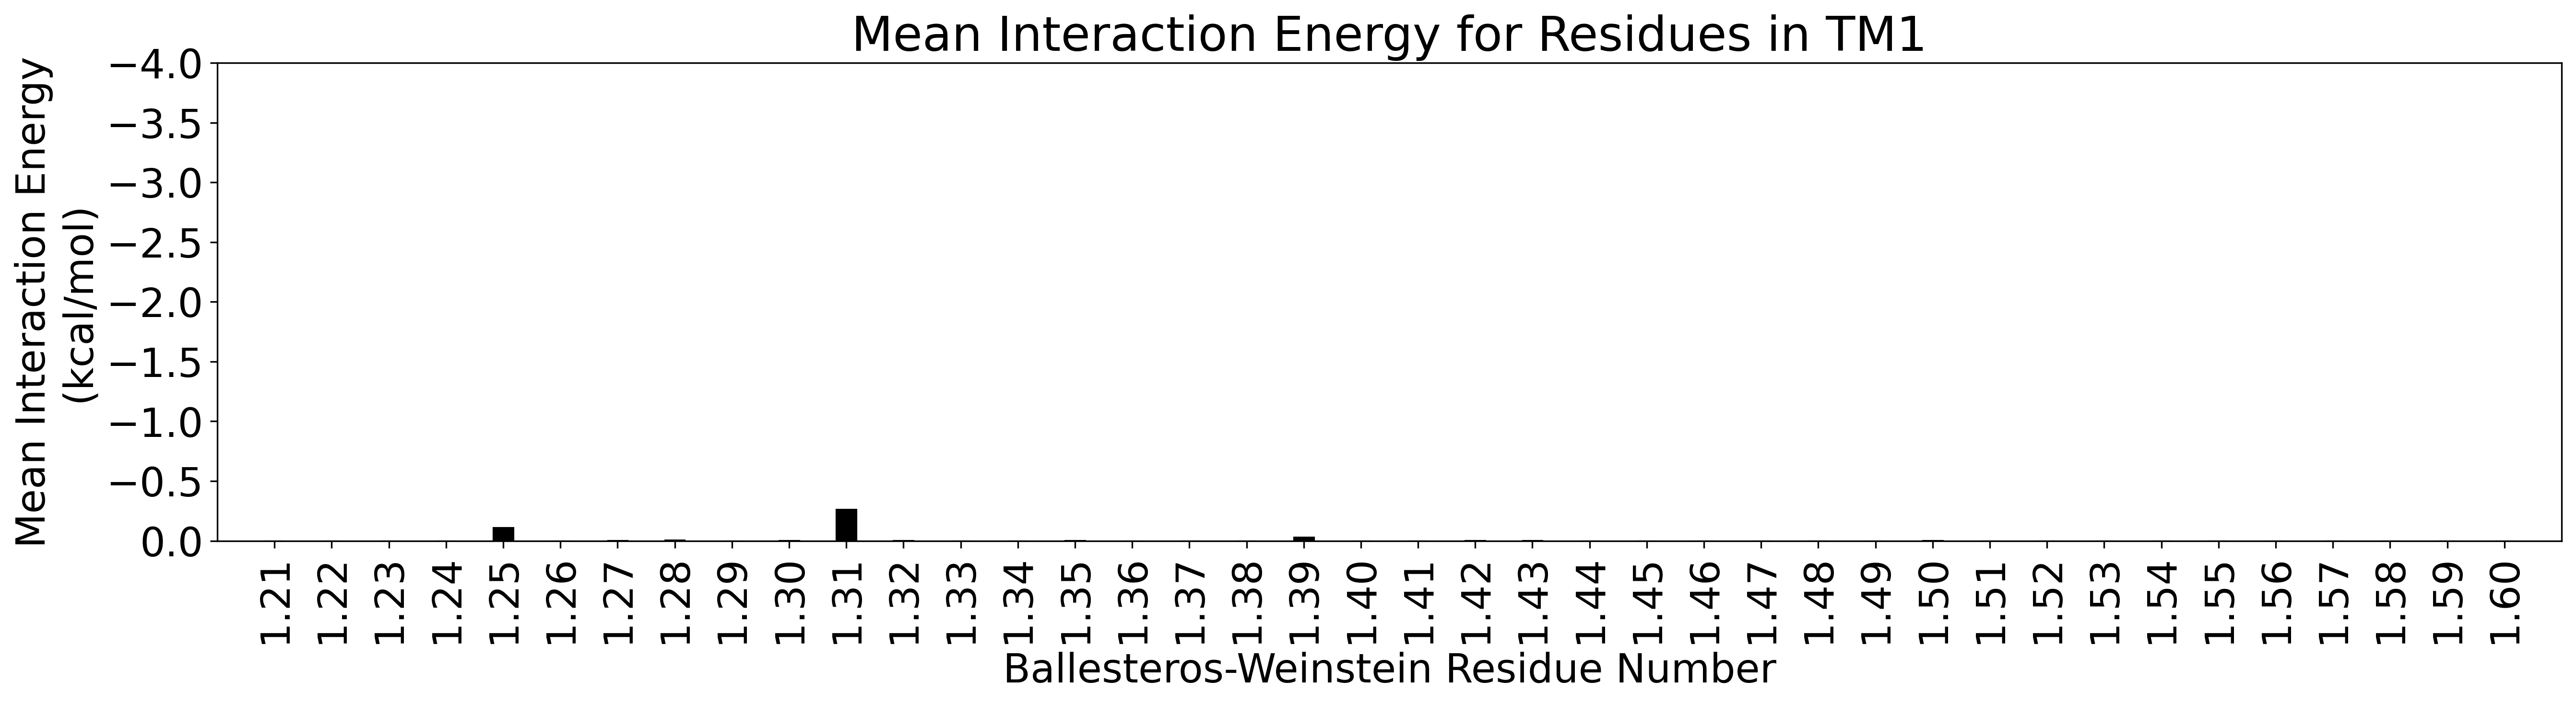

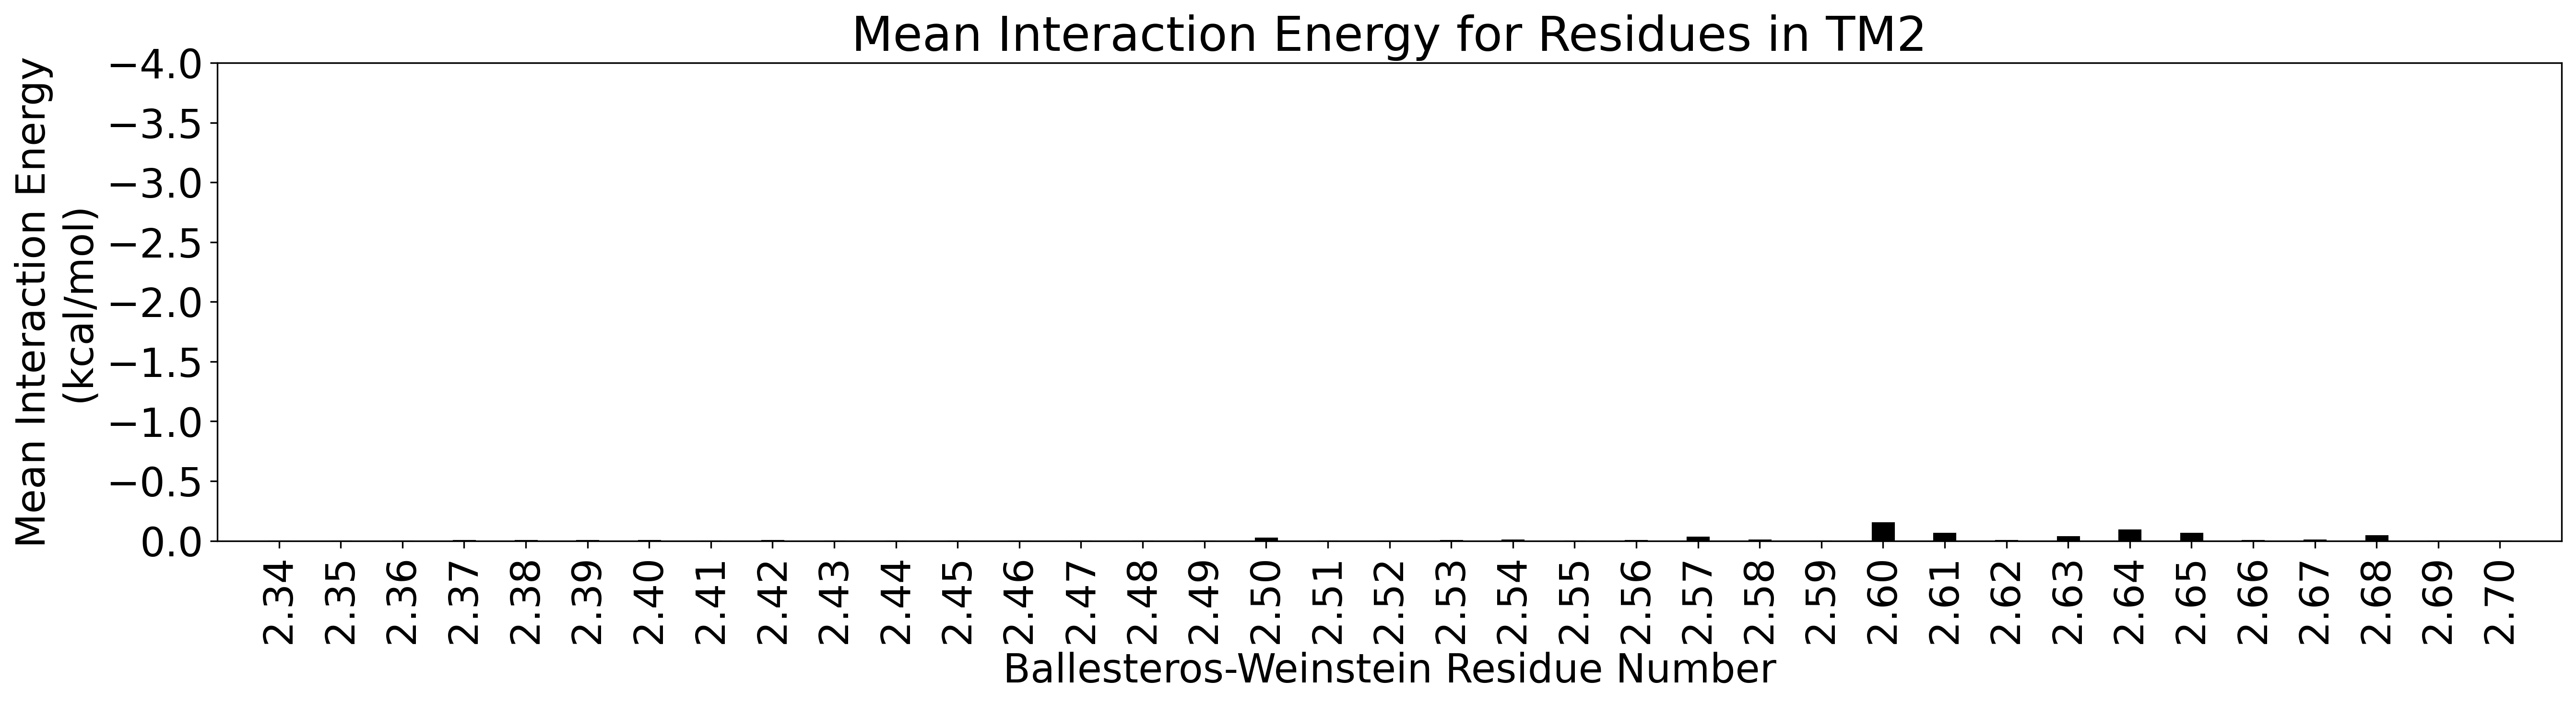

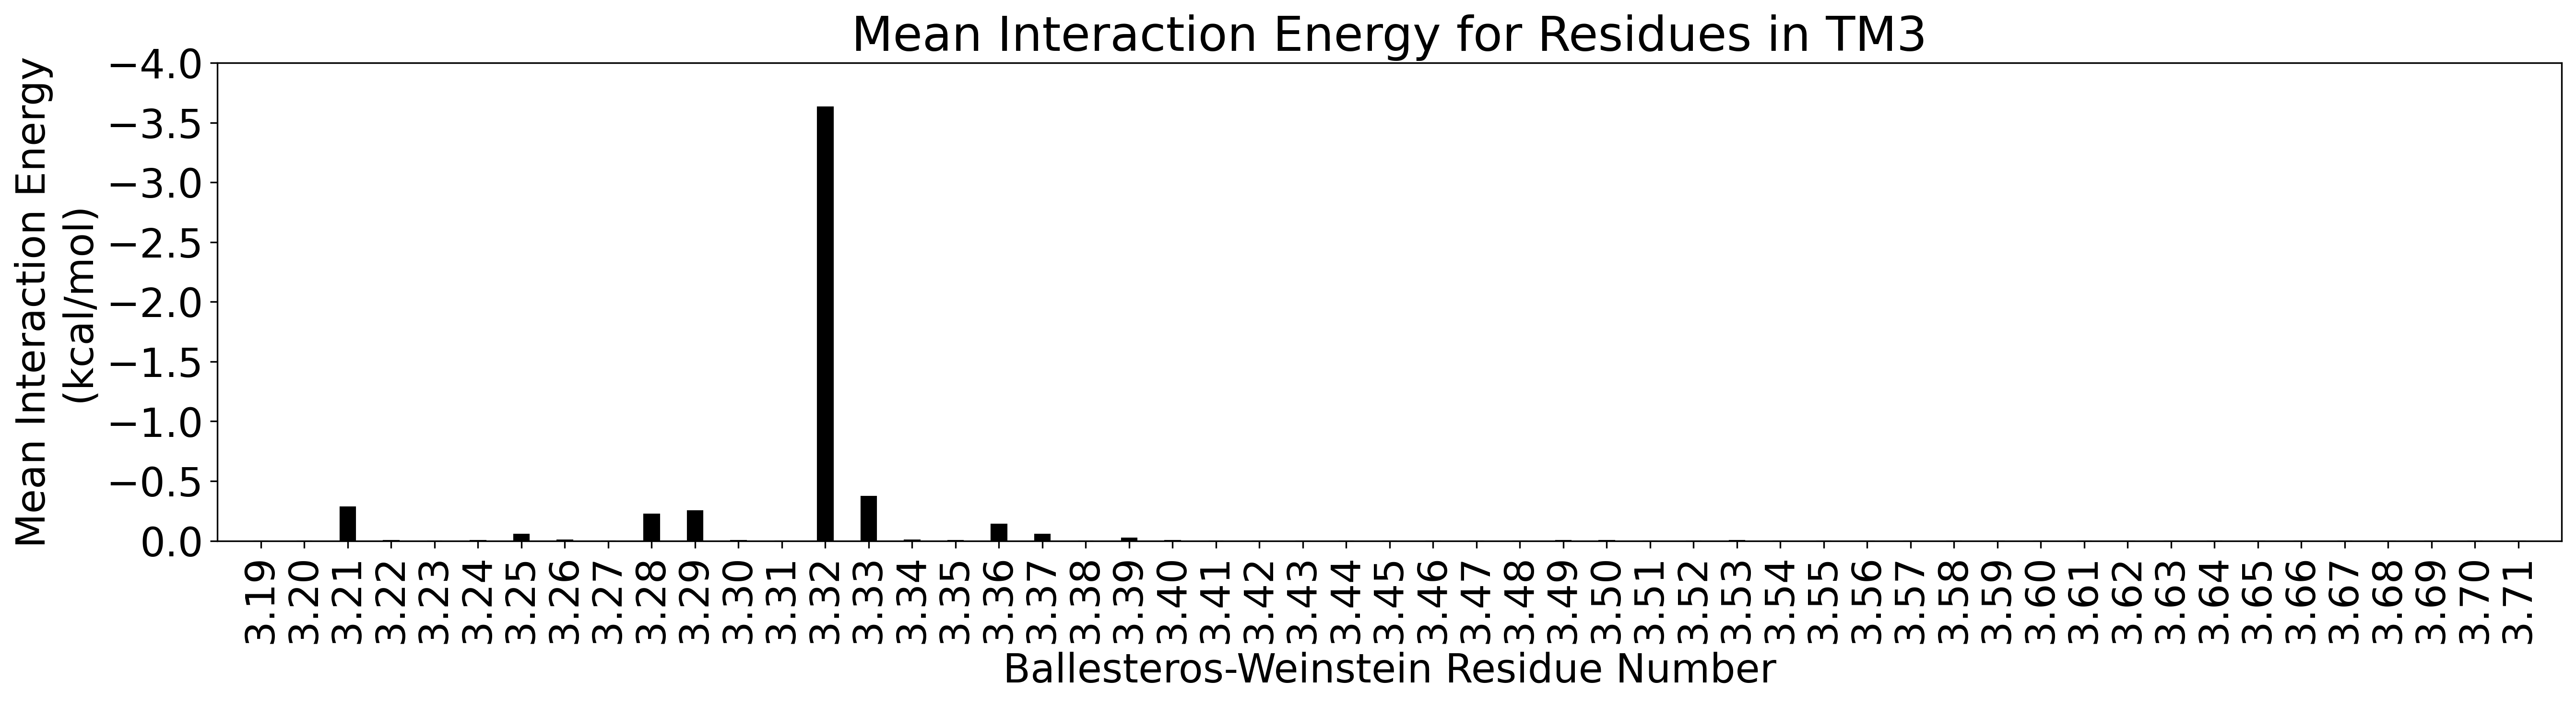

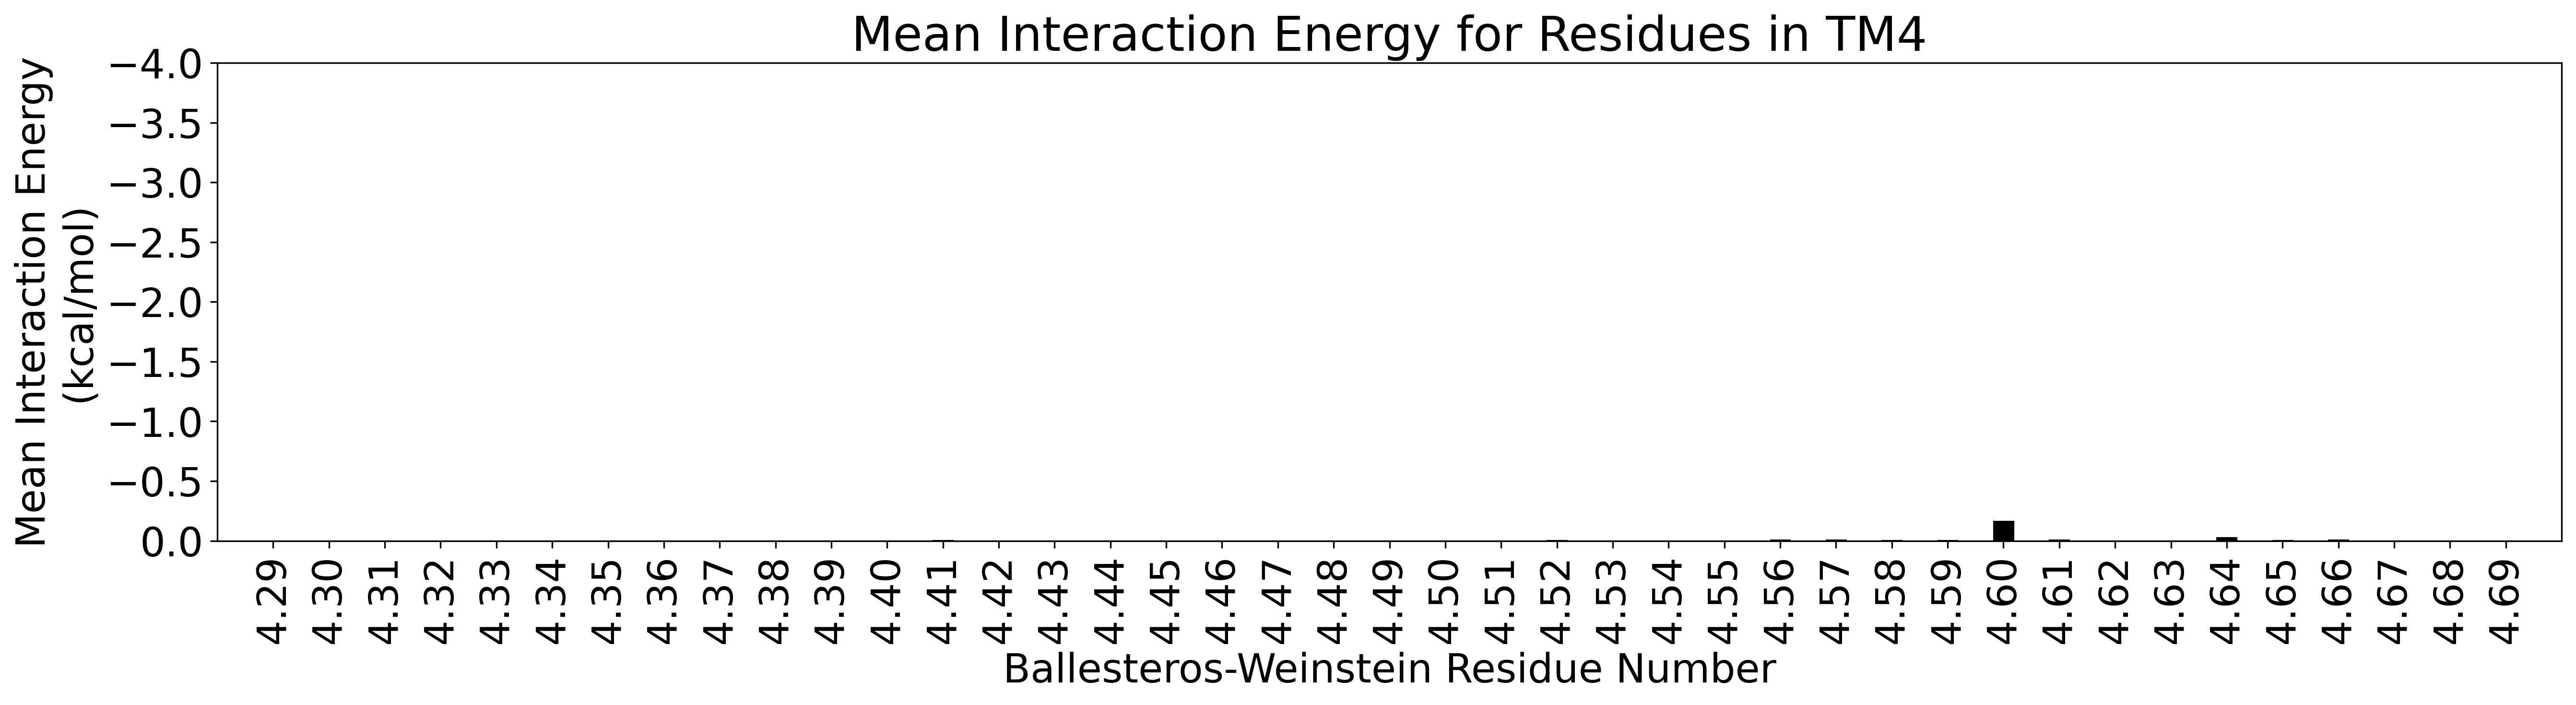

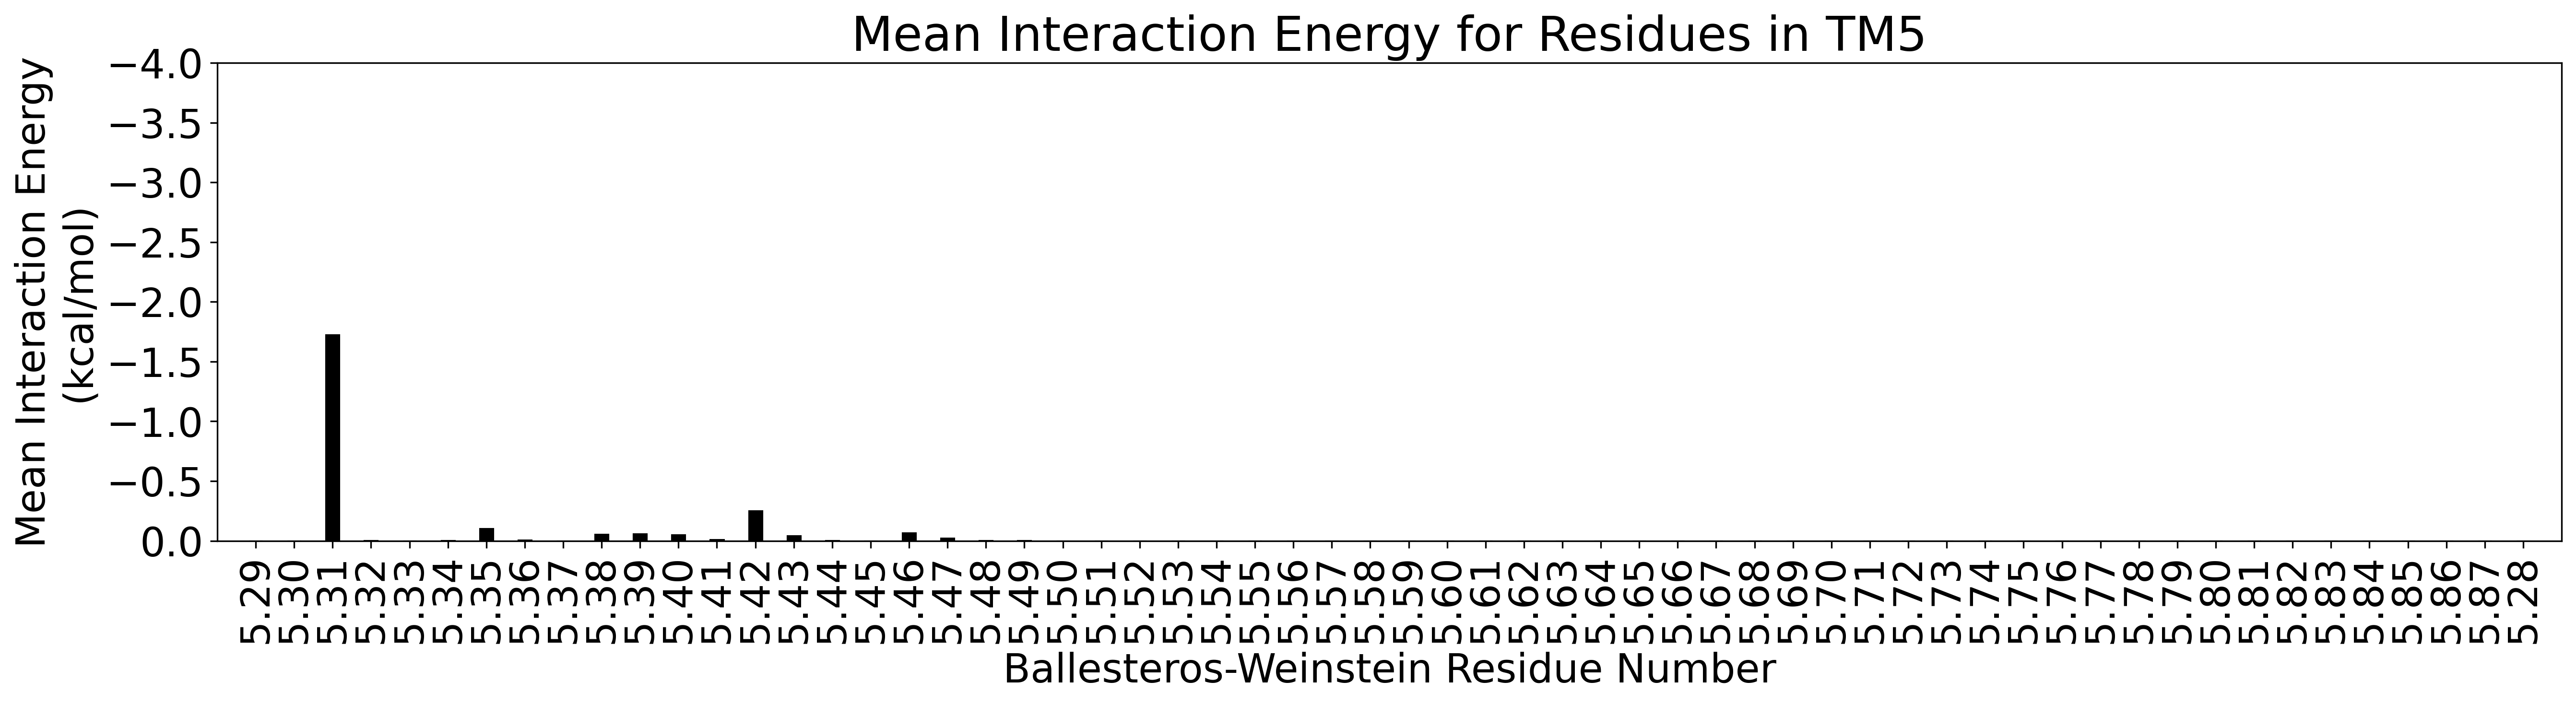

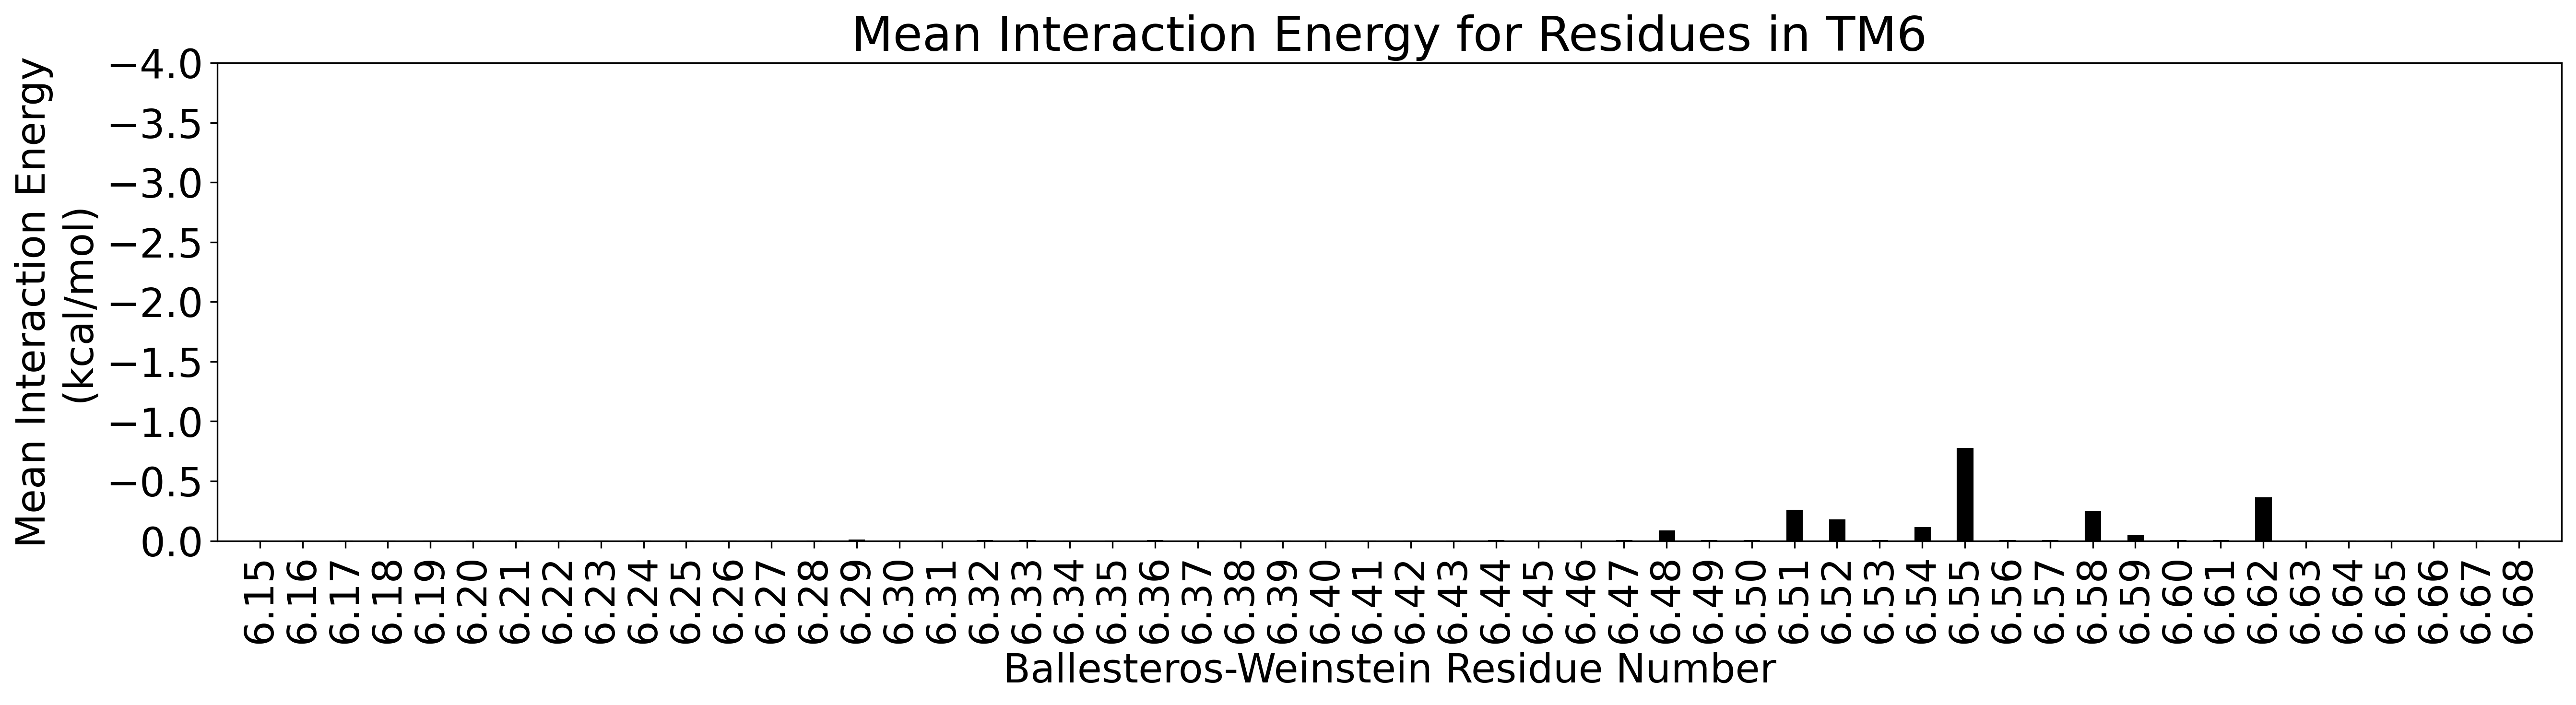

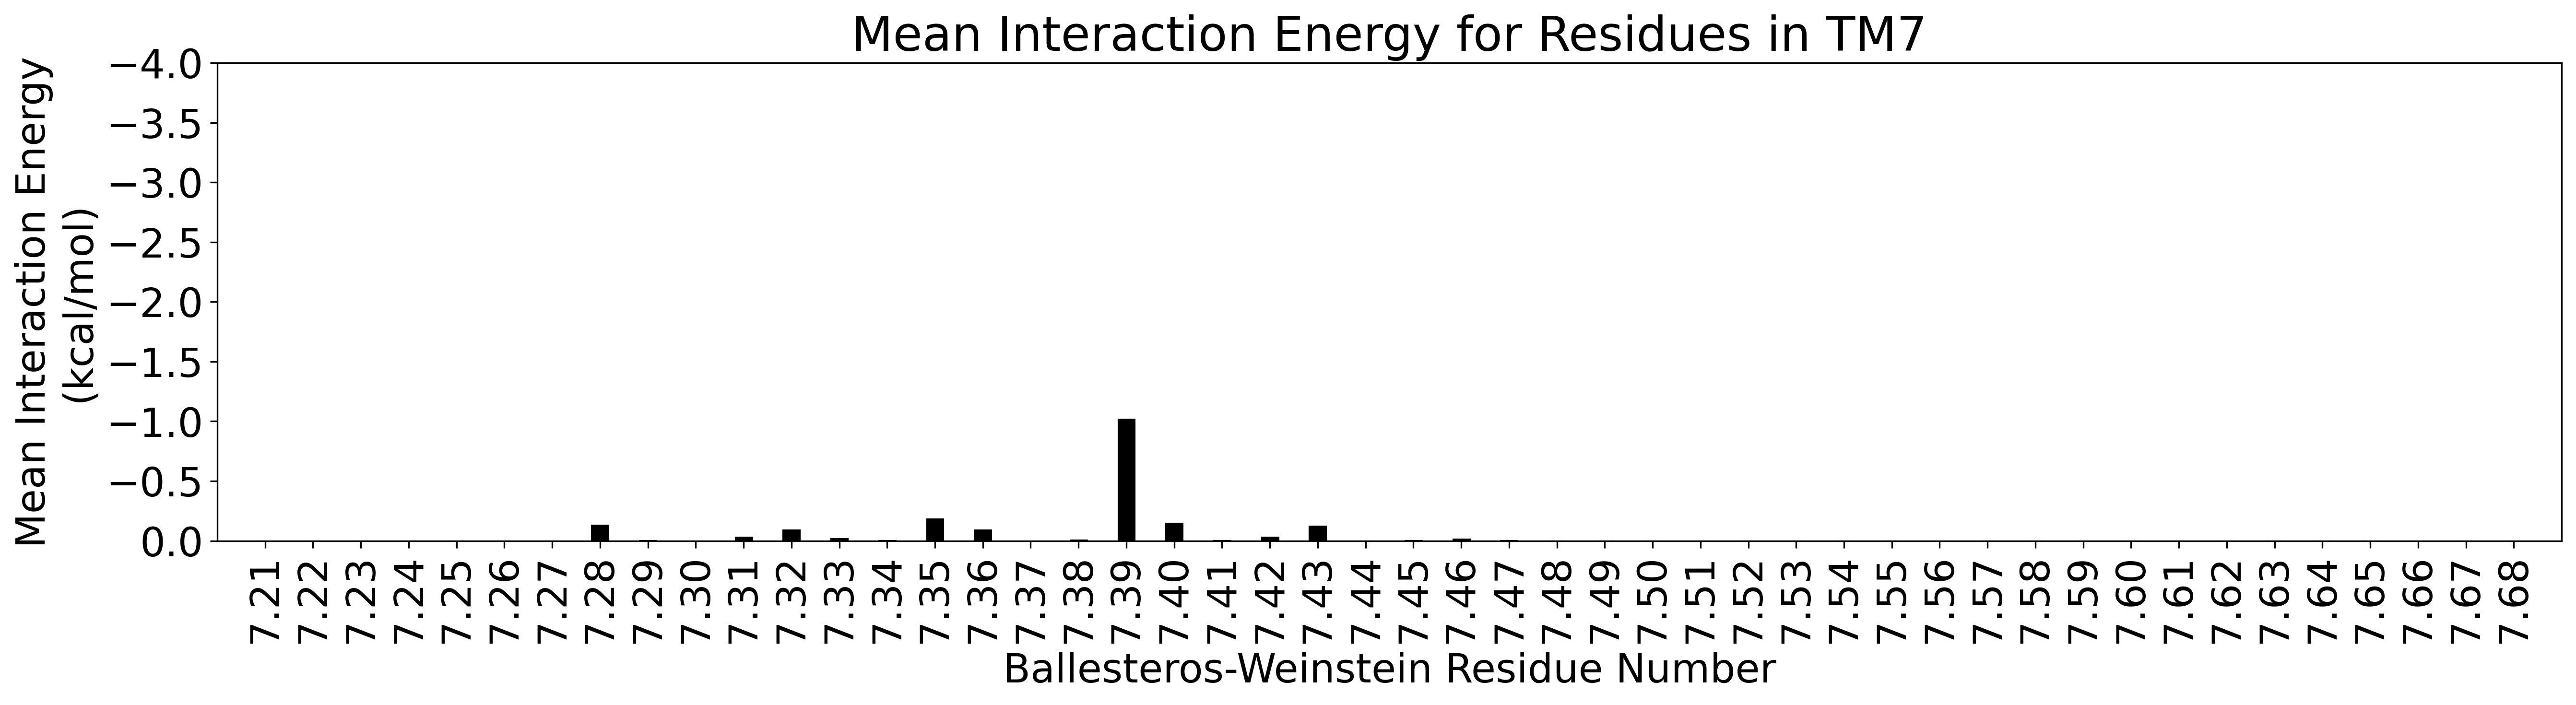

In [17]:
plot_cols = [TM1_energysum_cols, TM2_energysum_cols, TM3_energysum_cols, TM4_energysum_cols, TM5_energysum_cols, TM6_energysum_cols, TM7_energysum_cols]

gen_intenergy_plots_perTM(plot_cols)

## Intenergysum plot (Binders vs. Non-binders)

In [41]:
energysum_cols = []

TM1_energysum_cols = []
TM2_energysum_cols = []
TM3_energysum_cols = []
TM4_energysum_cols = []
TM5_energysum_cols = []
TM6_energysum_cols = []
TM7_energysum_cols = []

for col in structure_df.columns.tolist():
    if 'intenergysum' in col:
        energysum_cols.append(col)
        if '1.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM1_energysum_cols.append(col)
        if '2.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM2_energysum_cols.append(col)
        if '3.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM3_energysum_cols.append(col)
        if '4.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM4_energysum_cols.append(col)
        if '5.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM5_energysum_cols.append(col)
        if '6.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM6_energysum_cols.append(col)
        if '7.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM7_energysum_cols.append(col)

In [42]:
structure_df_binders = structure_df.loc[(structure_df['Function'] == 'Agonist') | (structure_df['Function'] == 'Antagonist') | (structure_df['Function'] == 'Inverse agonist') | (structure_df['Function'] == 'Agonist (partial)')]
structure_df_nonbinders = structure_df.loc[(structure_df['Function'] == 'Inactive')]

In [43]:
def gen_intenergy_plots_perTM_classbased(cols_list):
    i = 0
    for cols in cols_list:
        i += 1
        # get mean of each column representing a residue position's energy sum
        y_vals_b = structure_df_binders[cols].mean()
        y_vals_nb = structure_df_nonbinders[cols].mean()
        
        # get residue position numbers
        resnums = []
        for col in cols:
            resnums.append(col[:4])
        
        # plots
        matplotlib.rcParams['figure.figsize'] = [10, 4] #width, height (both in inches)
        matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
        matplotlib.rcParams["font.family"] = "arial"
        width = 0.8  # the width of the bars
        fig, ax = plt.subplots()
        
        x = np.arange(len(resnums))

        # create rectangles for bar plot
        rects1 = ax.bar(x - (width/4), y_vals_b, width/2, label=resnums, color = 'red', edgecolor = "black", linewidth = 0.75)
        rects2 = ax.bar(x + (width/4), y_vals_nb, width/2, label=resnums, color = 'blue', edgecolor = "black", linewidth = 0.75)

        # Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
        plt.title("Mean Interaction Energy for Residue Positions in TM Domain " + str(i) + '\nPossessing Interactions in ≥10 Complexes\n', fontsize = 18)
        ax.set_ylabel('Mean Interaction\nEnergy (kcal/mol)', fontsize = 18)
        ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 18)
        plt.xticks(rotation = 90, fontsize = 18)
        ax.set_xticks(x)
        ax.set_xticklabels(resnums, rotation = 90, fontsize = 18)
        plt.yticks(fontsize = 18)
        ax.set_ylim([0, -5])
        
        # Add Legend
        custom_lines = [Line2D([0], [0], color='red', lw=4),
                        Line2D([0], [0], color='blue', lw=4)]

        ax.legend(custom_lines, ['Active', 'Inactive'], fontsize = 18, loc = 'upper right')
        
        fig.tight_layout()
        
        plt.xlim([-0.5,len(resnums)-0.5])
        plt.savefig('plots/manuscript_plots/TM' + str(i) + '_intenergyplot.png')
        plt.show()

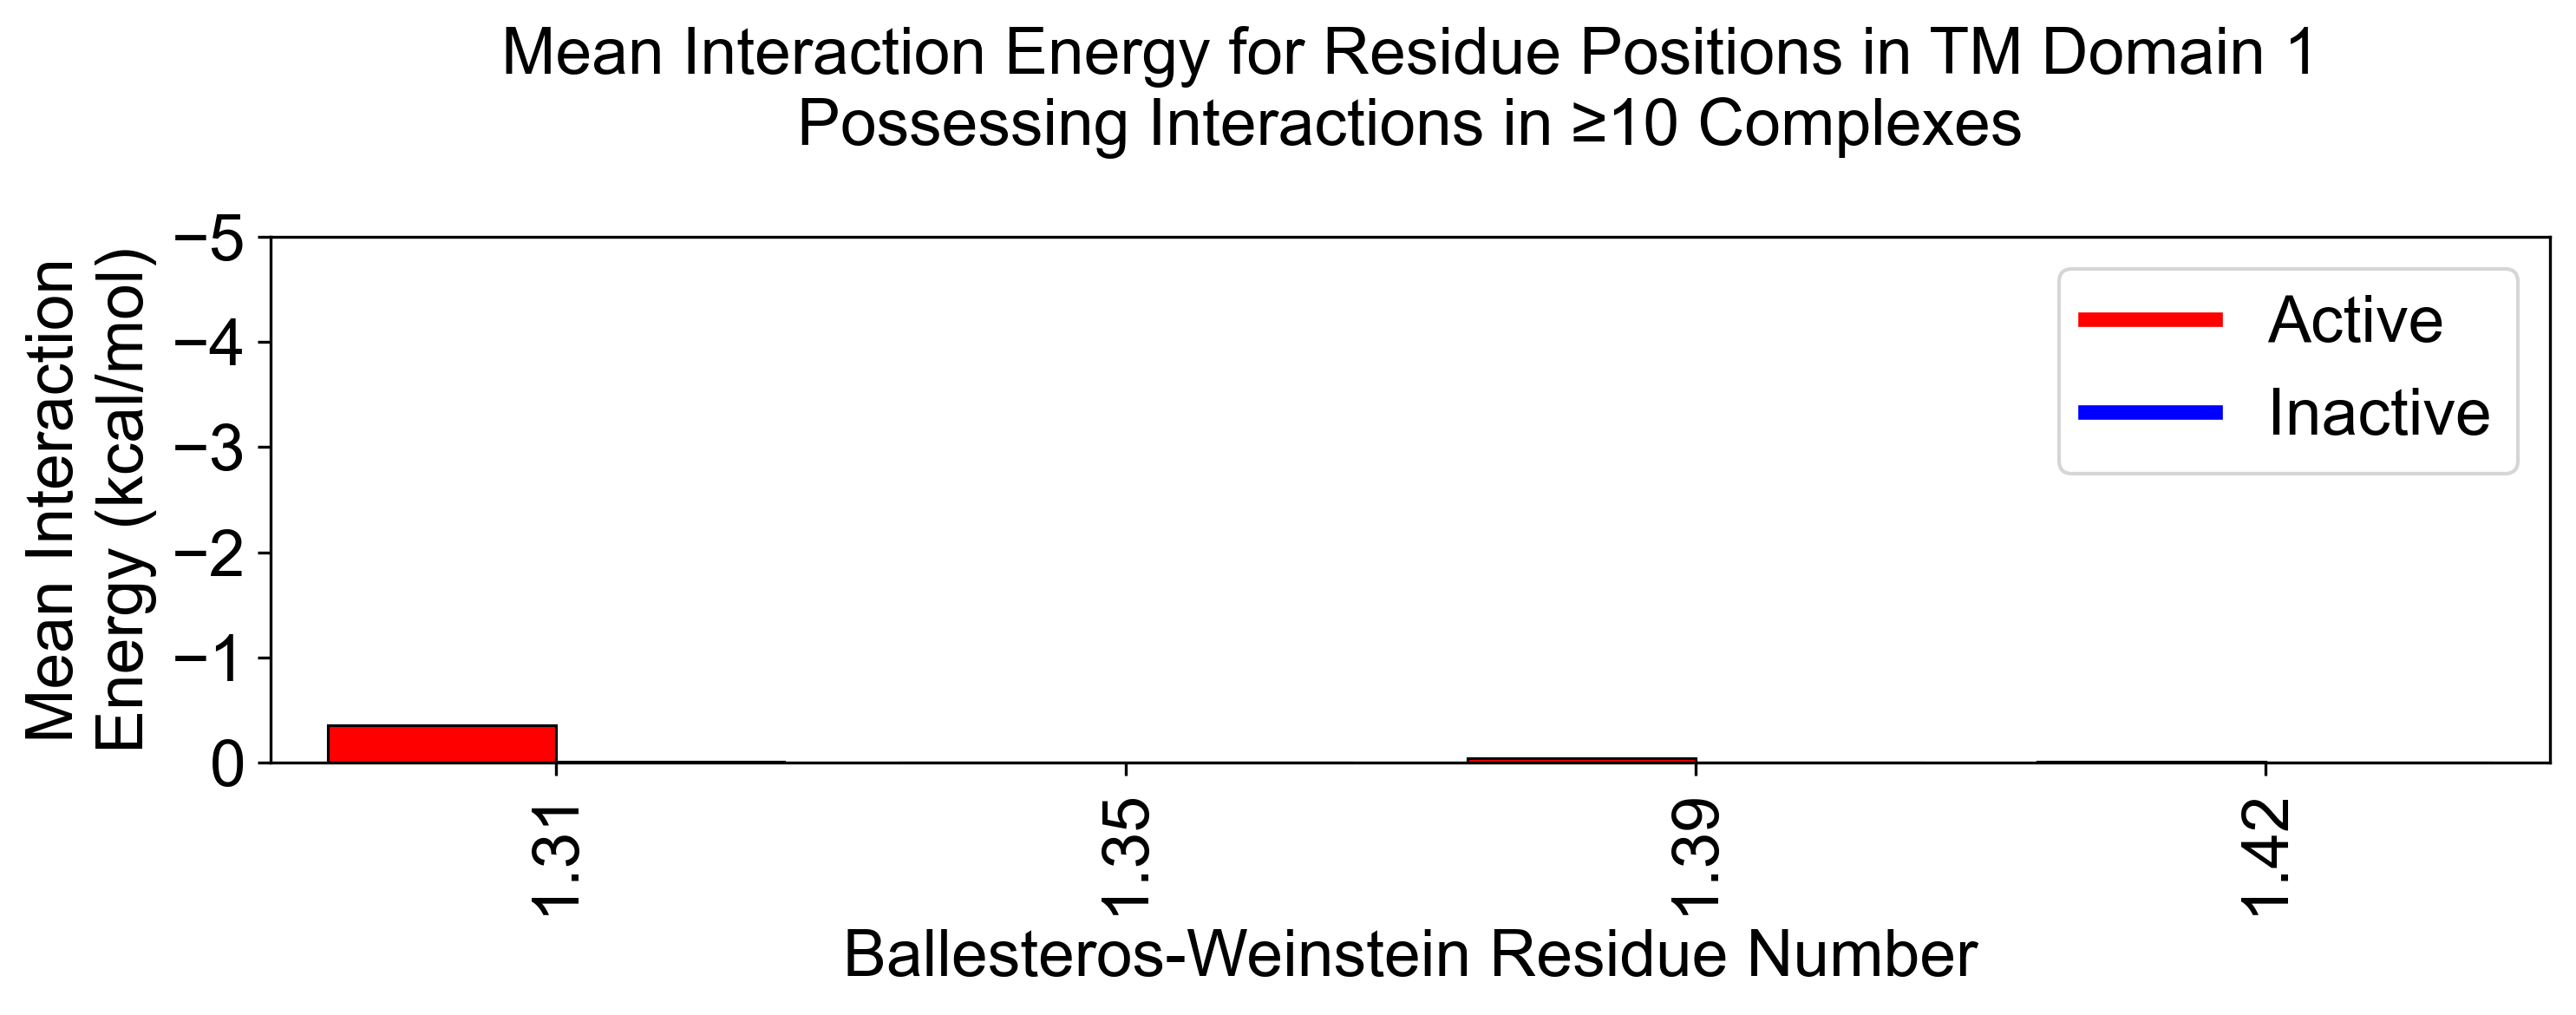

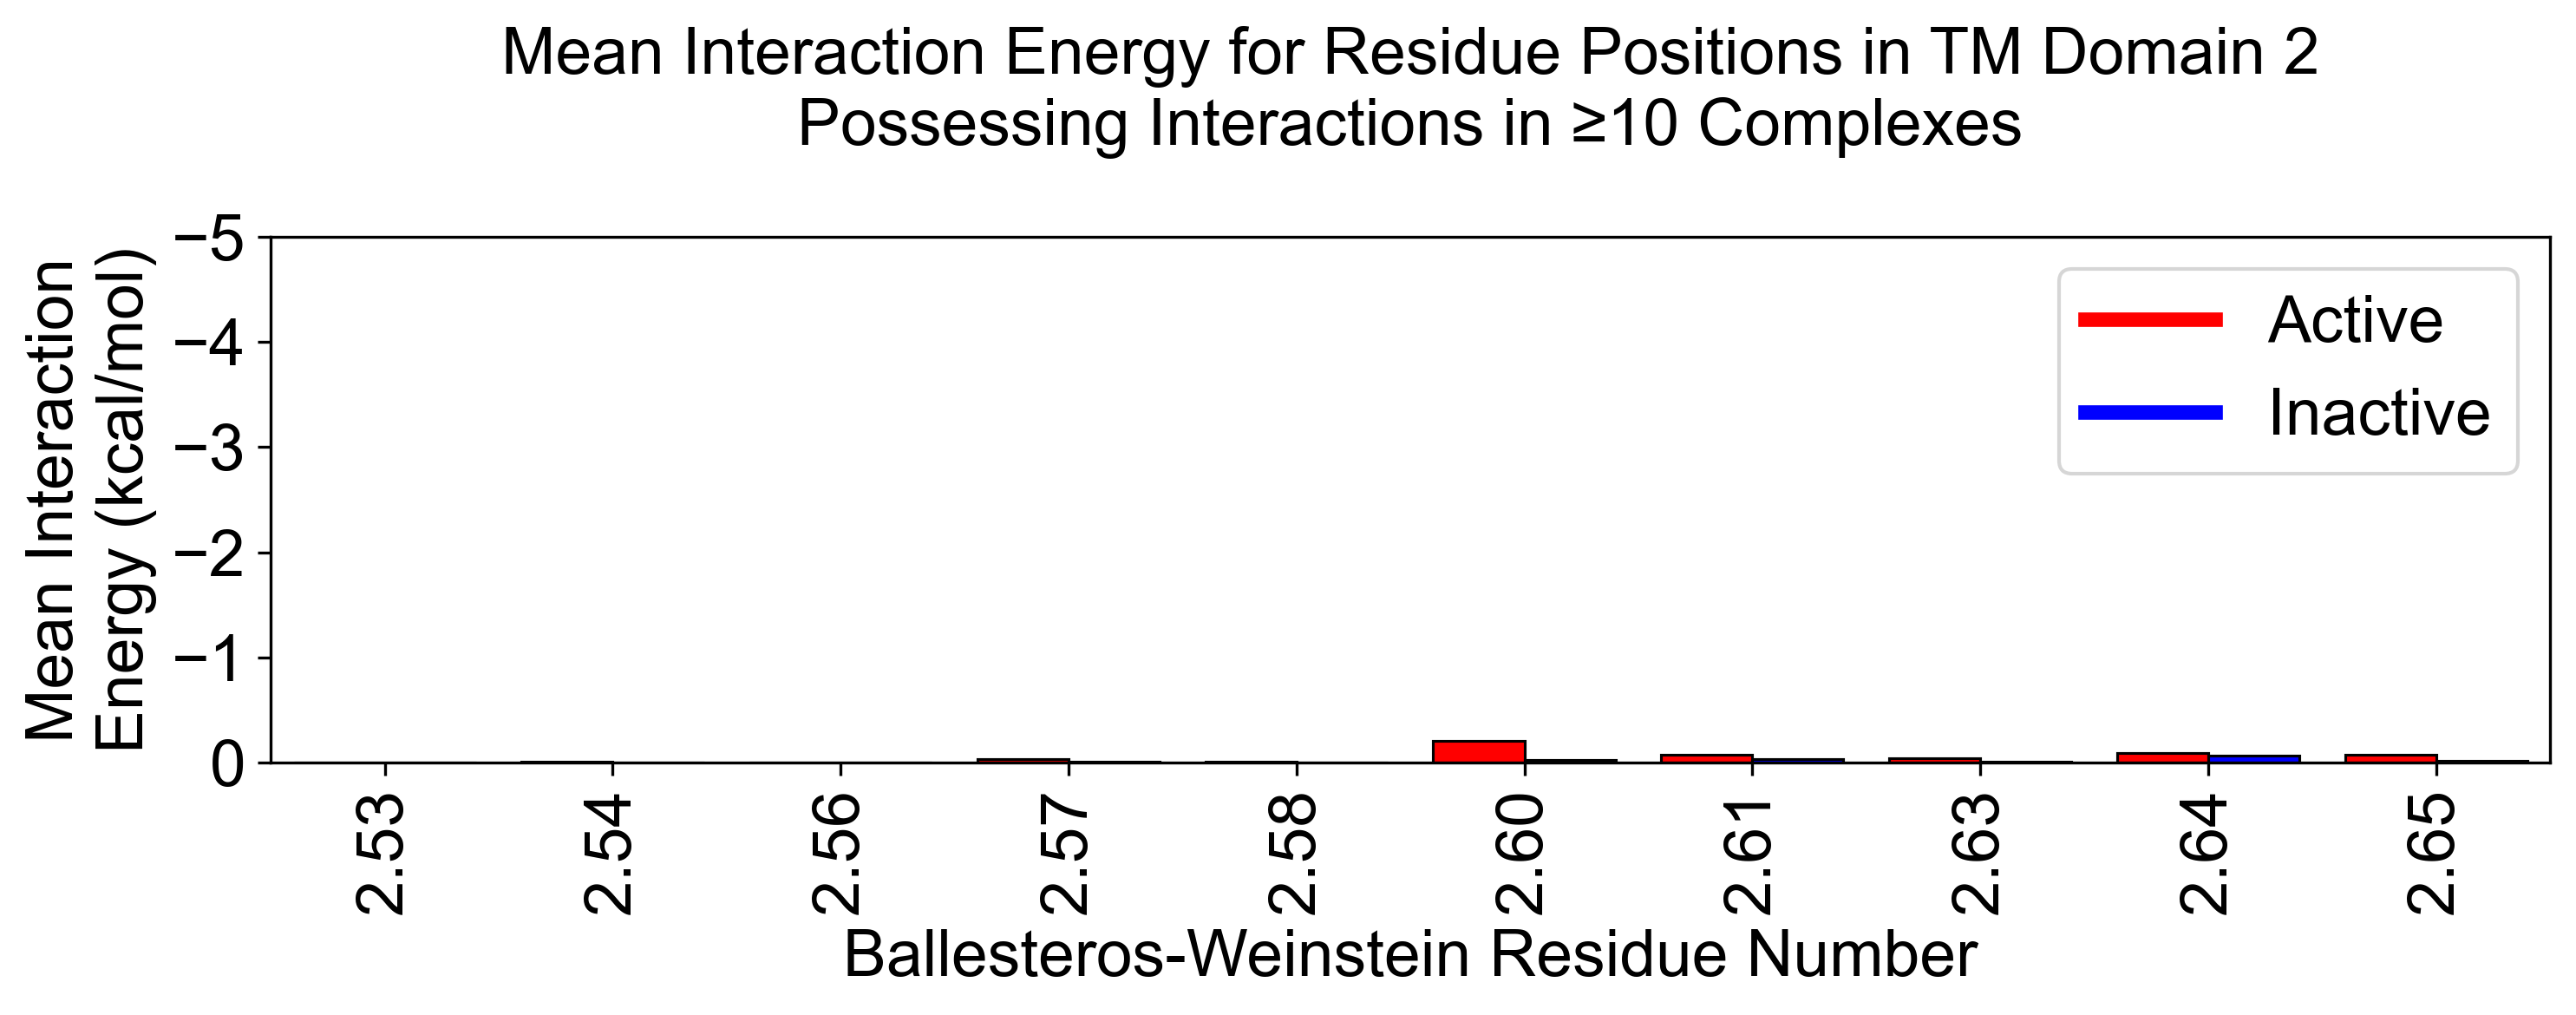

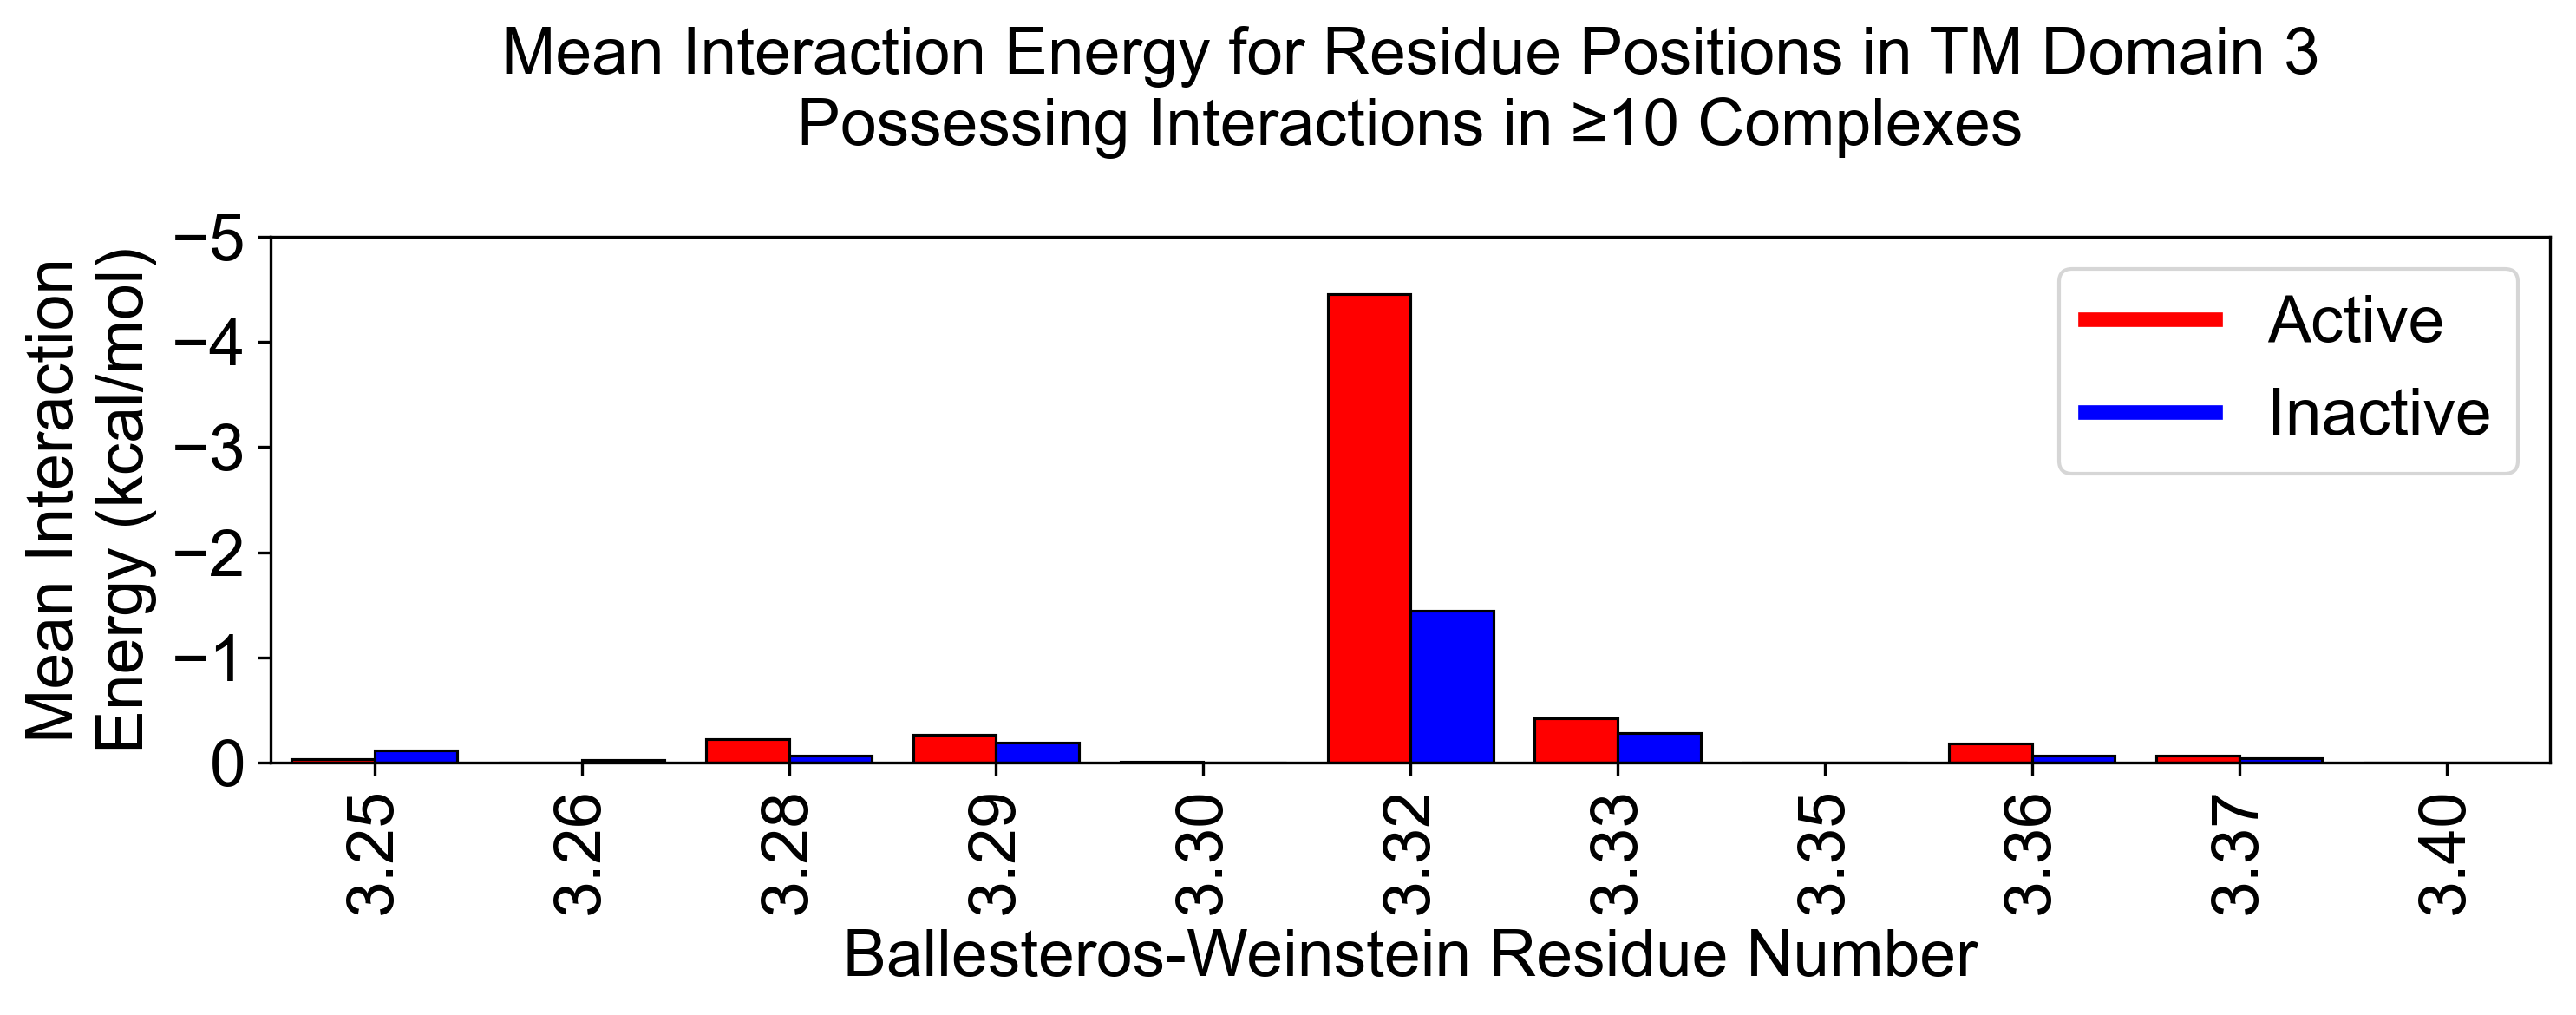

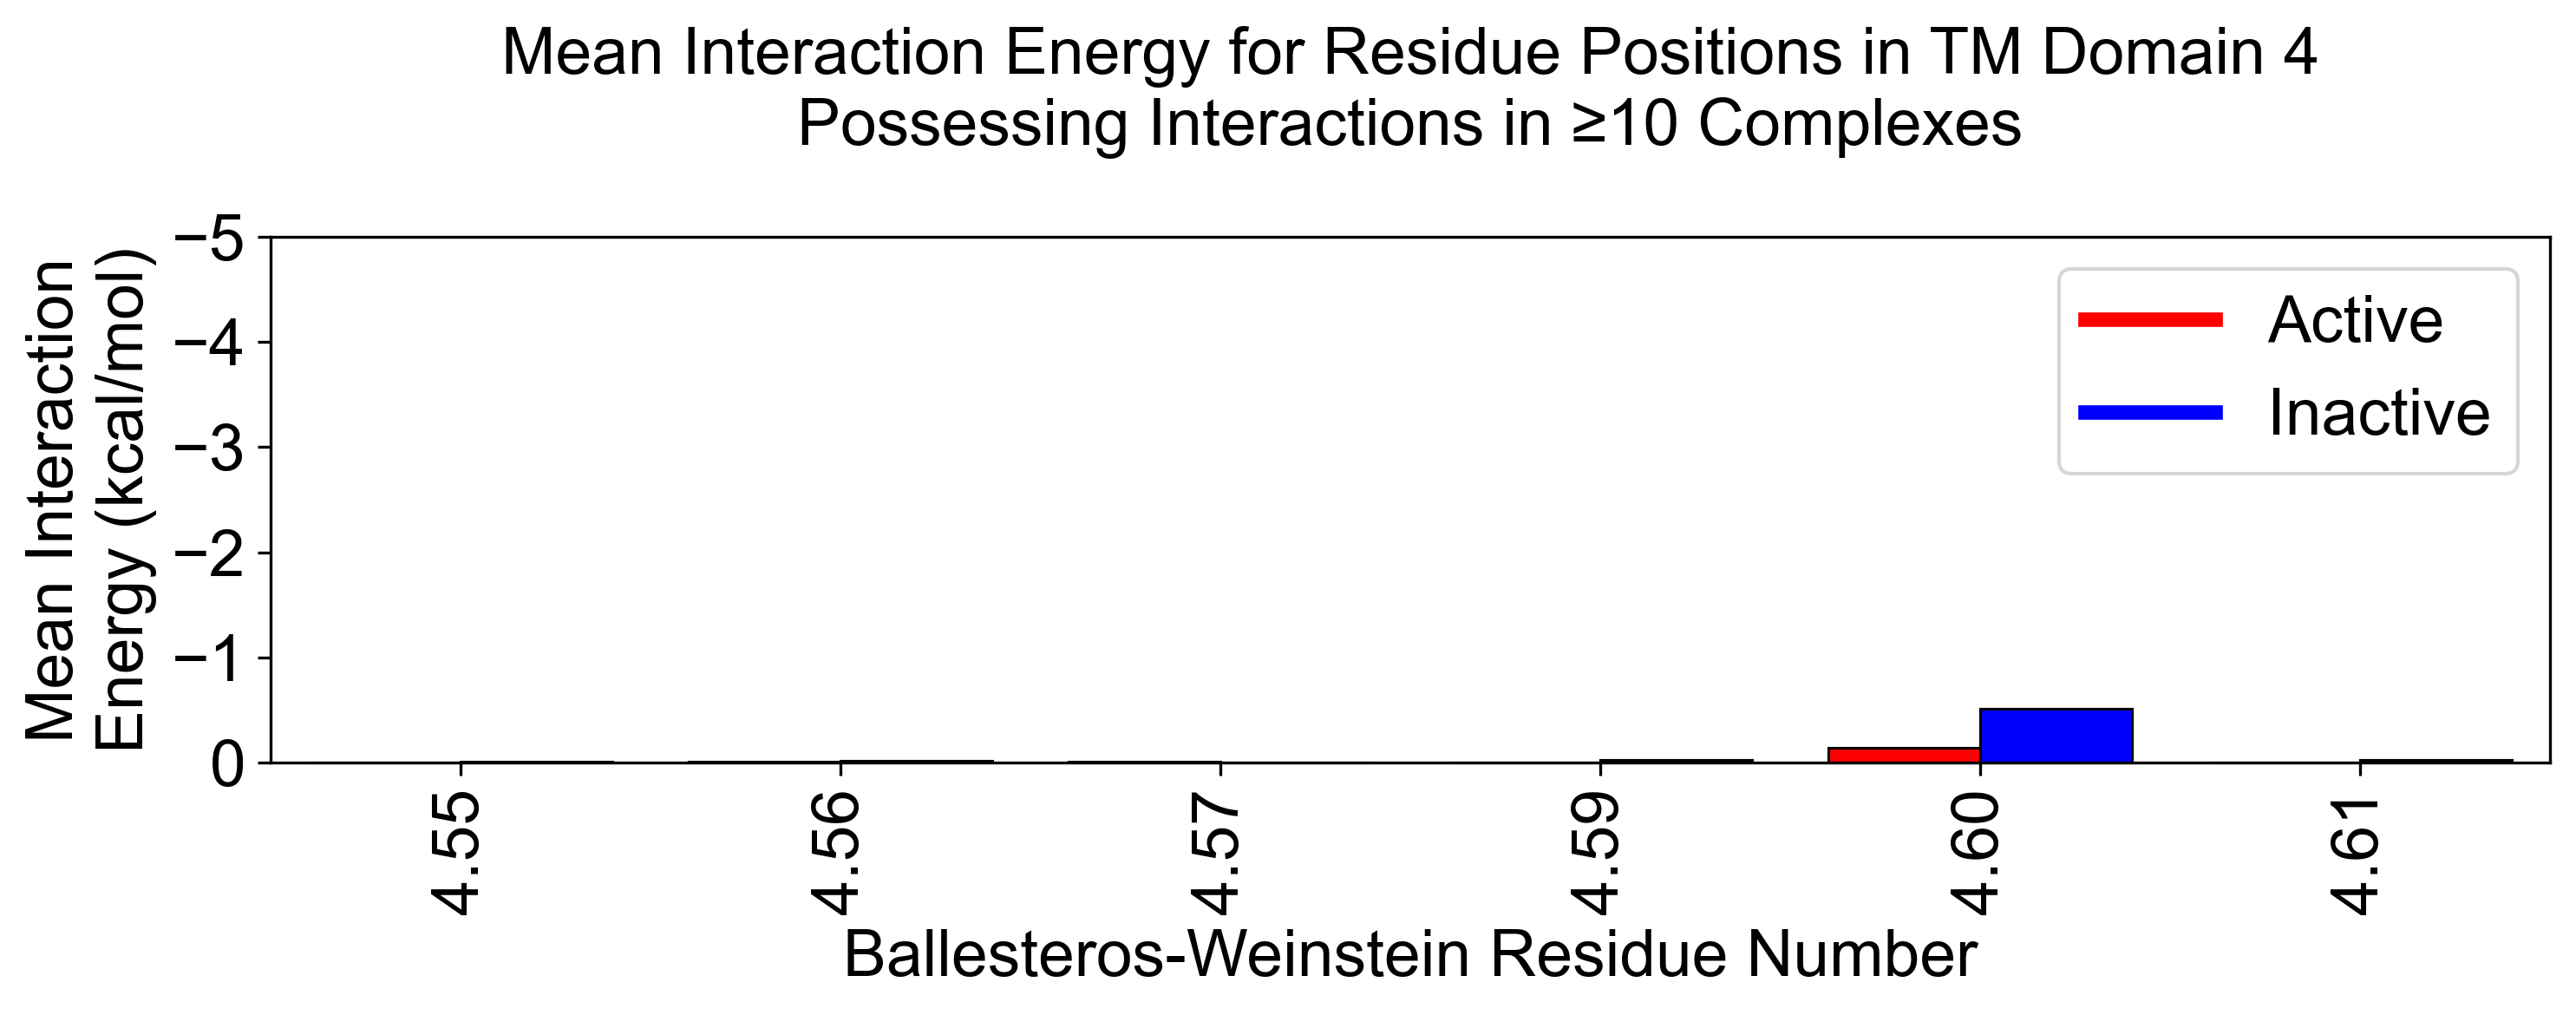

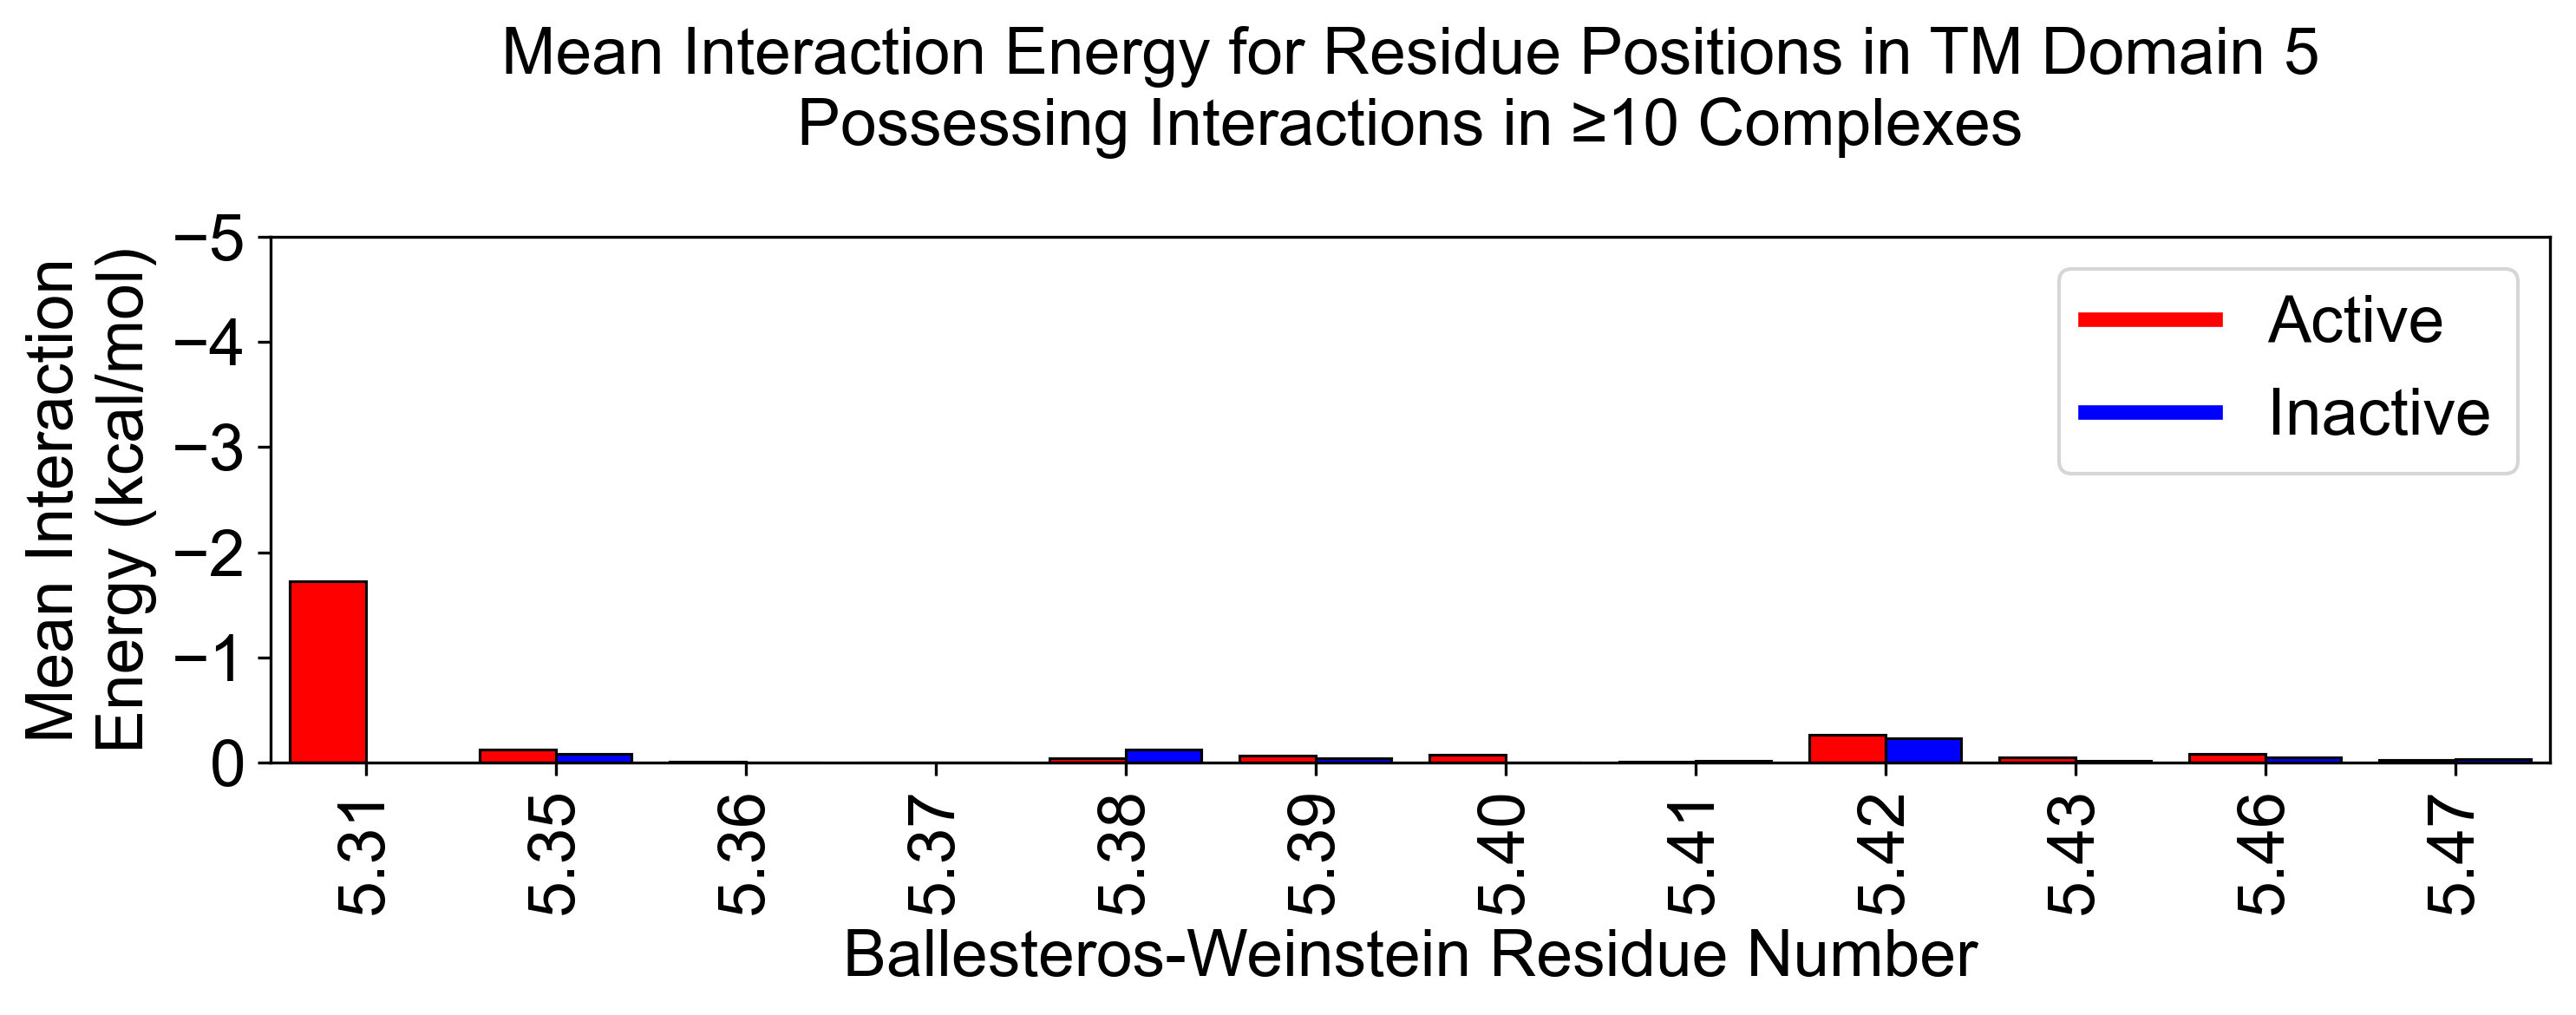

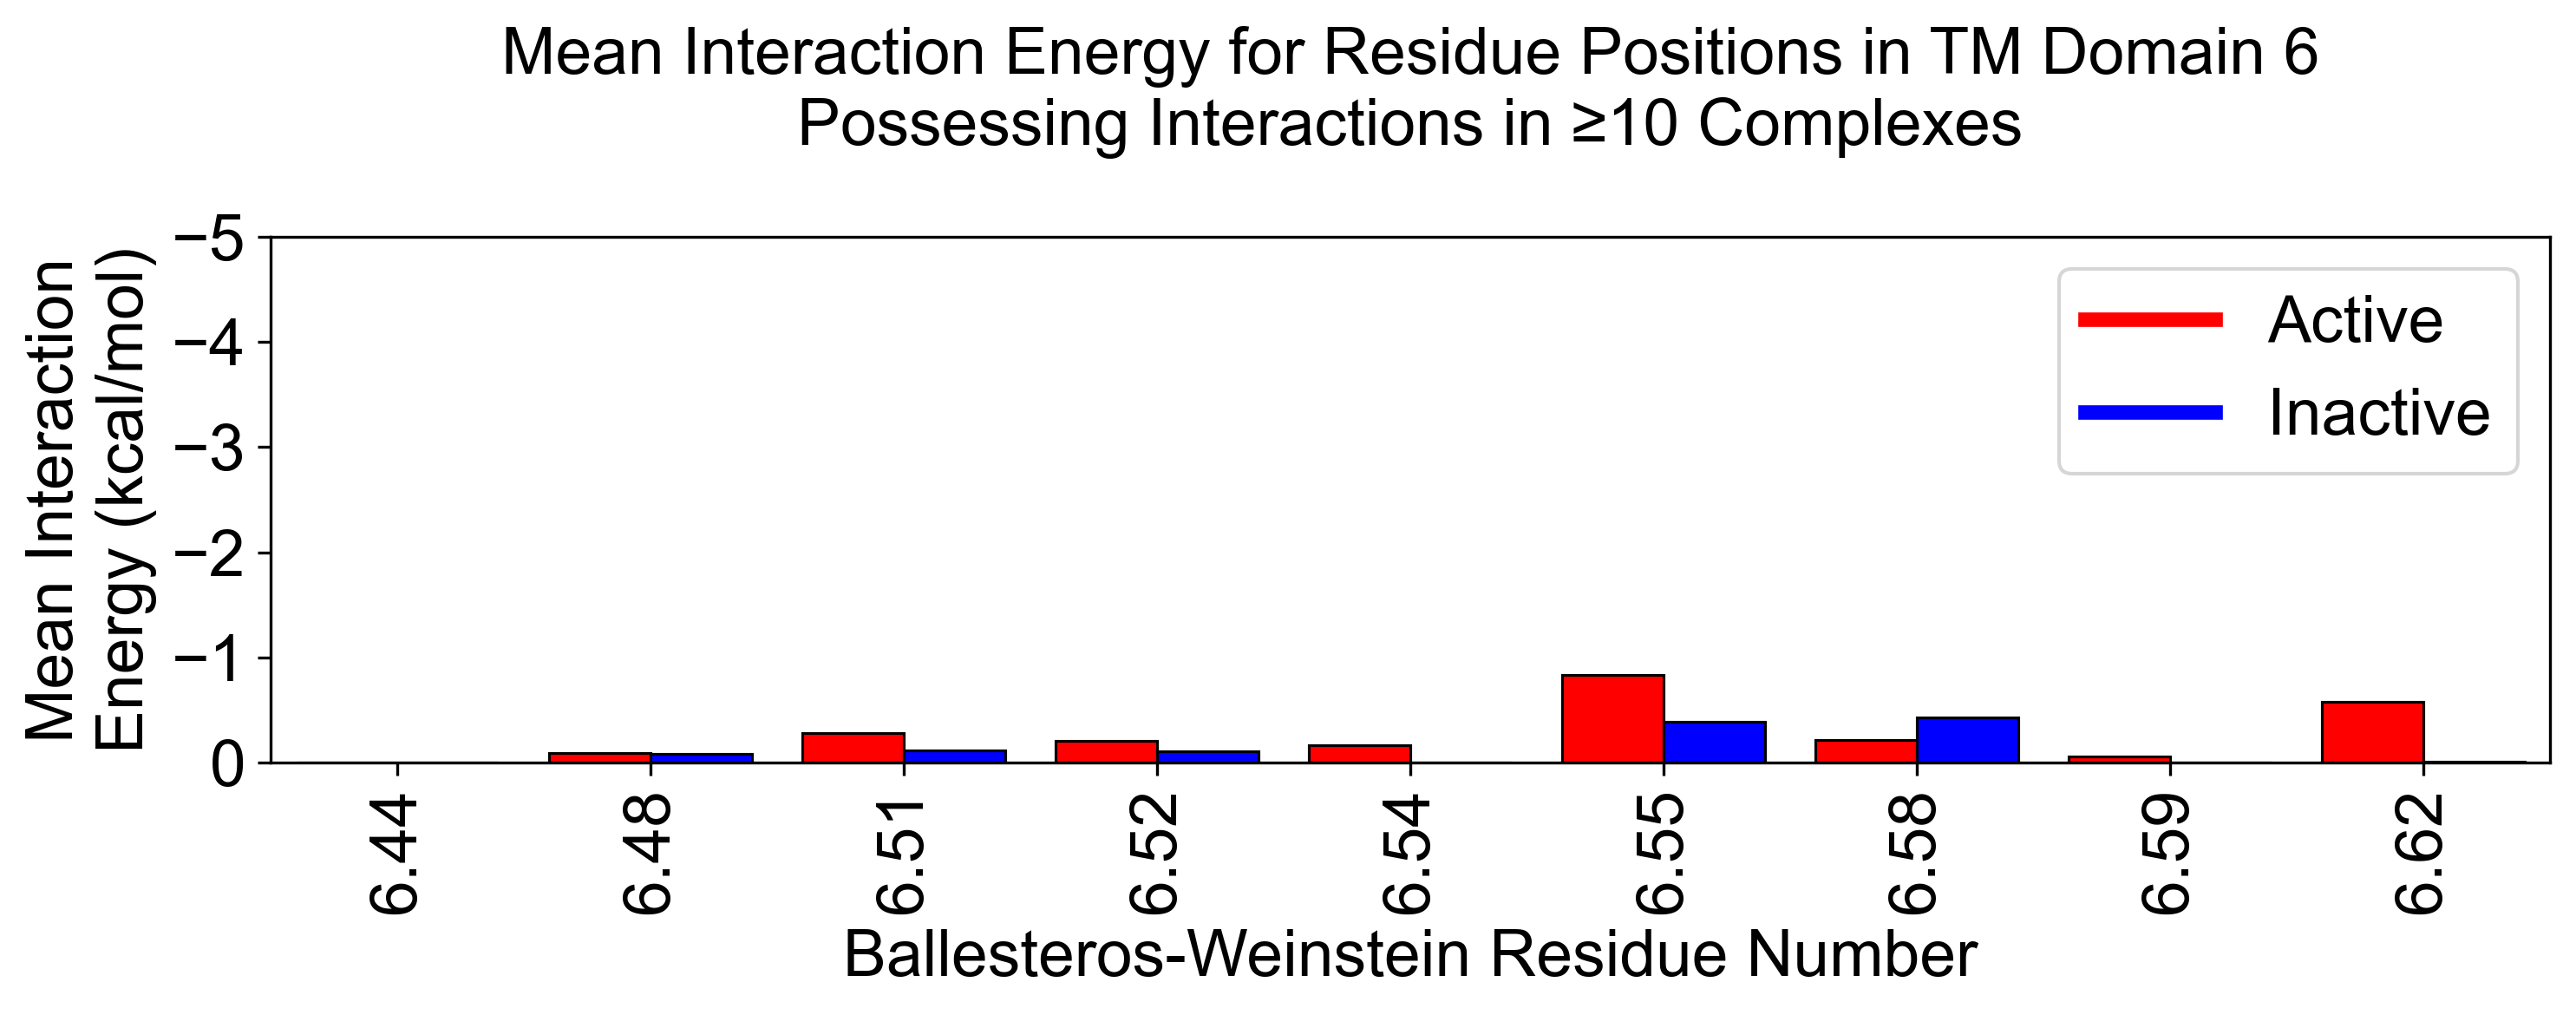

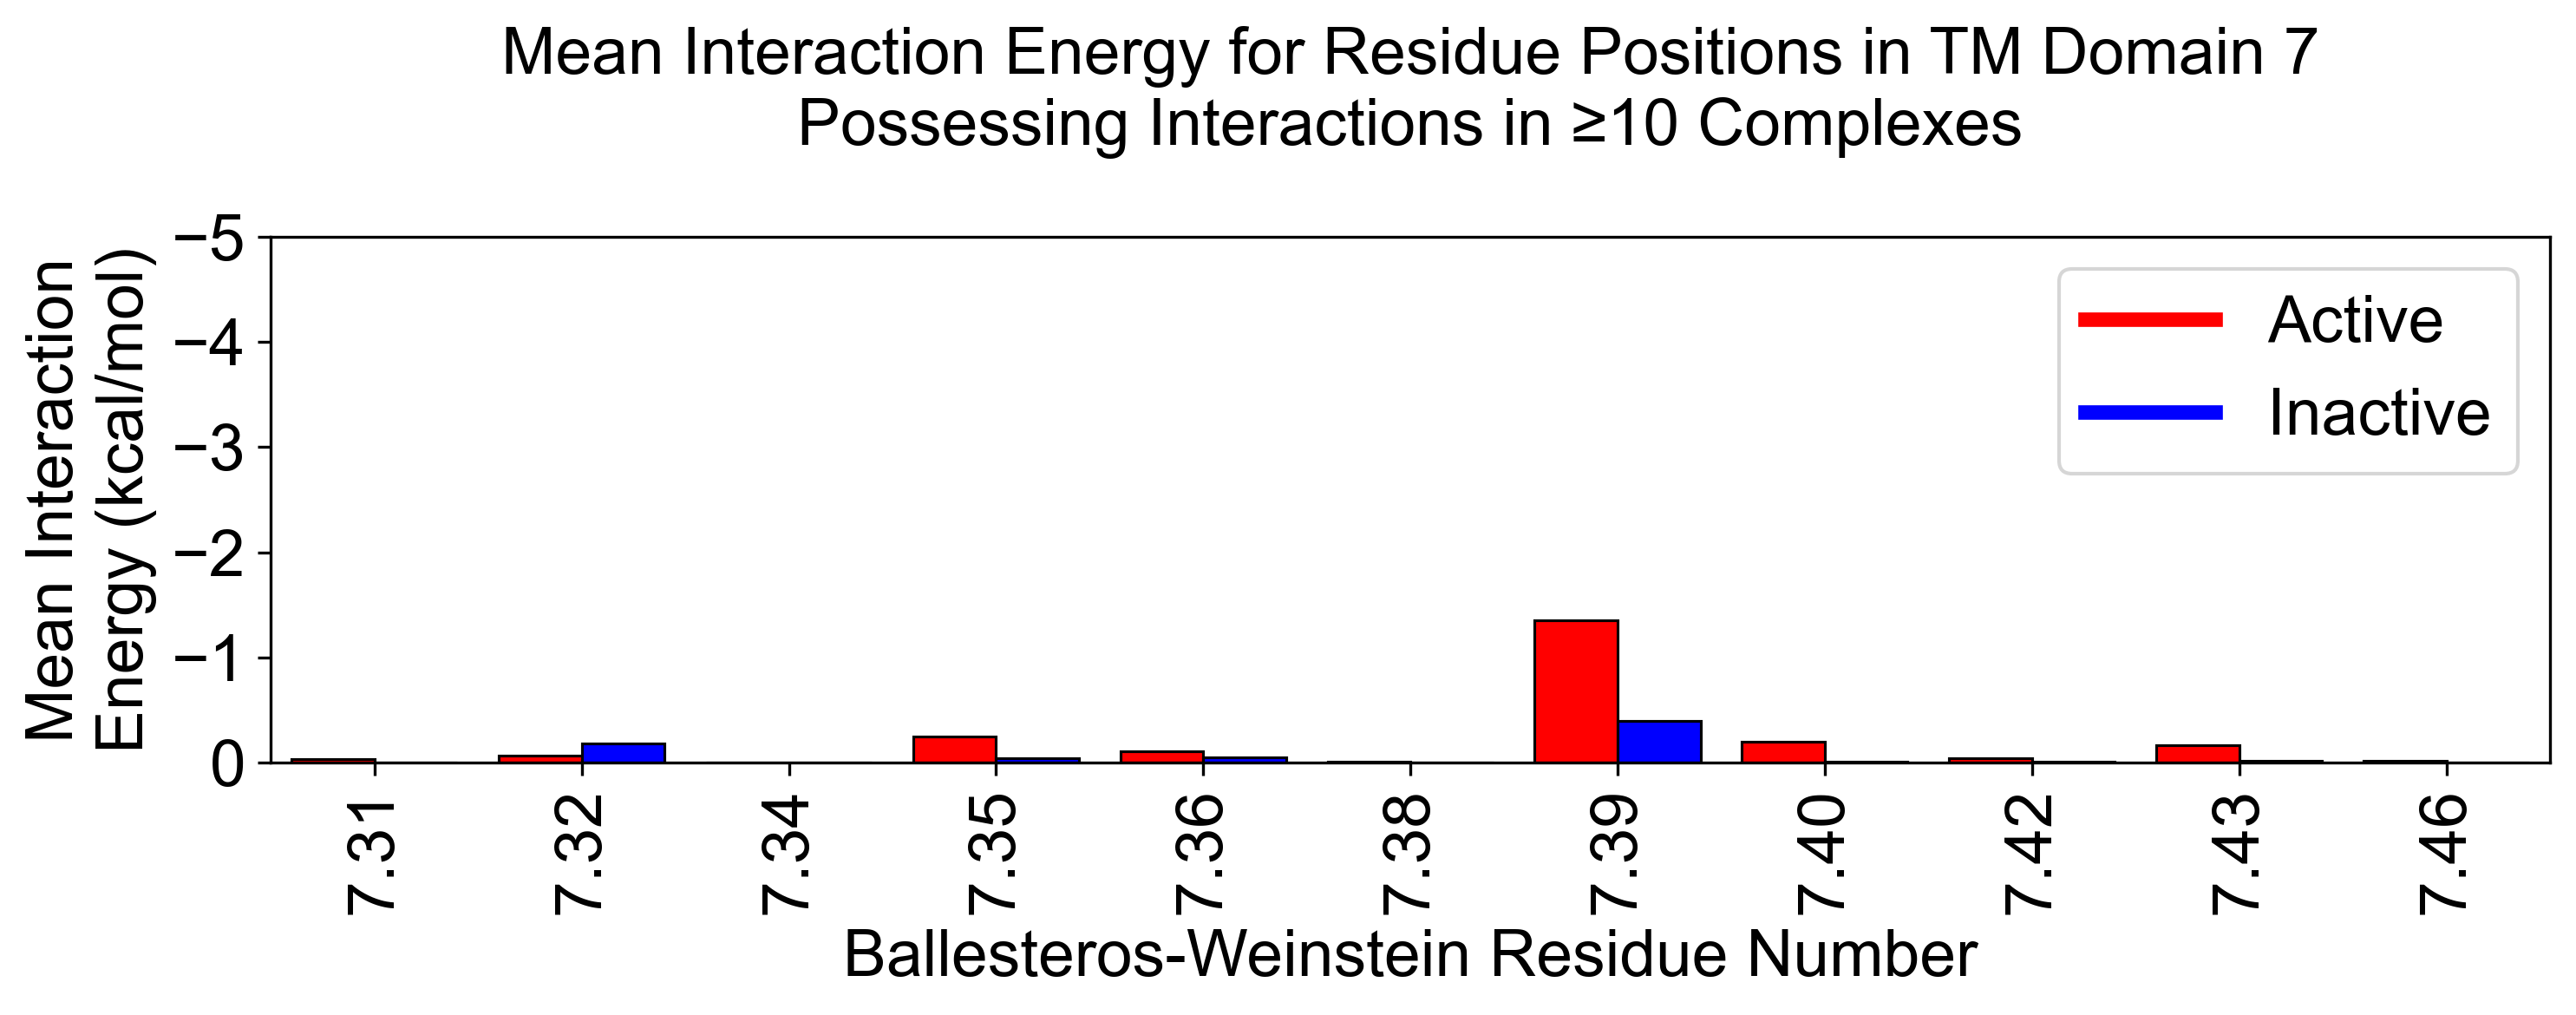

In [44]:
plot_cols = [TM1_energysum_cols, TM2_energysum_cols, TM3_energysum_cols, TM4_energysum_cols, TM5_energysum_cols, TM6_energysum_cols, TM7_energysum_cols]

gen_intenergy_plots_perTM_classbased(plot_cols)

In [49]:
len([item for sublist in plot_cols for item in sublist])

63

In [44]:
structure_df['7.45_intenergysum'].mean()

-0.004285714285714286

## Interaction Count Plot

In [64]:
len(structure_df)

1820

In [89]:
def gen_intcount_plots_perTM(cols_list):
    i = 0
    for cols in cols_list:
        i += 1
        
        # get residue position numbers
        resnums = []
        int_counts = []
        for col in cols:
            resnums.append(col[:4])
            count = len(structure_df.loc[(structure_df[col] != 0) & (structure_df[col].notnull())])
            int_counts.append(count)
            
        # calculate interaction counts as percentages
        int_counts_percs = []
        for x in int_counts:
            int_counts_percs.append((x/(len(structure_df)))*100)
        
        # plots
        matplotlib.rcParams['figure.figsize'] = [18, 3.5] #width, height (both in inches)
        matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()

        # create rectangles for bar plot
        rects = ax.bar(resnums, int_counts_percs, width, label=resnums, color = 'black', edgecolor = "black", linewidth = 0.75)

        # Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
        plt.title("Percentage of Structures Possessing Interactions at each Residue Position in TM" + str(i), fontsize = 24)
        ax.set_ylabel('Mean Interaction Energy\n(kcal/mol)', fontsize = 20)
        ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
        plt.xticks(rotation = 90, fontsize = 20)
        plt.yticks(fontsize = 20)
        ax.set_ylim([0, 100])
        fig.tight_layout()
        
        plt.xlim([-1,len(resnums)])
        plt.show()

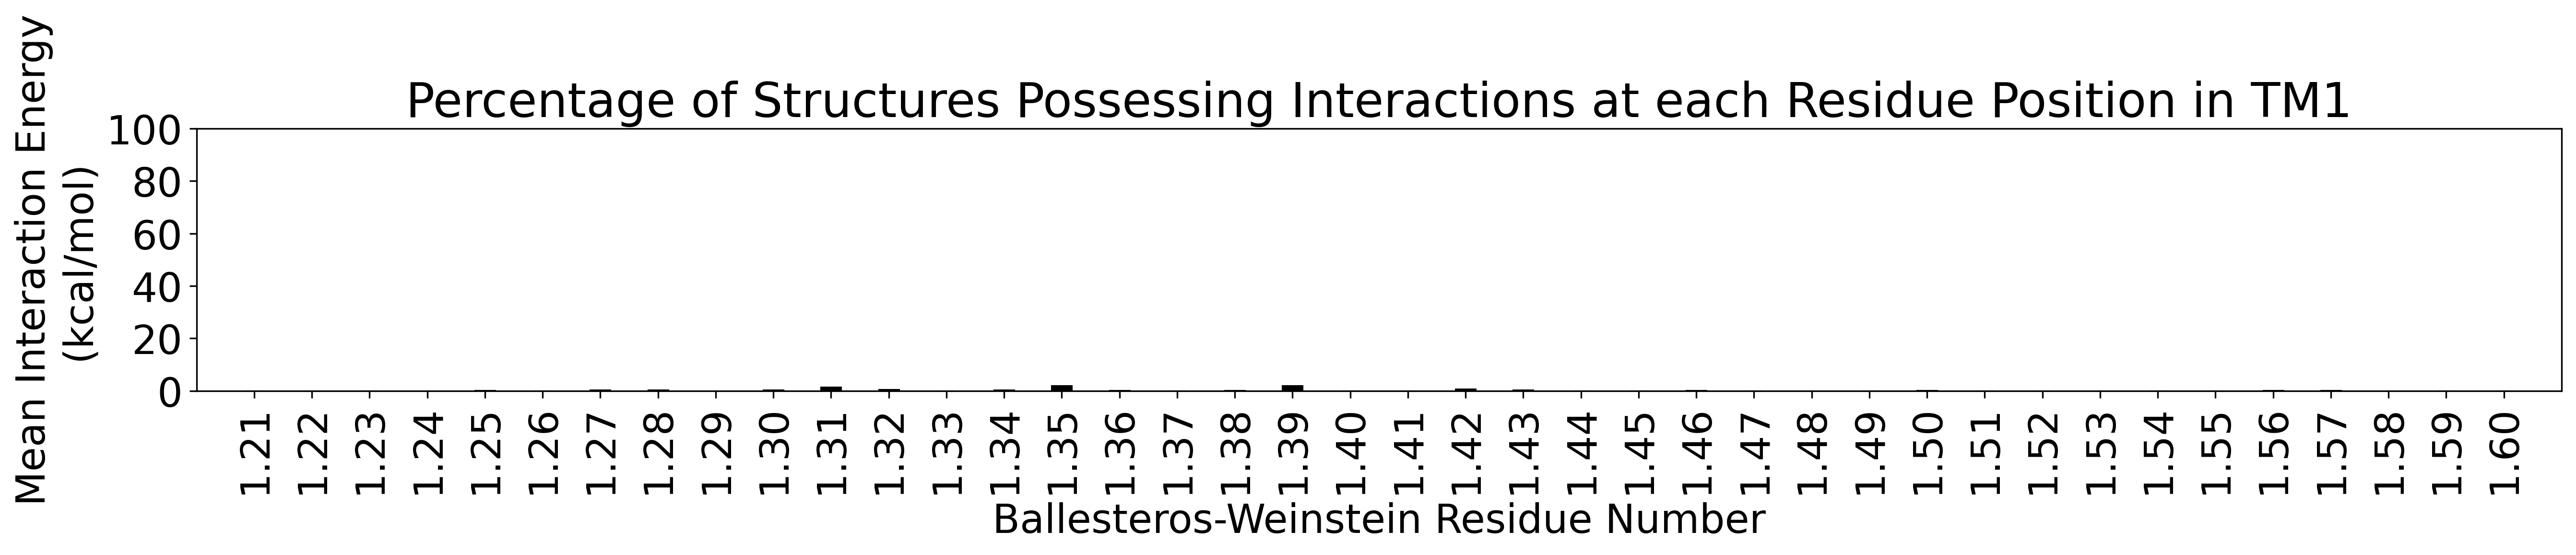

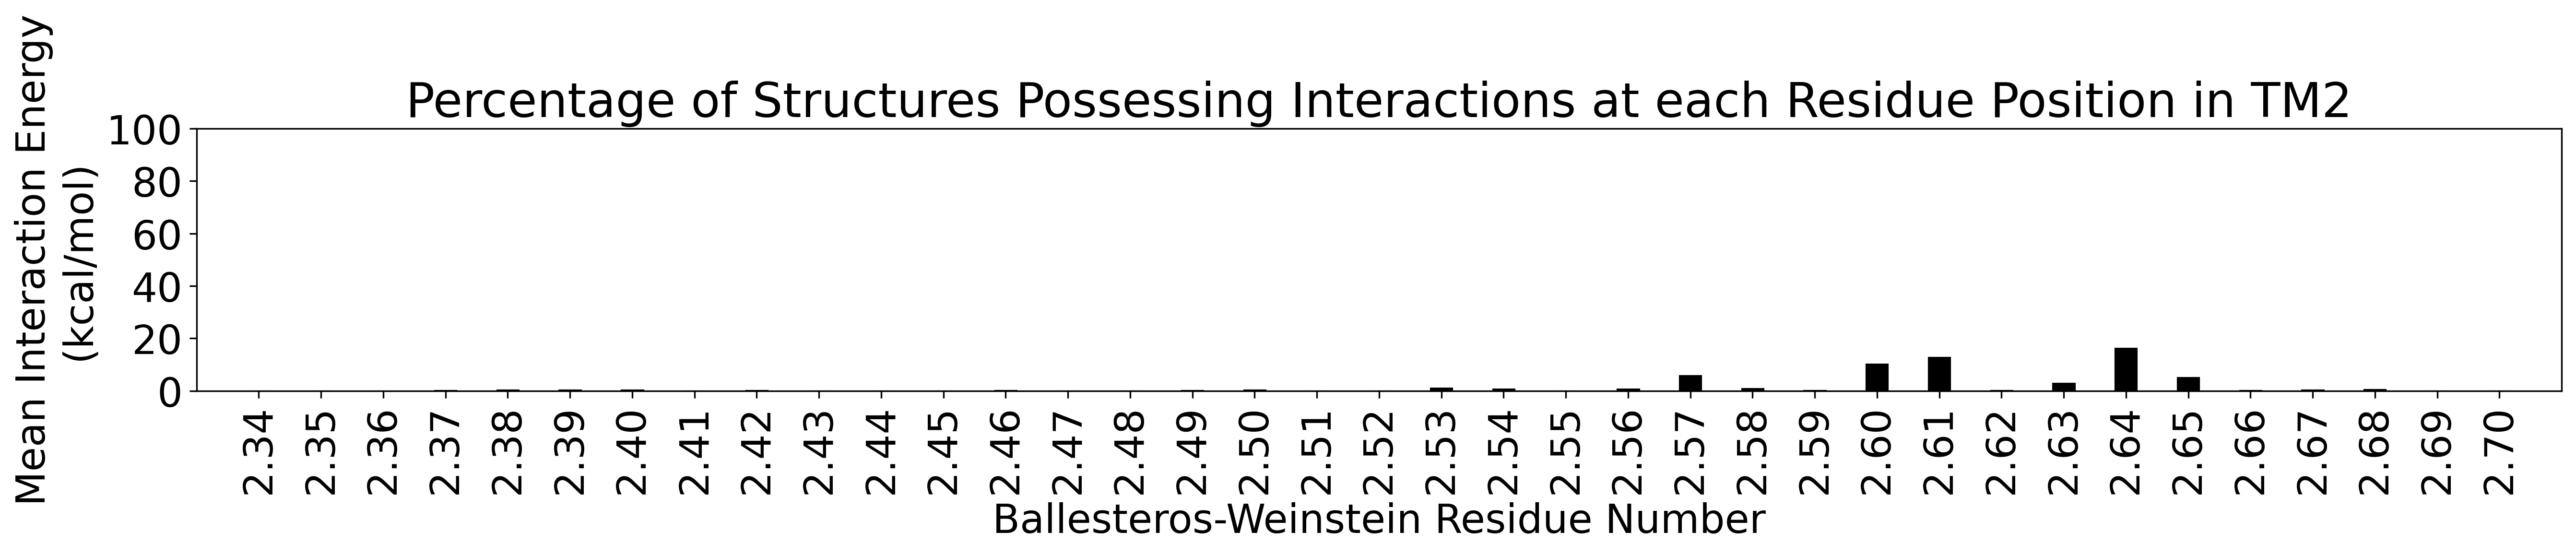

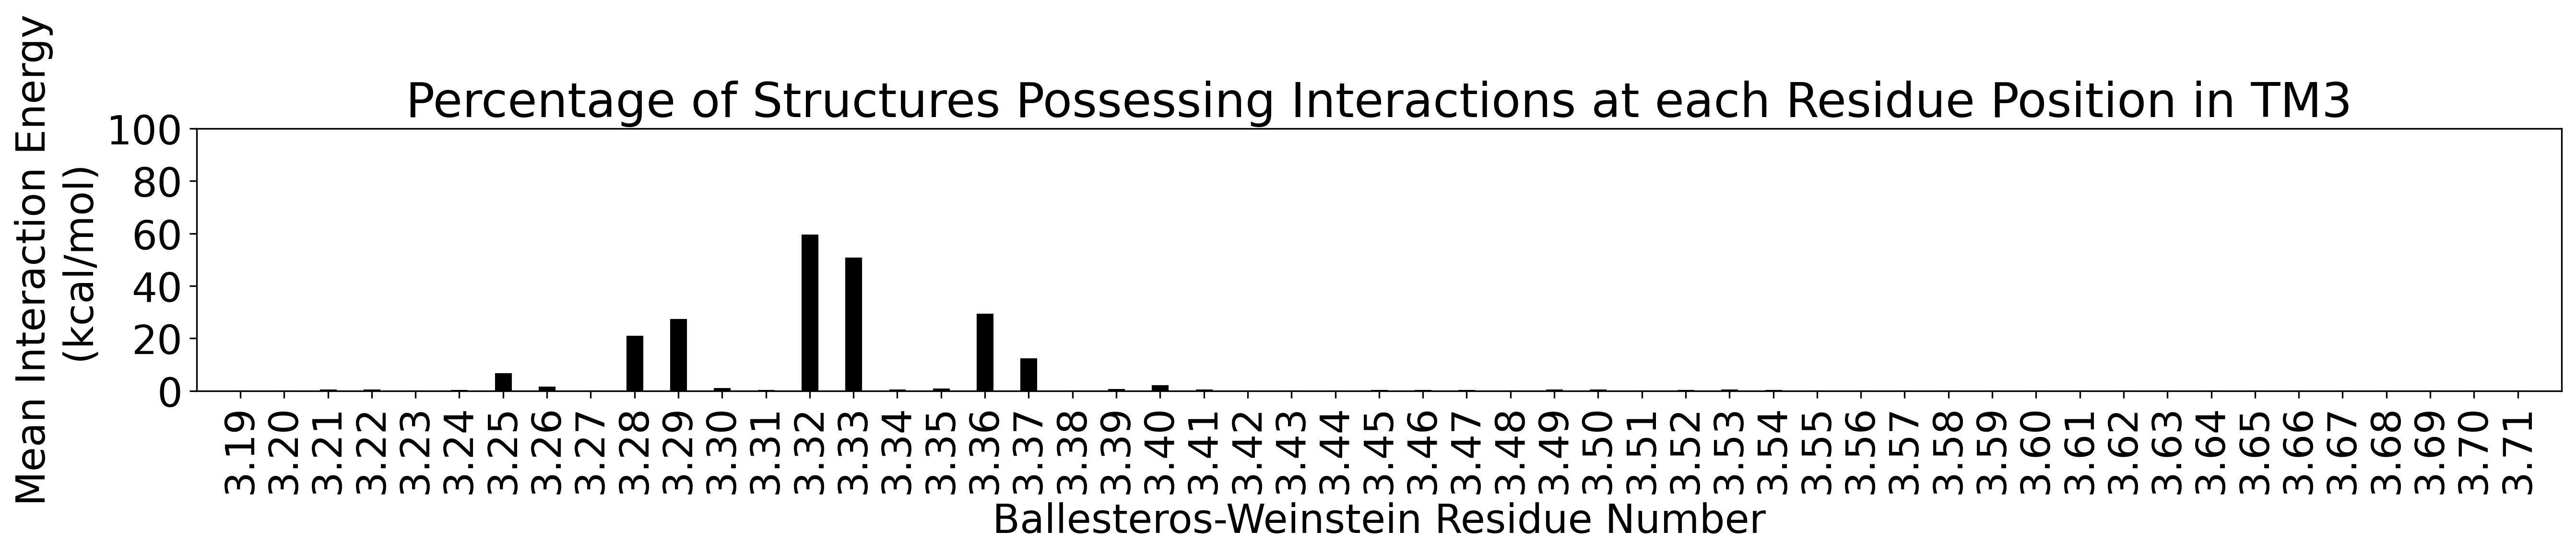

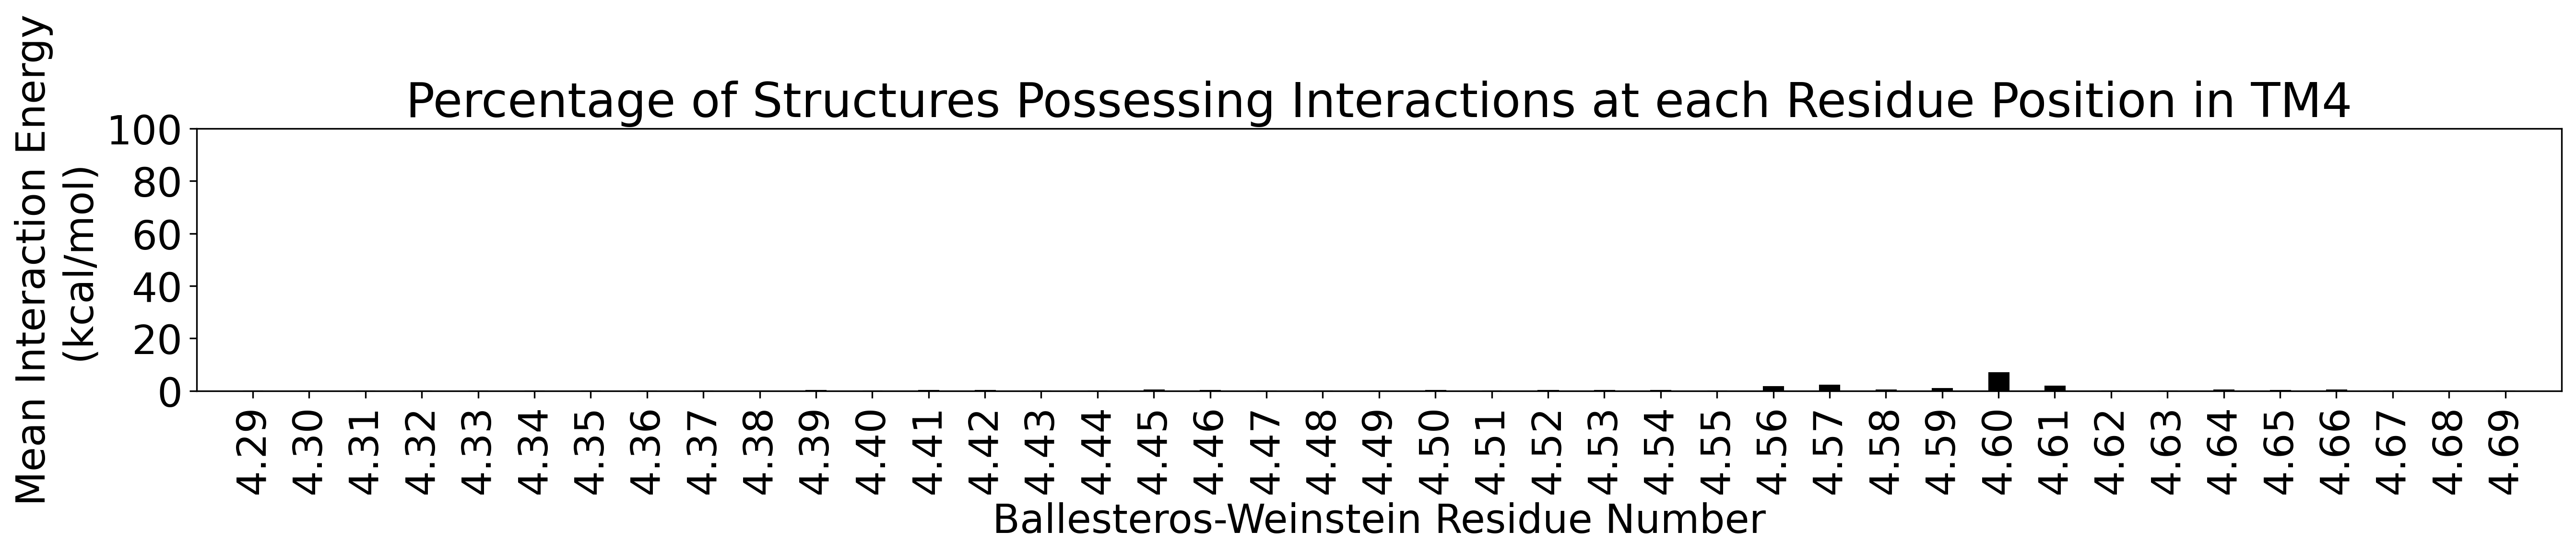

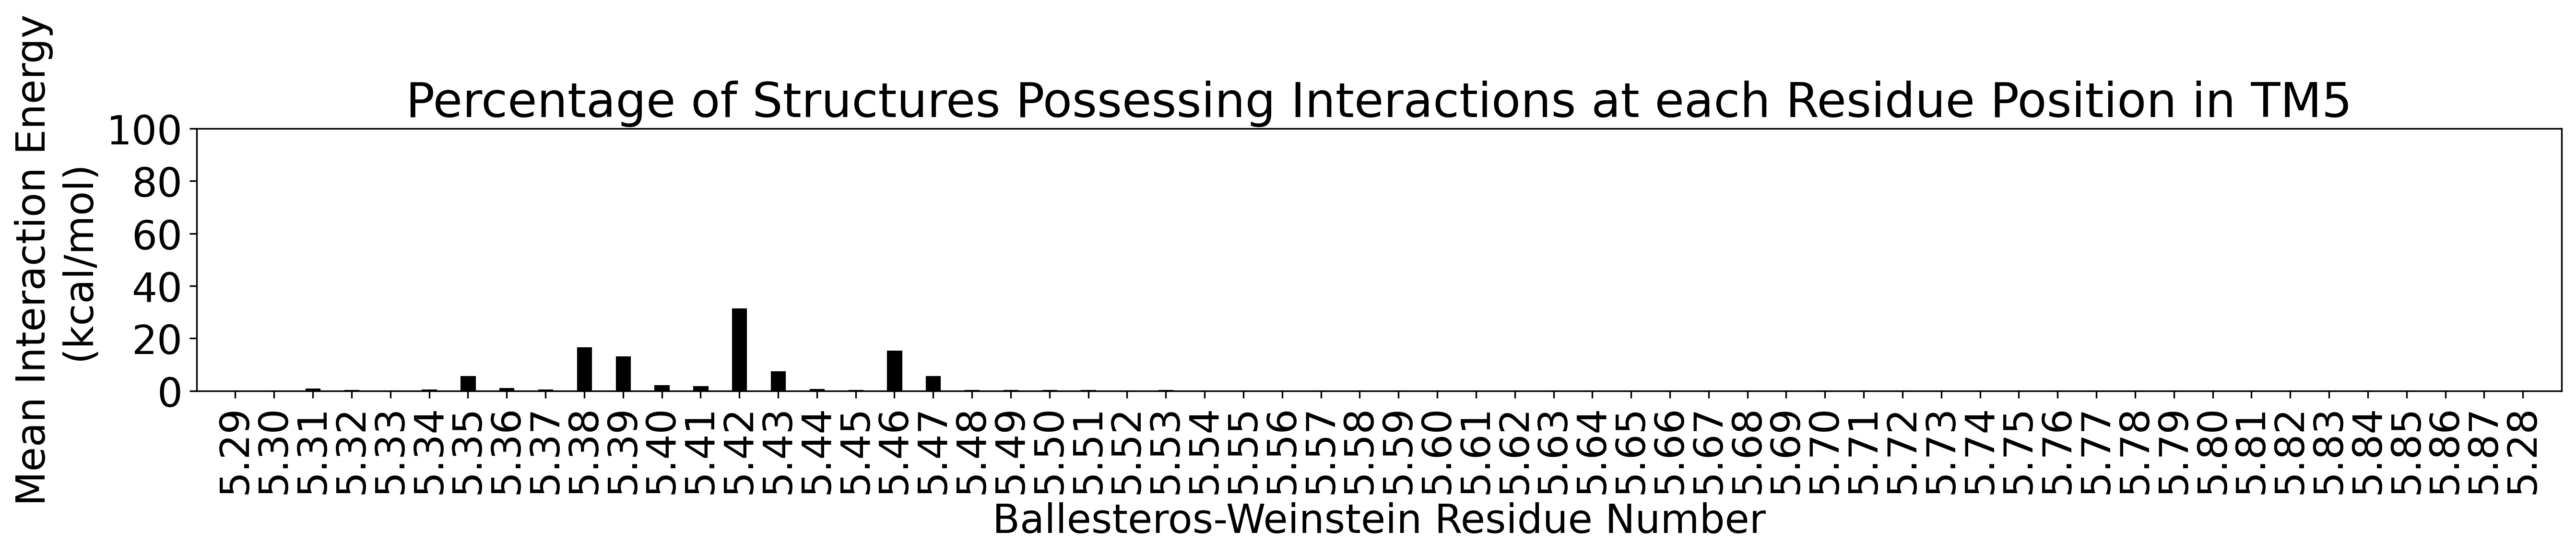

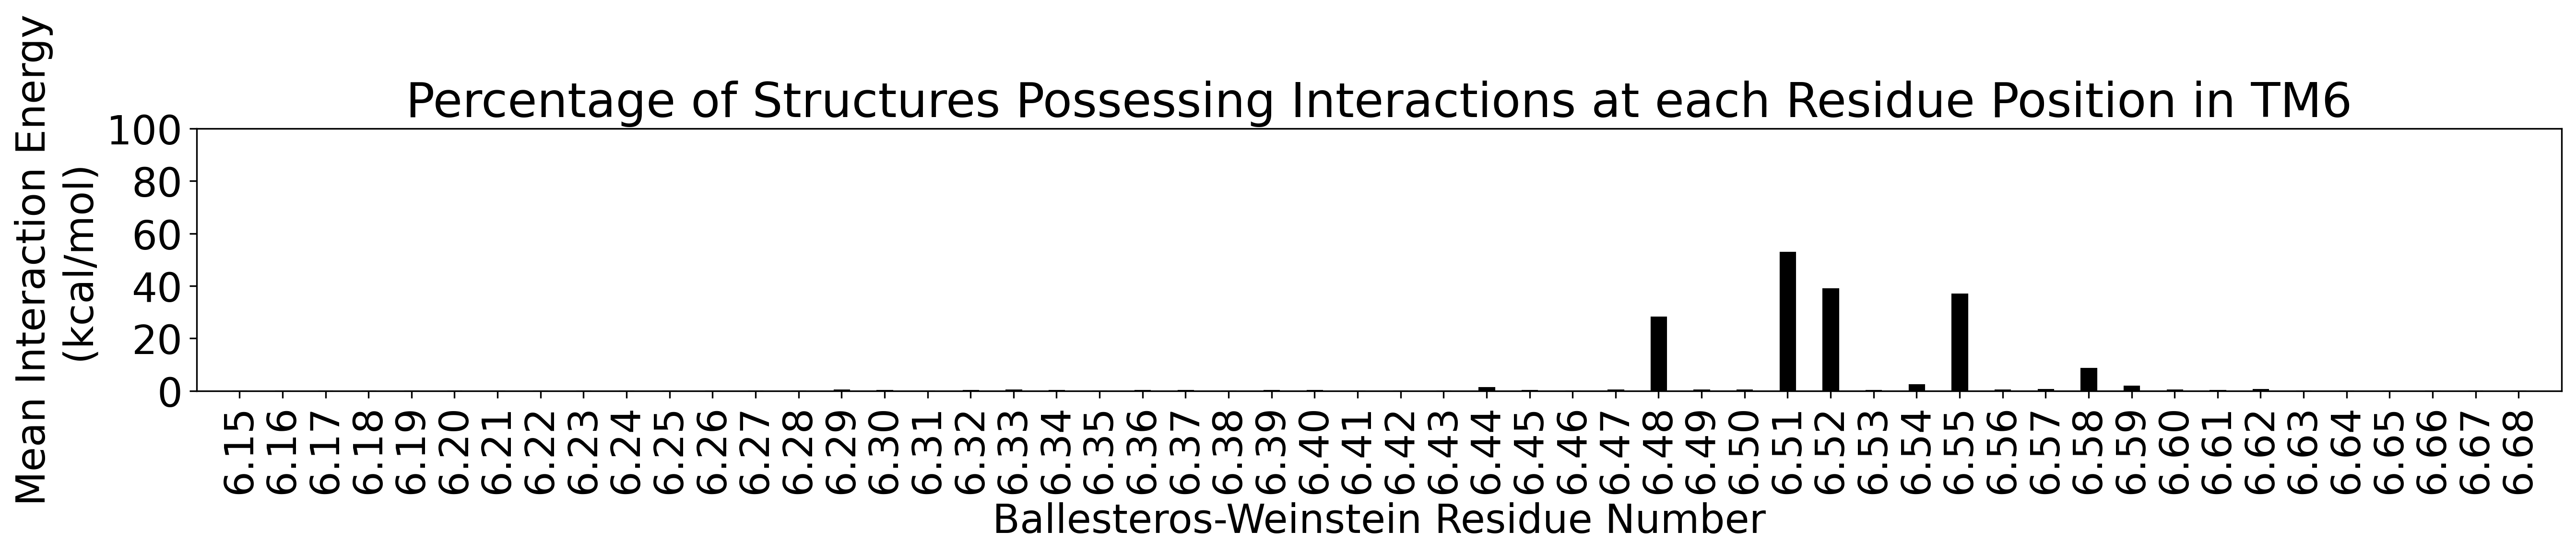

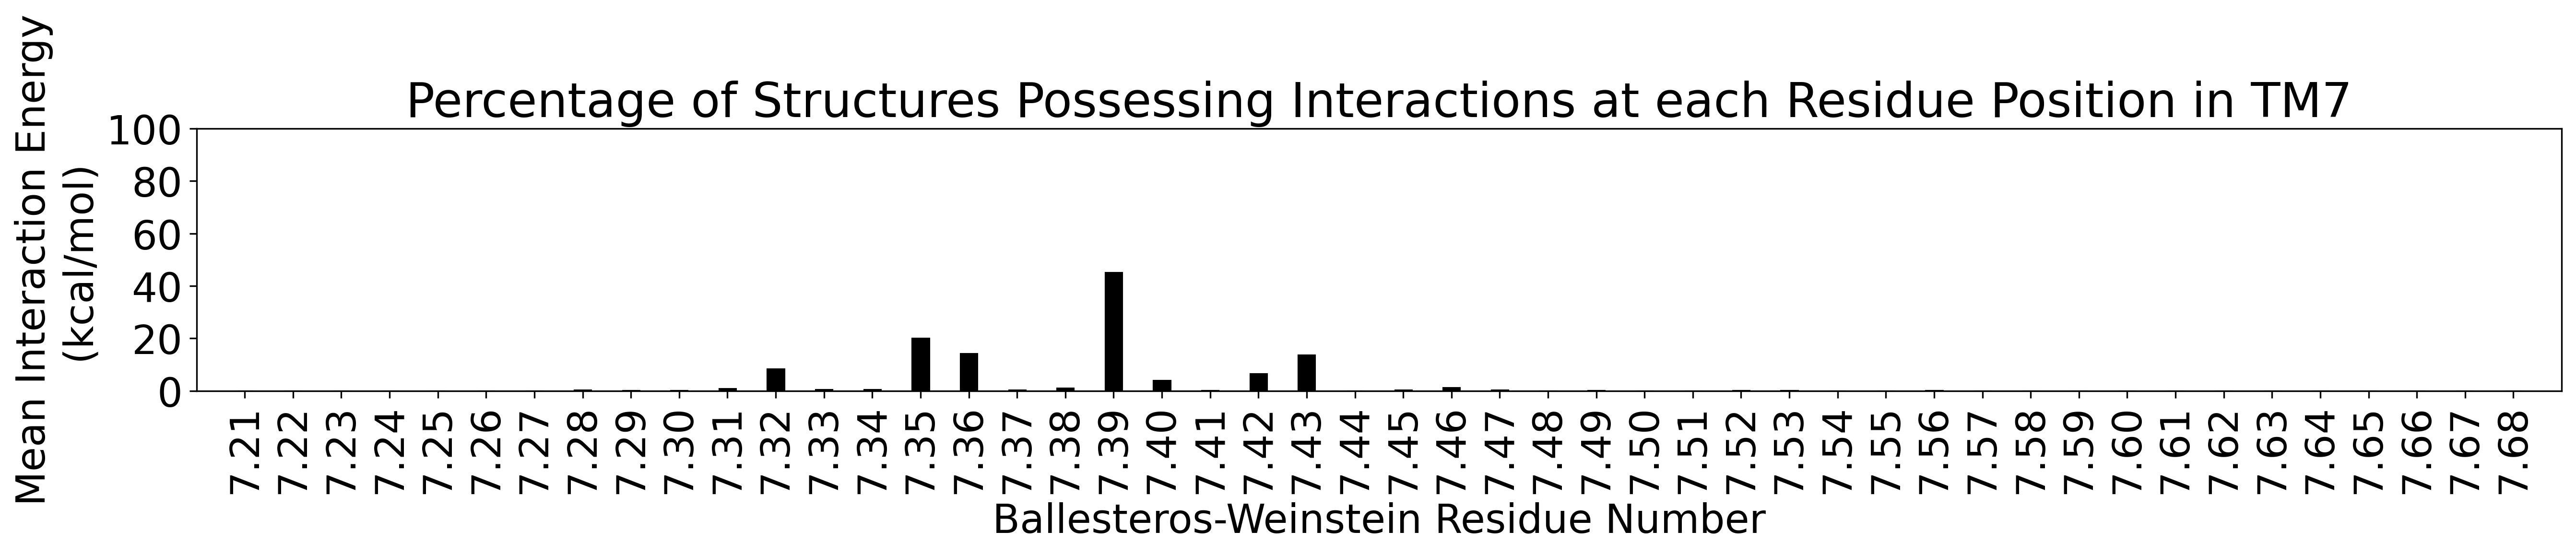

In [90]:
plot_cols = [TM1_energysum_cols, TM2_energysum_cols, TM3_energysum_cols, TM4_energysum_cols, TM5_energysum_cols, TM6_energysum_cols, TM7_energysum_cols]

gen_intcount_plots_perTM(plot_cols)

## Per TM Interaction Percentages (Binders vs. Non-Binders)

In [50]:
# energysum_cols = []

# TM1_energysum_cols = []
# TM2_energysum_cols = []
# TM3_energysum_cols = []
# TM4_energysum_cols = []
# TM5_energysum_cols = []
# TM6_energysum_cols = []
# TM7_energysum_cols = []

# for col in structure_df.columns.tolist():
#     if 'intenergysum' in col:
#         energysum_cols.append(col)
#         if '1.' in col:
#             TM1_energysum_cols.append(col)
#         if '2.' in col:
#             TM2_energysum_cols.append(col)
#         if '3.' in col:
#             TM3_energysum_cols.append(col)
#         if '4.' in col:
#             TM4_energysum_cols.append(col)
#         if '5.' in col:
#             TM5_energysum_cols.append(col)
#         if '6.' in col:
#             TM6_energysum_cols.append(col)
#         if '7.' in col:
#             TM7_energysum_cols.append(col)

energysum_cols = []

TM1_energysum_cols = []
TM2_energysum_cols = []
TM3_energysum_cols = []
TM4_energysum_cols = []
TM5_energysum_cols = []
TM6_energysum_cols = []
TM7_energysum_cols = []

for col in structure_df.columns.tolist():
    if 'intenergysum' in col:
        energysum_cols.append(col)
        if '1.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM1_energysum_cols.append(col)
        if '2.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM2_energysum_cols.append(col)
        if '3.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM3_energysum_cols.append(col)
        if '4.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM4_energysum_cols.append(col)
        if '5.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM5_energysum_cols.append(col)
        if '6.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM6_energysum_cols.append(col)
        if '7.' in col:
            if structure_df[col][structure_df[col] != 0].value_counts().sum() >= 10:
                TM7_energysum_cols.append(col)

In [51]:
structure_df['Function'].value_counts()

Antagonist           664
Agonist              480
Inactive             285
Inverse agonist       73
Agonist (partial)     33
Name: Function, dtype: int64

In [52]:
structure_df_binders = structure_df.loc[(structure_df['Function'] == 'Agonist') | (structure_df['Function'] == 'Antagonist') | (structure_df['Function'] == 'Inverse agonist') | (structure_df['Function'] == 'Agonist (partial)')]
structure_df_nonbinders = structure_df.loc[(structure_df['Function'] == 'Inactive')]

In [55]:
def gen_intcount_plots_classbased(cols_list):
    i = 0
    for cols in cols_list:
        i += 1
        
        # get residue position numbers
        resnums = []
        binder_int_counts = []
        nonbinder_int_counts = []
        for col in cols:
            resnums.append(col[:4])
            b_count = len(structure_df_binders.loc[(structure_df_binders[col] != 0) & (structure_df_binders[col].notnull())])
            binder_int_counts.append(b_count)
            nb_count = len(structure_df_nonbinders.loc[(structure_df_nonbinders[col] != 0) & (structure_df_nonbinders[col].notnull())])
            nonbinder_int_counts.append(nb_count)
            
        # calculate interaction counts as percentages
        b_int_counts_percs = []
        nb_int_counts_percs = []
        for y in binder_int_counts:
            b_int_counts_percs.append((y/(len(structure_df_binders)))*100)
            
        for y in nonbinder_int_counts:
            nb_int_counts_percs.append((y/(len(structure_df_nonbinders)))*100)
        
        # plots
        matplotlib.rcParams['figure.figsize'] = [10, 4] #width, height (both in inches)
        matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
        matplotlib.rcParams["font.family"] = "arial"
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()
        
        x = np.arange(len(resnums))

        # create rectangles for bar plot
        rects1 = ax.bar(x - (width/4), b_int_counts_percs, width/2, label=resnums, color = 'red', edgecolor = "black", linewidth = 0.75)
        rects2 = ax.bar(x + (width/4), nb_int_counts_percs, width/2, label=resnums, color = 'blue', edgecolor = "black", linewidth = 0.75)

#         rects1 = ax.bar(x + (width/2), b_int_counts_percs, width, label=resnums, color = 'red', edgecolor = "black", linewidth = 0.75)
#         rects2 = ax.bar(x - (width/2), nb_int_counts_percs, width, label=resnums, color = 'blue', edgecolor = "black", linewidth = 0.75)

        # Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
        plt.title("Interaction Percentages for Residue Positions in TM Domain " + str(i) + '\nPossessing Interactions in ≥10 Complexes\n', fontsize = 18)
        ax.set_ylabel('% of Complexes', fontsize = 18)
        ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 18)
        plt.xticks(rotation = 90, fontsize = 18)
        ax.set_xticks(x)
        ax.set_xticklabels(resnums, rotation = 90, fontsize = 18)
        plt.yticks(fontsize = 18)
        ax.set_ylim([0, 80])
        
        # Add Legend
        custom_lines = [Line2D([0], [0], color='red', lw=4),
                        Line2D([0], [0], color='blue', lw=4)]

        ax.legend(custom_lines, ['Active', 'Inactive'], fontsize = 18, loc = 'upper right')
        
        fig.tight_layout()
        
        plt.xlim([-0.5,len(resnums)-0.5])
        plt.savefig('plots/manuscript_plots/TM' + str(i) + '_intpercplot.png')
        plt.show()

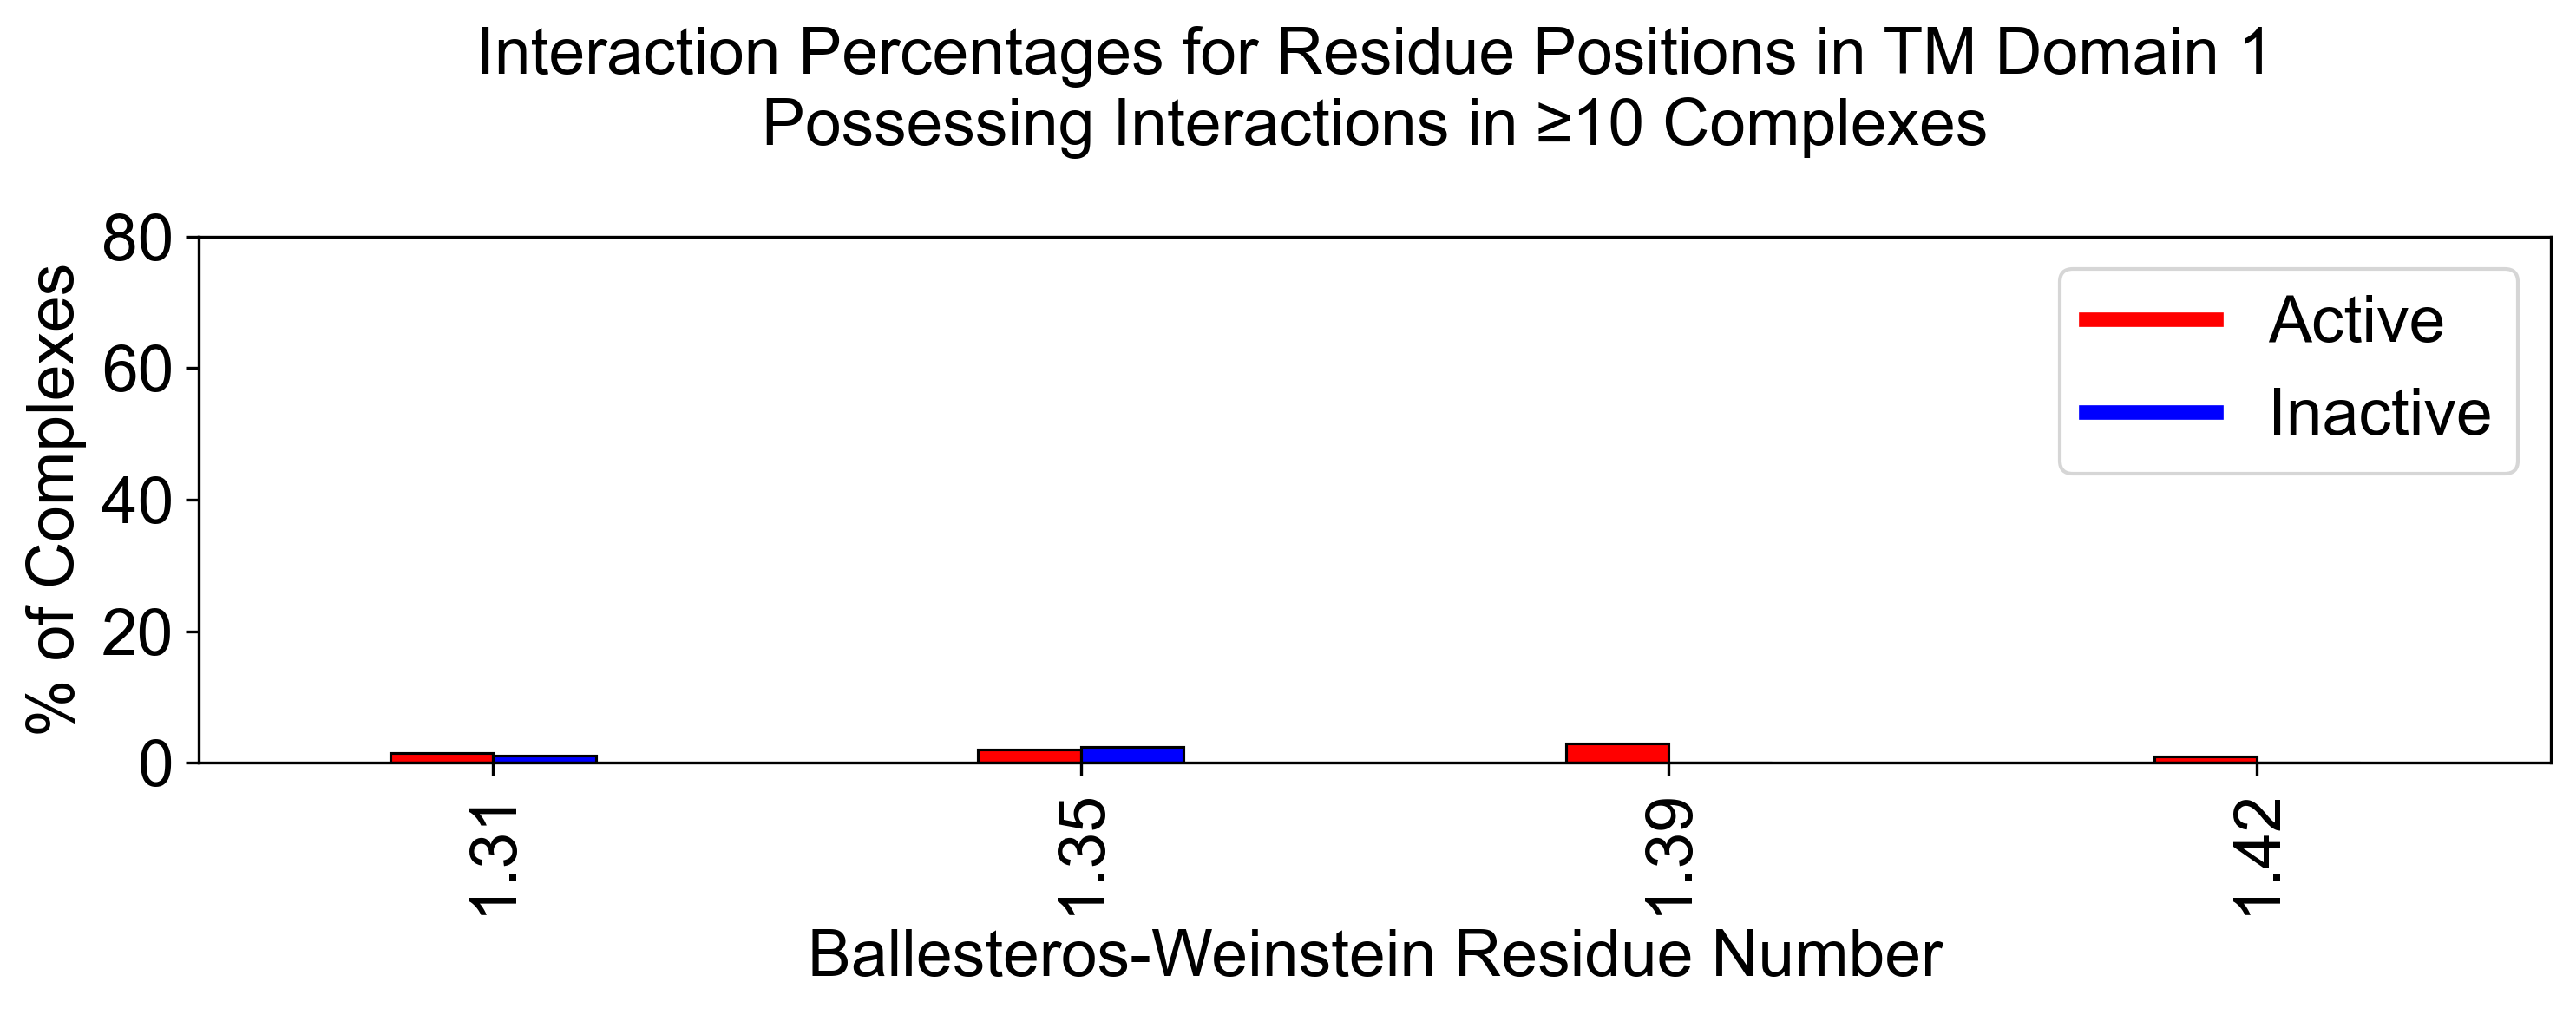

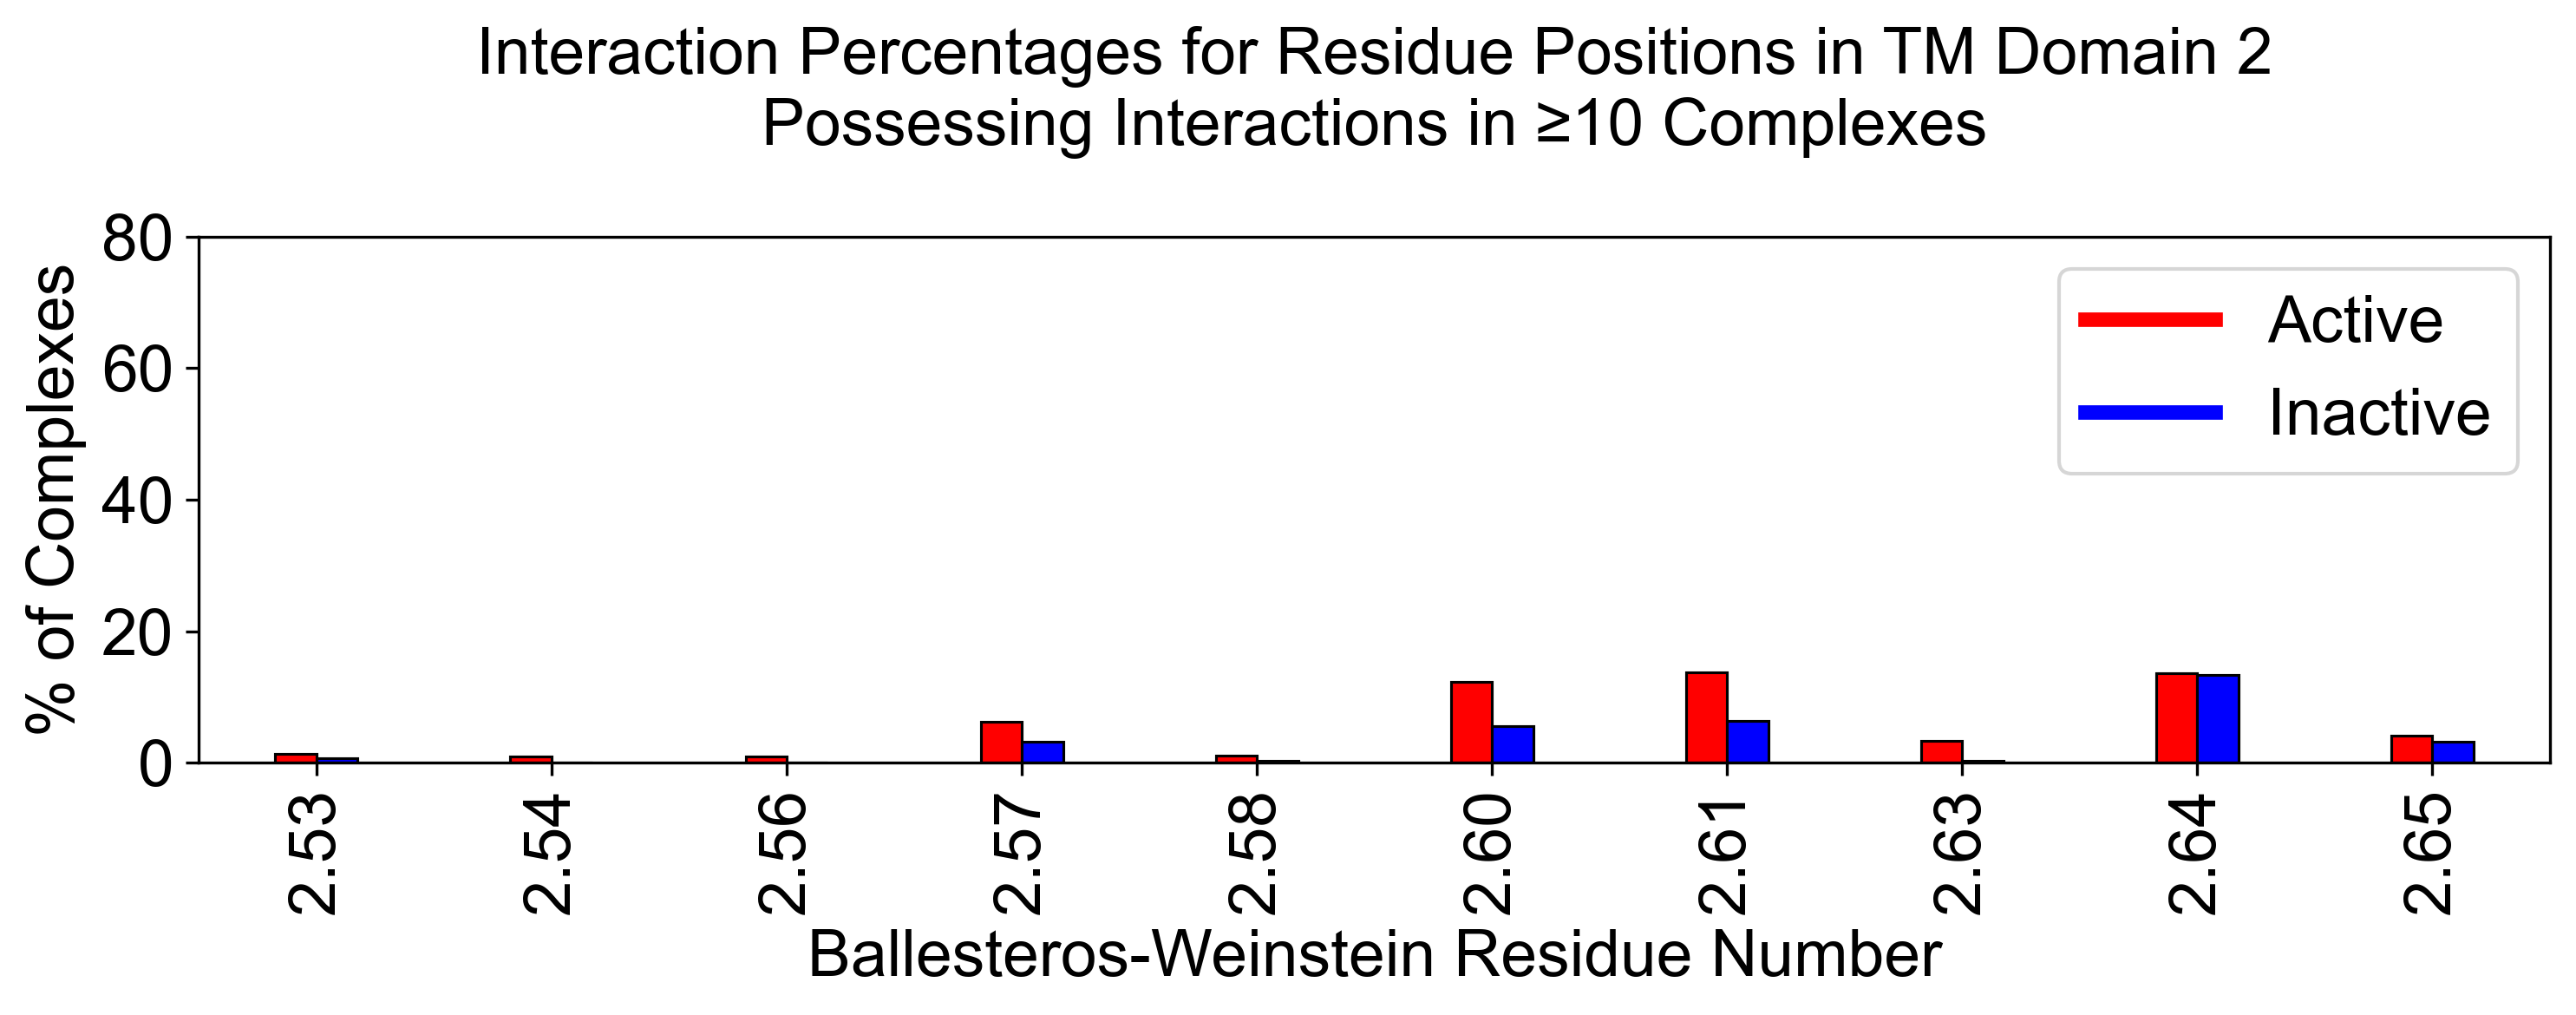

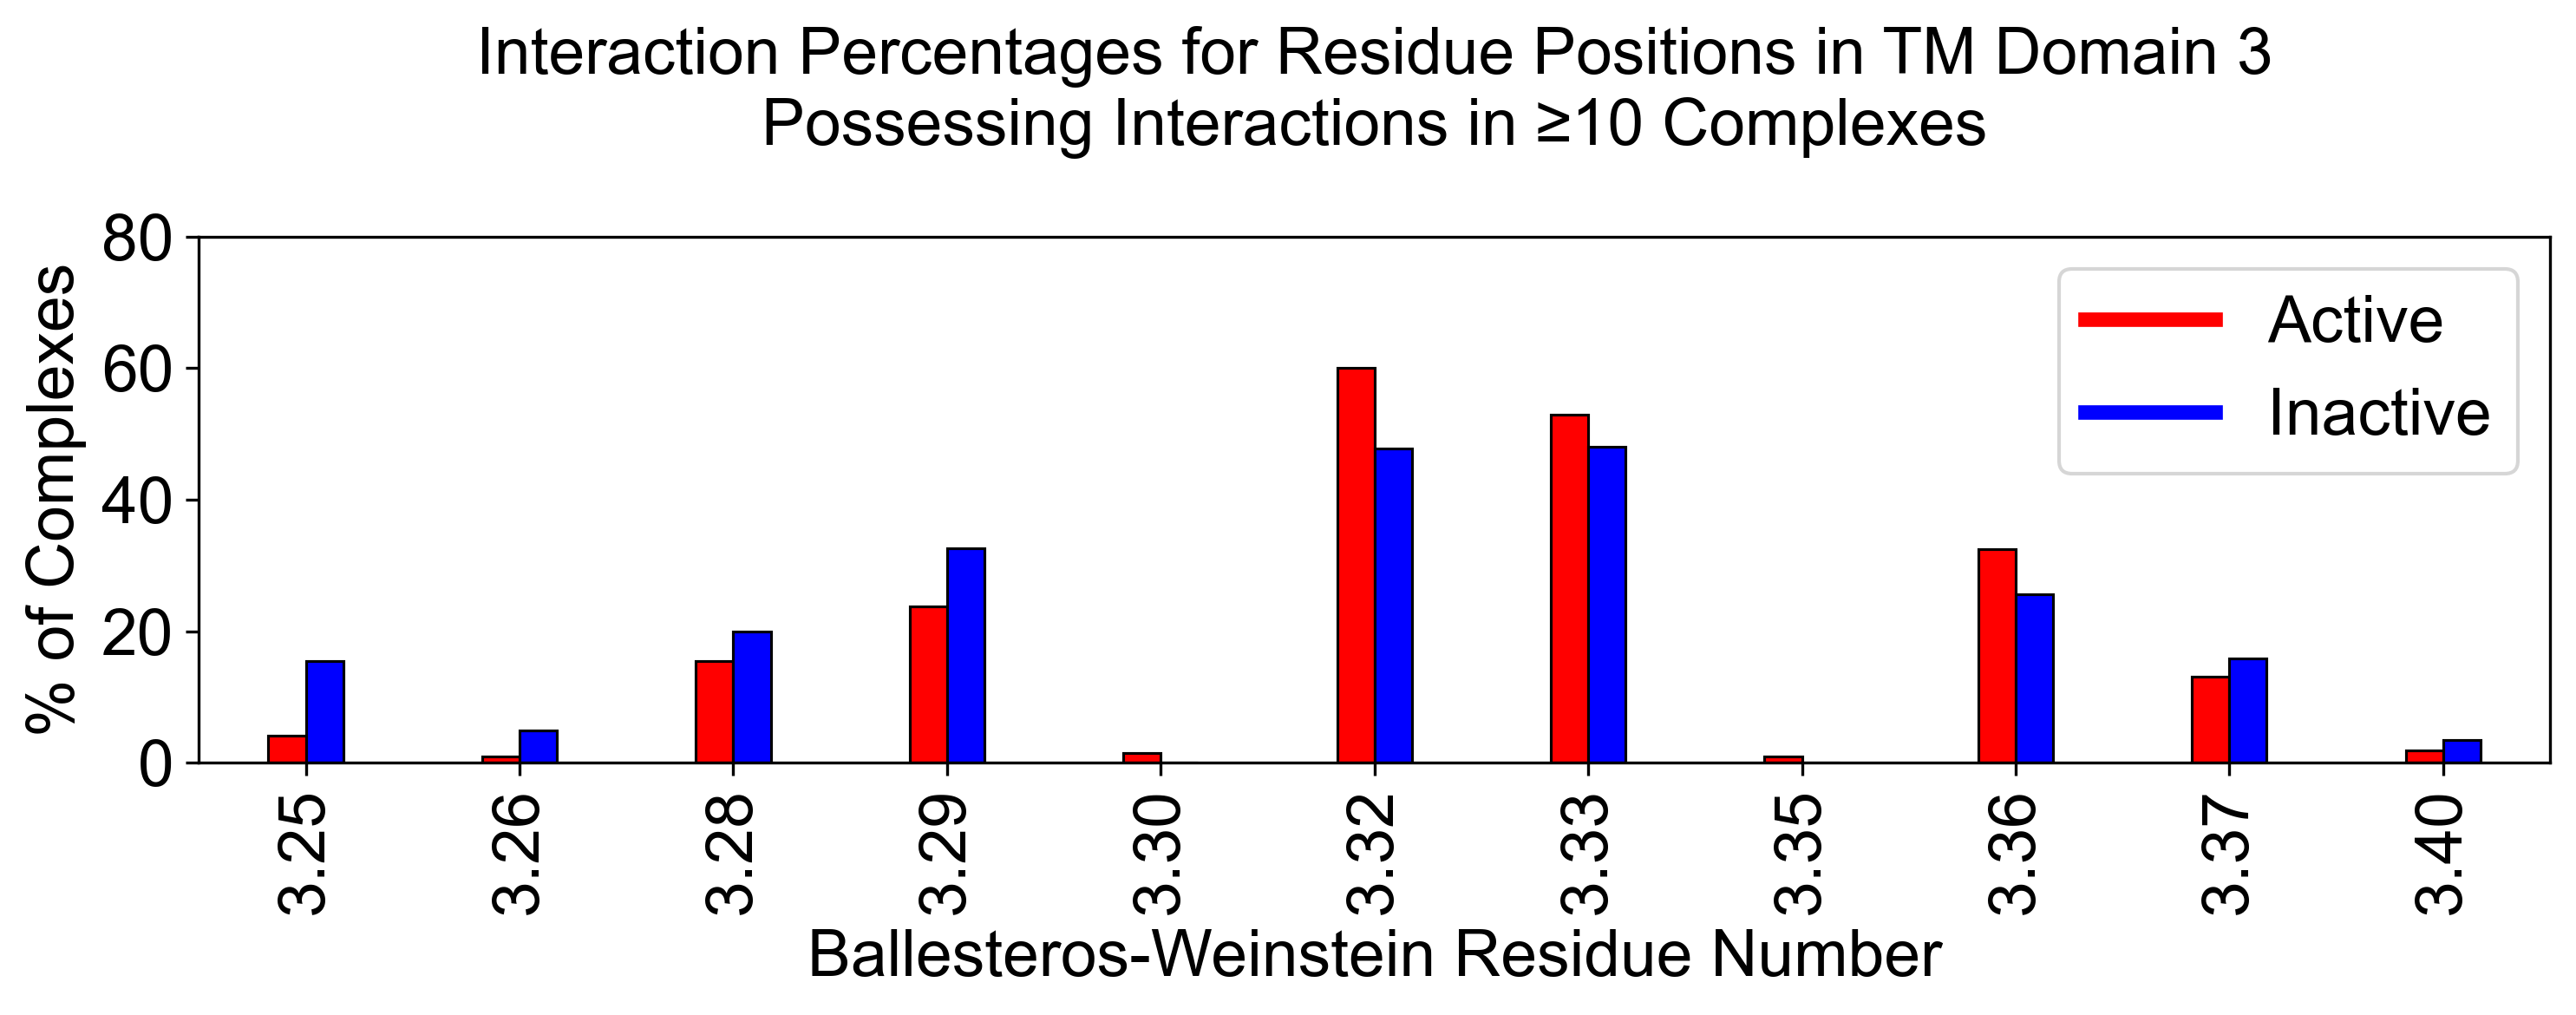

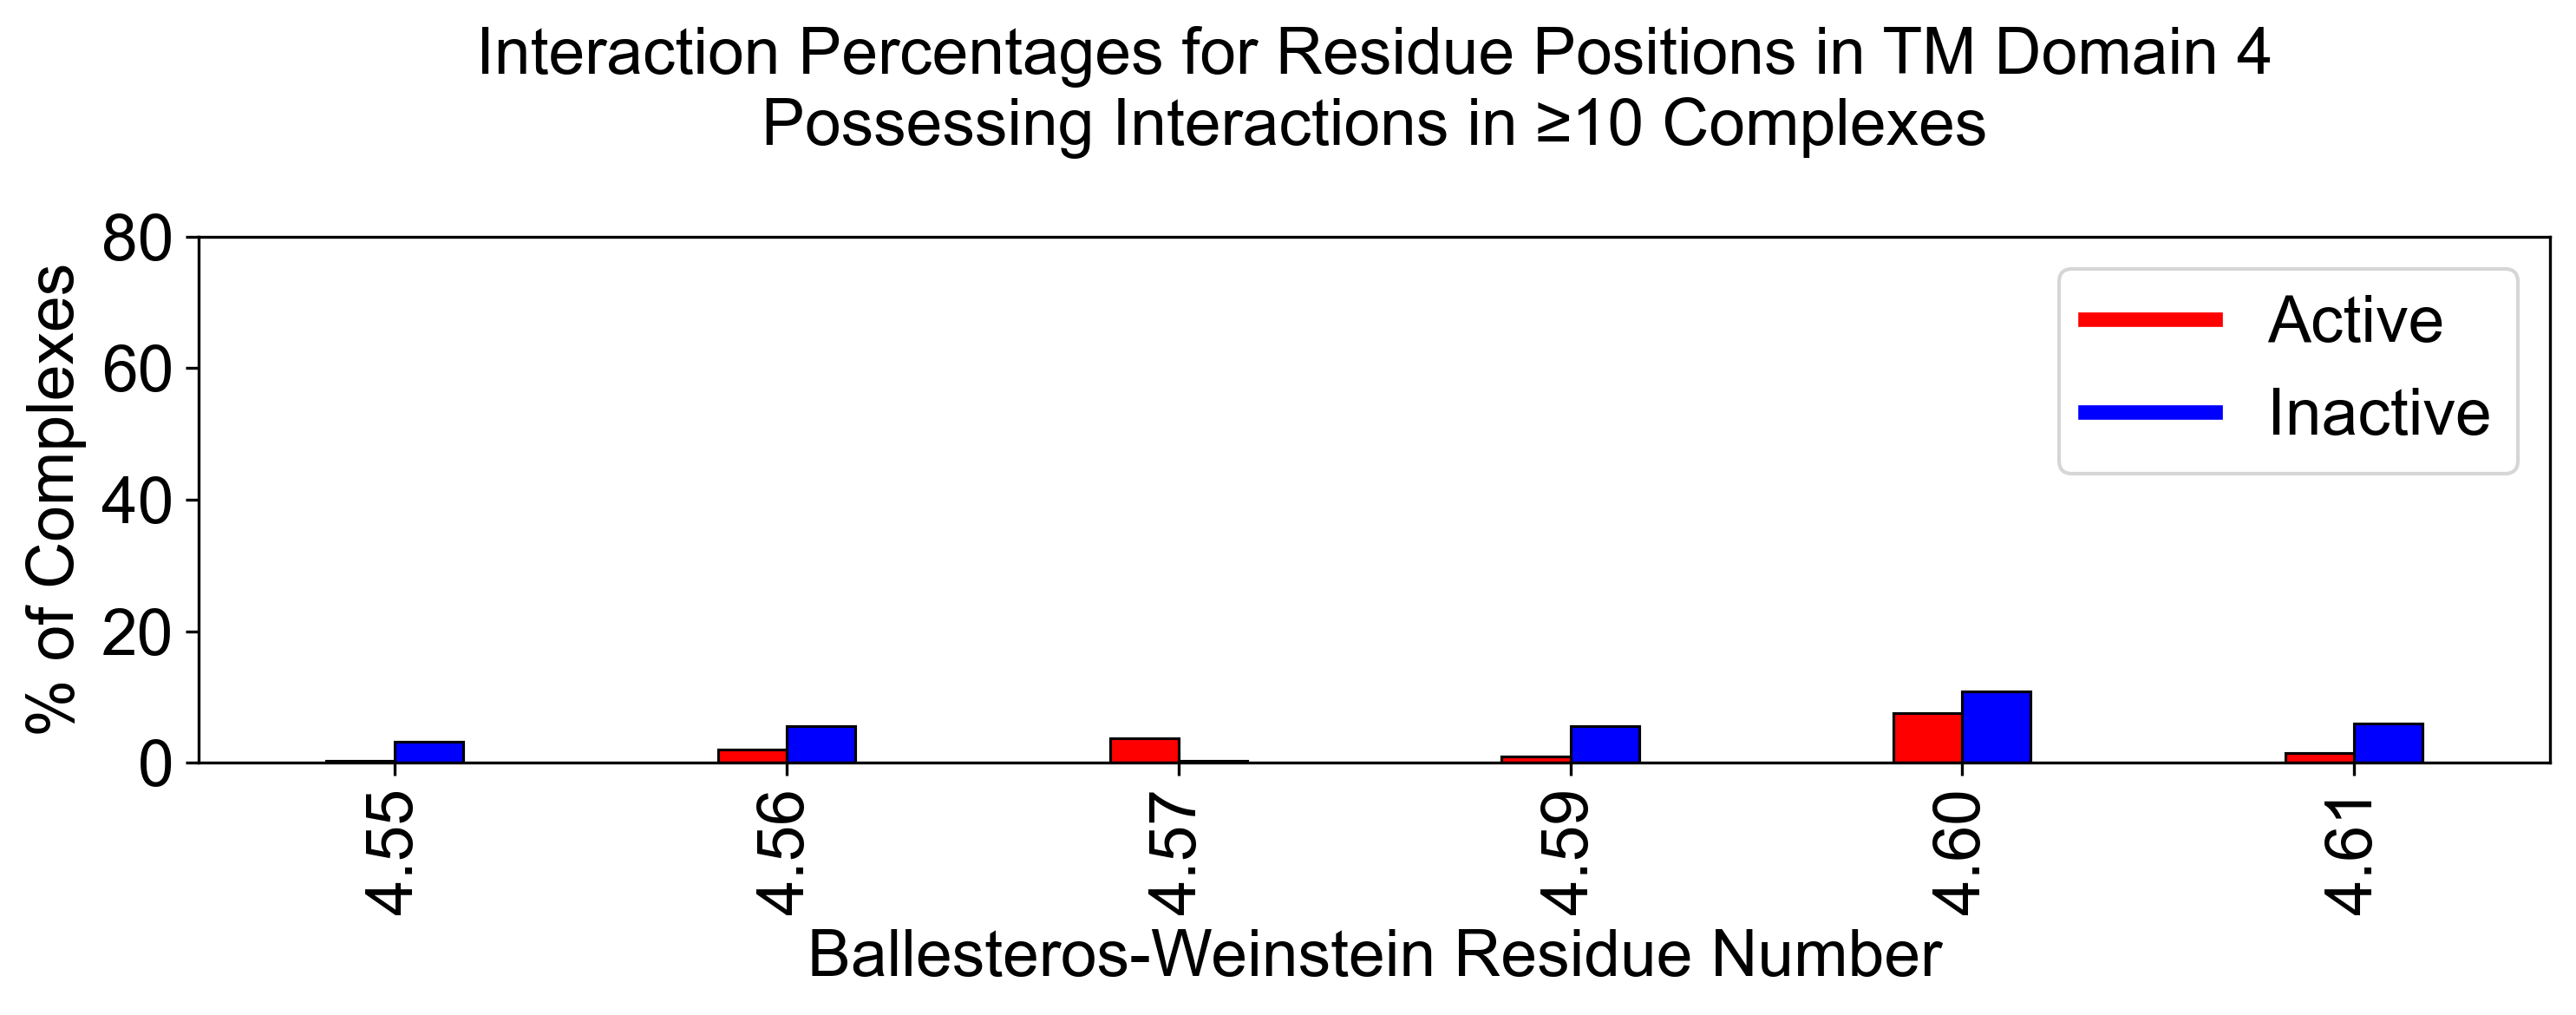

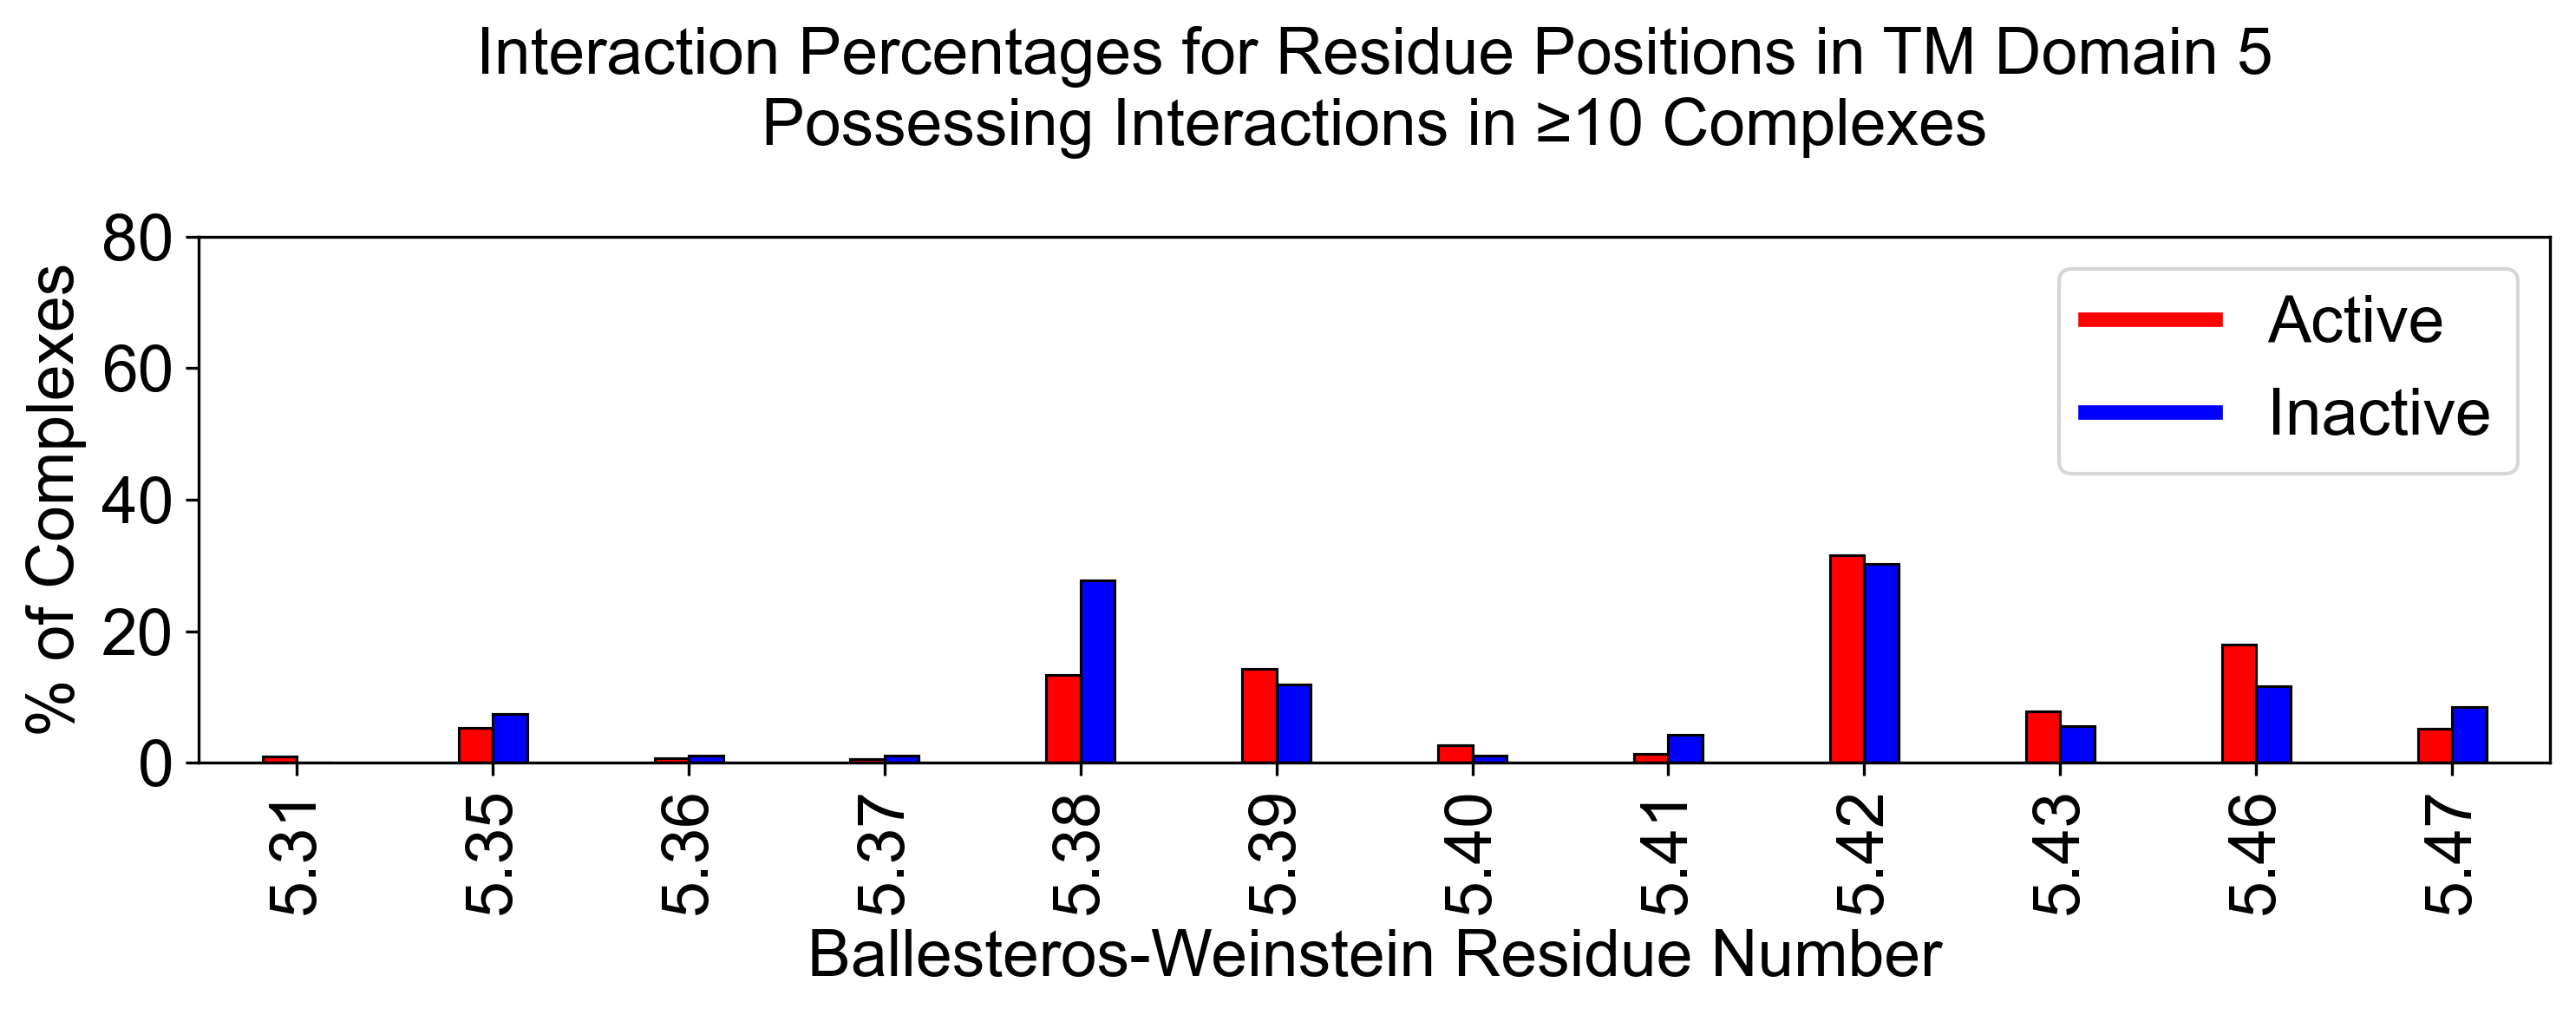

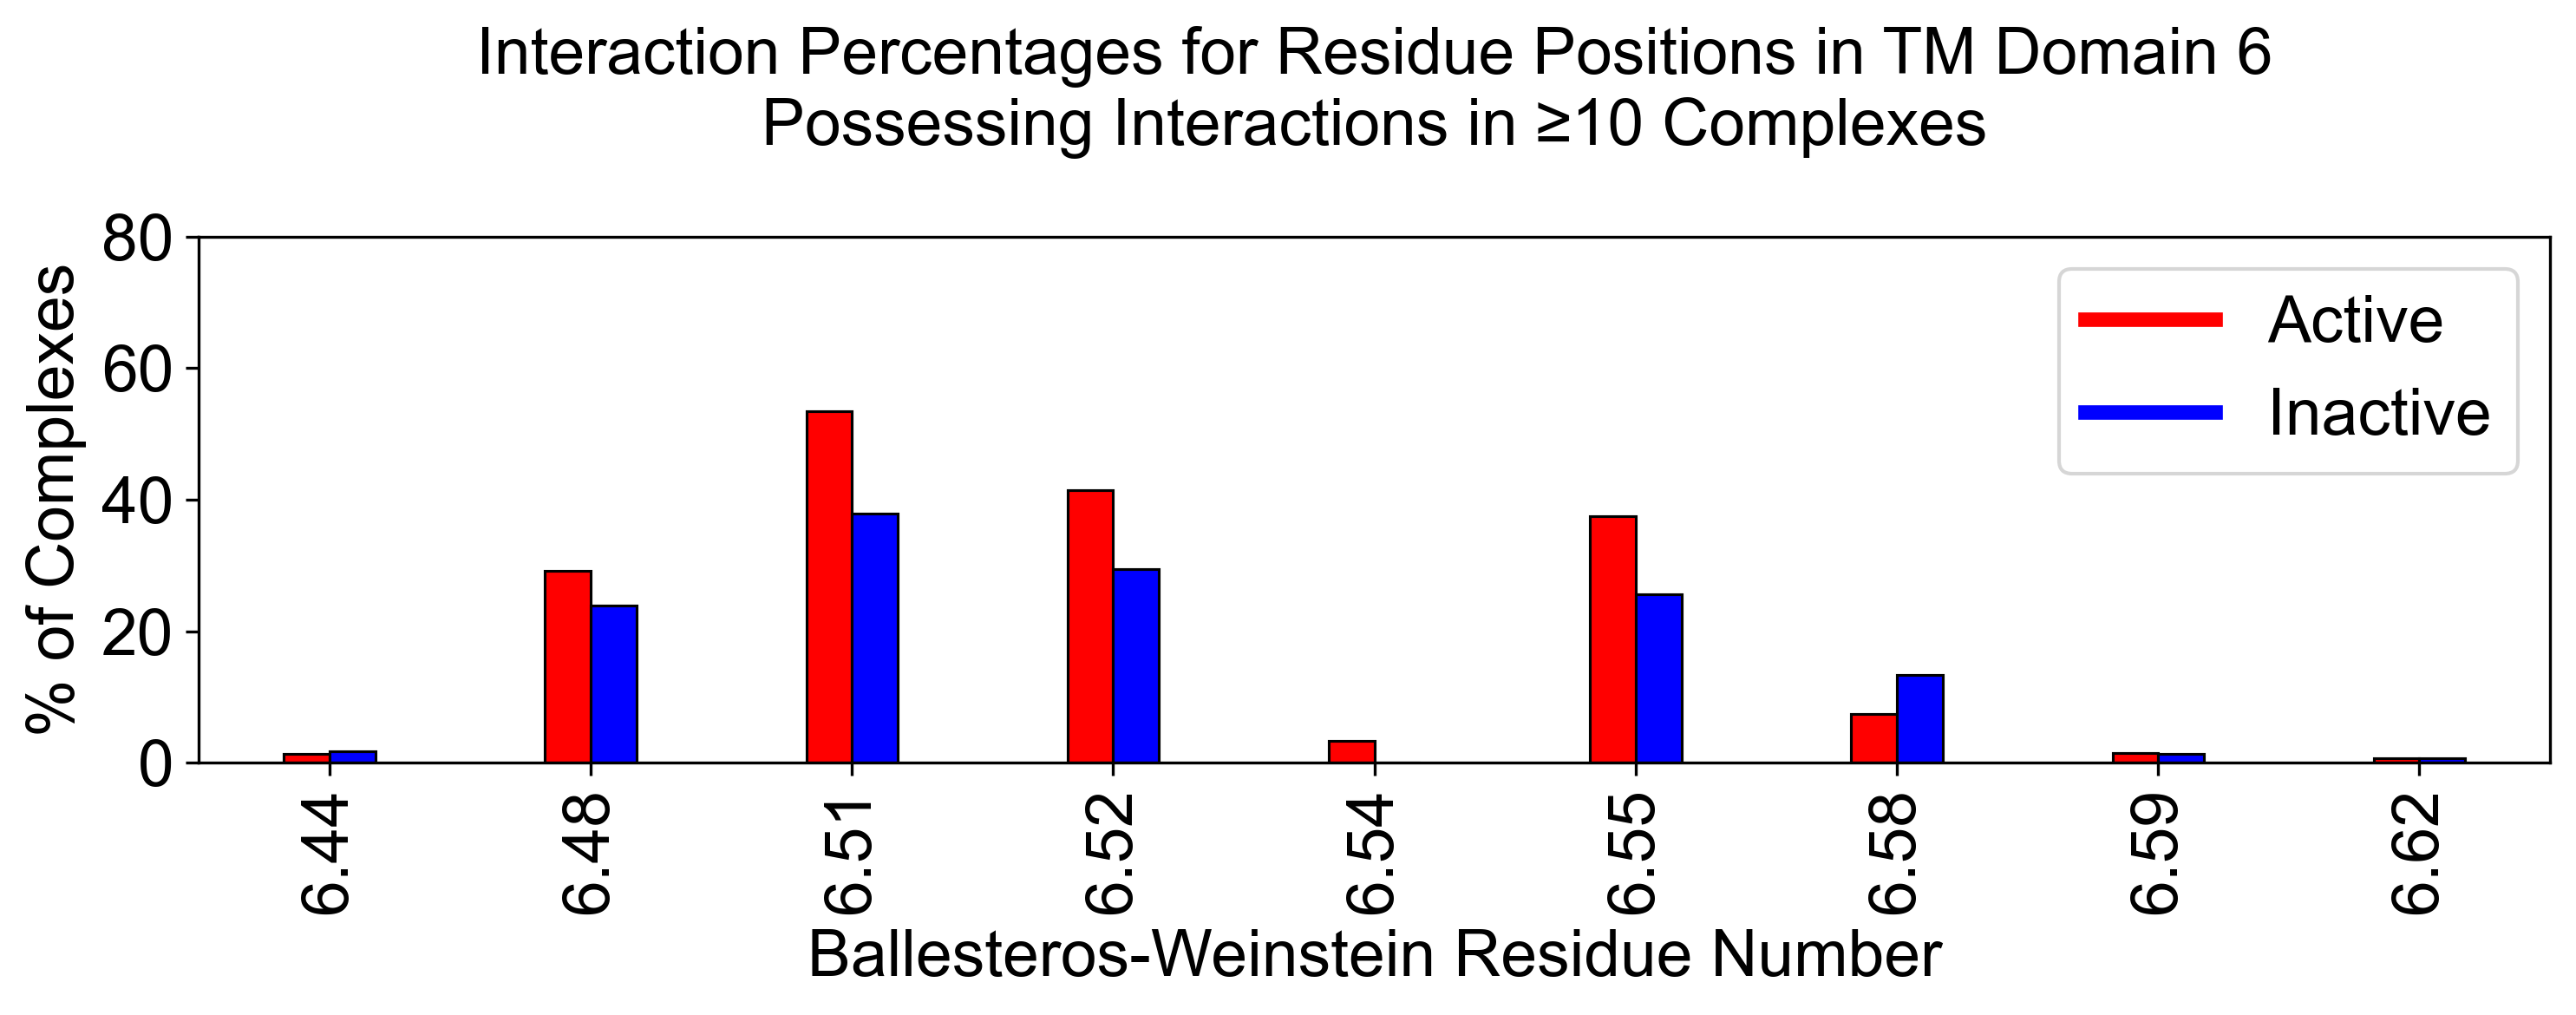

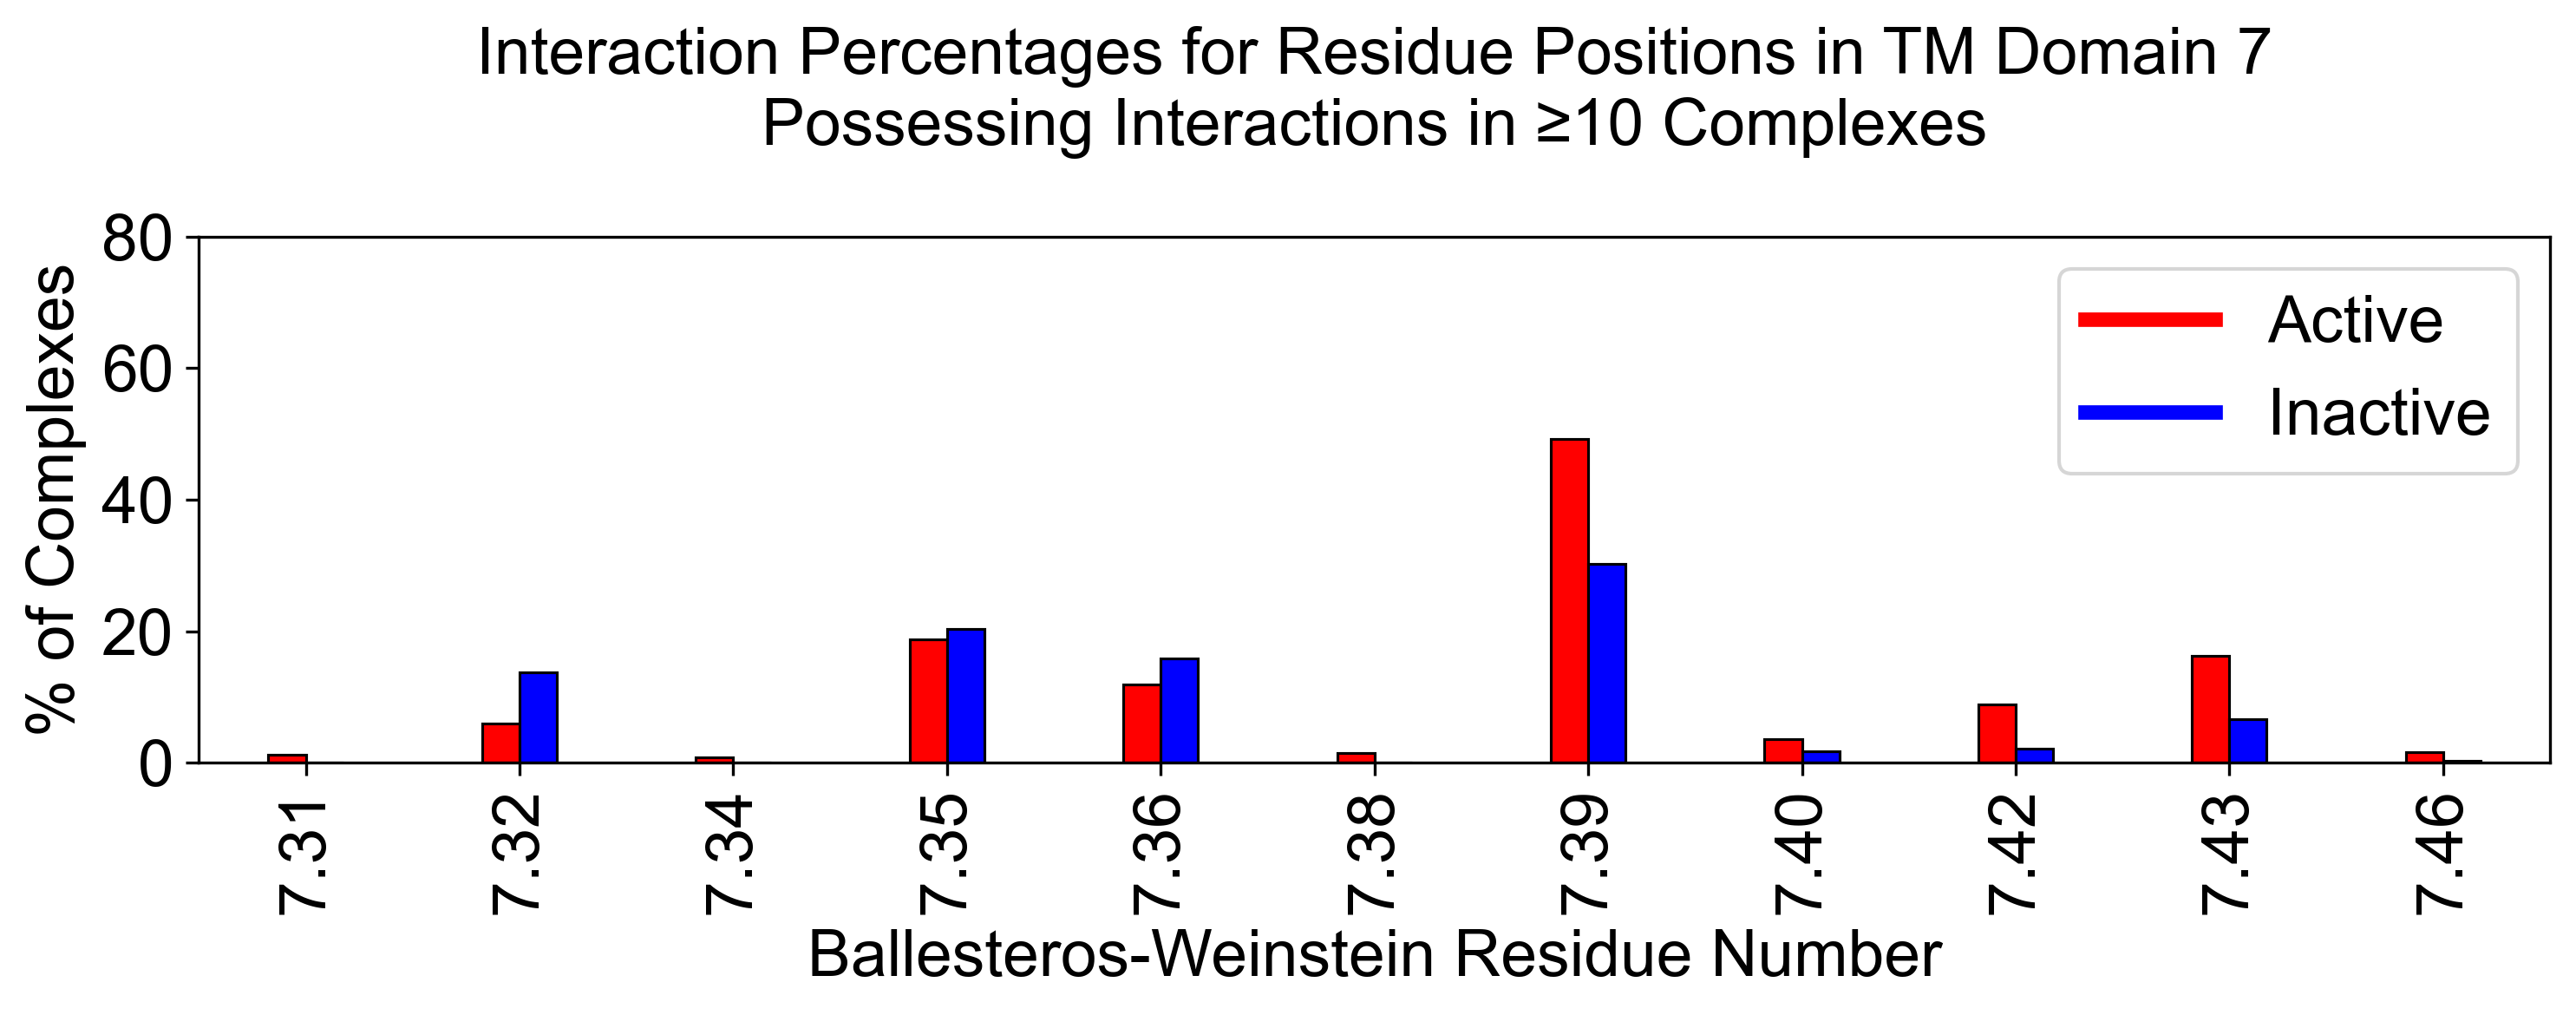

In [56]:
plot_cols = [TM1_energysum_cols, TM2_energysum_cols, TM3_energysum_cols, TM4_energysum_cols, TM5_energysum_cols, TM6_energysum_cols, TM7_energysum_cols]

gen_intcount_plots_classbased(plot_cols)

## Types of interactions at each residue position (Binders v. Non-binders)

In [57]:
inttype_cols = []

TM1_inttype_cols = []
TM2_inttype_cols = []
TM3_inttype_cols = []
TM4_inttype_cols = []
TM5_inttype_cols = []
TM6_inttype_cols = []
TM7_inttype_cols = []

for col in structure_df.columns.tolist():
    if 'inttype' in col:
        inttype_cols.append(col)
        if '1.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM1_inttype_cols.append(col)
        if '2.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM2_inttype_cols.append(col)
        if '3.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM3_inttype_cols.append(col)
        if '4.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM4_inttype_cols.append(col)
        if '5.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM5_inttype_cols.append(col)
        if '6.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM6_inttype_cols.append(col)
        if '7.' in col:
            if structure_df[col[:4] + '_intenergysum'][structure_df[col[:4] + '_intenergysum'] != 0].value_counts().sum() >= 10:
                TM7_inttype_cols.append(col)

In [58]:
structure_df_binders = structure_df.loc[(structure_df['Function'] == 'Agonist') | (structure_df['Function'] == 'Antagonist') | (structure_df['Function'] == 'Inverse agonist') | (structure_df['Function'] == 'Agonist (partial)')]

In [59]:
structure_df_nonbinders = structure_df.loc[(structure_df['Function'] == 'Inactive')]

In [60]:
def gen_inttype_plots_classbased(cols_list, tm_number):
    i = 0
    resnums = []
    b_none_counts = []
    b_Hbond_counts = []
    b_Distance_counts = []
    b_Arene_counts = []
    b_Ionic_counts = []
    b_Covalent_counts = []
    nb_none_counts = []
    nb_Hbond_counts = []
    nb_Distance_counts = []
    nb_Arene_counts = []
    nb_Ionic_counts = []
    nb_Covalent_counts = []
    for col in cols_list:
        # get residue position numbers
        if col[:4] not in resnums:
            resnums.append(col[:4])
                
#     print(resnums)
        
    for resnum in resnums:
        # get interaction type columns for a single residue position
        resnum_inttype_cols = [col for col in cols_list if resnum in col]
        
        # create dataframe with value counts of each of resnum's inttype columns
        resnum_intype_binder_df = structure_df_binders[resnum_inttype_cols].apply(pd.Series.value_counts).fillna(0)
        resnum_intype_nonbinder_df = structure_df_nonbinders[resnum_inttype_cols].apply(pd.Series.value_counts).fillna(0)
        
        # get indices of each value_counts df as a list
        b_indices = resnum_intype_binder_df.index.tolist()
        nb_indices = resnum_intype_nonbinder_df.index.tolist()
        
        # counts for binder df
        if 'None' in b_indices:
            b_none_counts.append(resnum_intype_binder_df.loc['None'].sum())
        else:
            b_none_counts.append(0)
            
        if 'Hbond' in b_indices:
            b_Hbond_counts.append(resnum_intype_binder_df.loc['Hbond'].sum())
        else:
            b_Hbond_counts.append(0)
            
        if 'Distance' in b_indices:
            b_Distance_counts.append(resnum_intype_binder_df.loc['Distance'].sum())
        else:
            b_Distance_counts.append(0)
            
        if 'Arene' in b_indices:
            b_Arene_counts.append(resnum_intype_binder_df.loc['Arene'].sum())
        else:
            b_Arene_counts.append(0)
            
        if 'Ionic' in b_indices:
            b_Ionic_counts.append(resnum_intype_binder_df.loc['Ionic'].sum())
        else:
            b_Ionic_counts.append(0)
            
        if 'Covalent' in b_indices:
            b_Covalent_counts.append(resnum_intype_binder_df.loc['Covalent'].sum())
        else:
            b_Covalent_counts.append(0)
            
        # counts for nonbinder df
        if 'None' in nb_indices:
            nb_none_counts.append(resnum_intype_nonbinder_df.loc['None'].sum())
        else:
            nb_none_counts.append(0)
            
        if 'Hbond' in nb_indices:
            nb_Hbond_counts.append(resnum_intype_nonbinder_df.loc['Hbond'].sum())
        else:
            nb_Hbond_counts.append(0)
            
        if 'Distance' in nb_indices:
            nb_Distance_counts.append(resnum_intype_nonbinder_df.loc['Distance'].sum())
        else:
            nb_Distance_counts.append(0)
            
        if 'Arene' in nb_indices:
            nb_Arene_counts.append(resnum_intype_nonbinder_df.loc['Arene'].sum())
        else:
            nb_Arene_counts.append(0)
            
        if 'Ionic' in nb_indices:
            nb_Ionic_counts.append(resnum_intype_nonbinder_df.loc['Ionic'].sum())
        else:
            nb_Ionic_counts.append(0)
            
        if 'Covalent' in nb_indices:
            nb_Covalent_counts.append(resnum_intype_nonbinder_df.loc['Covalent'].sum())
        else:
            nb_Covalent_counts.append(0)

            
    # percentages
    b_int_counts_percs_hbond = []
    b_int_counts_percs_distance = []
    b_int_counts_percs_arene = []
    b_int_counts_percs_ionic = []
    b_int_counts_percs_covalent = []
    nb_int_counts_percs_hbond = []
    nb_int_counts_percs_distance = []
    nb_int_counts_percs_arene = []
    nb_int_counts_percs_ionic = []
    nb_int_counts_percs_covalent = []
    
    for y in b_Hbond_counts:
        b_int_counts_percs_hbond.append((y/(len(structure_df_binders)))*100)
        
    for y in b_Distance_counts:
        b_int_counts_percs_distance.append((y/(len(structure_df_binders)))*100)
        
    for y in b_Arene_counts:
        b_int_counts_percs_arene.append((y/(len(structure_df_binders)))*100)
        
    for y in b_Ionic_counts:
        b_int_counts_percs_ionic.append((y/(len(structure_df_binders)))*100)
        
    for y in b_Covalent_counts:
        b_int_counts_percs_covalent.append((y/(len(structure_df_binders)))*100)
        
    for y in nb_Hbond_counts:
        nb_int_counts_percs_hbond.append((y/(len(structure_df_nonbinders)))*100)

    for y in nb_Distance_counts:
        nb_int_counts_percs_distance.append((y/(len(structure_df_nonbinders)))*100)
        
#     print(resnums, '\n', nb_int_counts_percs_distance)
    
    for y in nb_Arene_counts:
        nb_int_counts_percs_arene.append((y/(len(structure_df_nonbinders)))*100)
        

    for y in nb_Ionic_counts:
        nb_int_counts_percs_ionic.append((y/(len(structure_df_nonbinders)))*100)

    for y in nb_Covalent_counts:
        nb_int_counts_percs_covalent.append((y/(len(structure_df_nonbinders)))*100) 
    
    # plots
    matplotlib.rcParams['figure.figsize'] = [10, 4] #width, height (both in inches)
    matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
    matplotlib.rcParams["font.family"] = "arial"
    width = 0.18  # the width of the bars
    fig, ax = plt.subplots()

    x = np.arange(len(resnums))

    # create rectangles for bar plot 
    # Hbond bars
    rects1 = ax.bar(x - (2.25*width), b_int_counts_percs_hbond, width/2, label=resnums, color = 'lightcoral', edgecolor = "black", linewidth = 0.75)
    rects2 = ax.bar(x - (1.75*width), nb_int_counts_percs_hbond, width/2, label=resnums, color = 'darkred', edgecolor = "black", linewidth = 0.75)
    # Distance bars
    rects3 = ax.bar(x - (1.25*width), b_int_counts_percs_distance, width/2, label=resnums, color = 'bisque', edgecolor = "black", linewidth = 0.75)
    rects4 = ax.bar(x - (0.75*width), nb_int_counts_percs_distance, width/2, label=resnums, color = 'darkorange', edgecolor = "black", linewidth = 0.75)
    # Arene bars
    rects5 = ax.bar(x - (0.25*width), b_int_counts_percs_arene, width/2, label=resnums, color = 'palegreen', edgecolor = "black", linewidth = 0.75)
    rects6 = ax.bar(x + (0.25*width), nb_int_counts_percs_arene, width/2, label=resnums, color = 'olivedrab', edgecolor = "black", linewidth = 0.75)
    # Ionic bars
    rects7 = ax.bar(x + (0.75*width), b_int_counts_percs_ionic, width/2, label=resnums, color = 'lightcyan', edgecolor = "black", linewidth = 0.75)
    rects8 = ax.bar(x + (1.25*width), nb_int_counts_percs_ionic, width/2, label=resnums, color = 'navy', edgecolor = "black", linewidth = 0.75)
    # Covalent bars
    rects9 = ax.bar(x + (1.75*width), b_int_counts_percs_covalent, width/2, label=resnums, color = 'thistle', edgecolor = "black", linewidth = 0.75)
    rects10 = ax.bar(x + (2.25*width), nb_int_counts_percs_covalent, width/2, label=resnums, color = 'indigo', edgecolor = "black", linewidth = 0.75)
    
    # Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
    plt.title("Interaction Percentages by Type for Residue Positions in TM Domain " + str(tm_number) + '\nPossessing Interactions in ≥10 Complexes\n', fontsize = 18)
    ax.set_ylabel('% of Complexes', fontsize = 18)
    ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 18)
    plt.xticks(rotation = 90, fontsize = 18)
    ax.set_xticks(x)
    ax.set_xticklabels(resnums, rotation = 90, fontsize = 18)
    plt.yticks(fontsize = 18)
    ax.set_ylim([0, 100])

    # Add Legend
#     custom_lines = [Line2D([0], [0], color='lightcoral', lw=4),
#                     Line2D([0], [0], color='darkred', lw=4),
#                     Line2D([0], [0], color='bisque', lw=4),
#                     Line2D([0], [0], color='darkorange', lw=4),
#                     Line2D([0], [0], color='palegreen', lw=4),
#                     Line2D([0], [0], color='olivedrab', lw=4),
#                     Line2D([0], [0], color='lightcyan', lw=4),
#                     Line2D([0], [0], color='navy', lw=4),
#                     Line2D([0], [0], color='thistle', lw=4),
#                     Line2D([0], [0], color='indigo', lw=4)]

#     ax.legend(custom_lines, ['Hbond (Binder)',
#                              'Hbond (Non-binder)',
#                              'Distance (Binder)',
#                              'Distance (Non-binder)',
#                              'Arene (Binder)',
#                              'Arene (Non-binder)',
#                              'Ionic (Binder)',
#                              'Ionic (Non-binder)',
#                              'Covalent (Binder)',
#                              'Covalent (Non-binder)'], fontsize = 18, loc='center left', bbox_to_anchor=(1, 0.35))
    
    fig.tight_layout()
    
    # minor tick marks
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
#     ax.tick_params('both', length=50, width=1, which='minor')
    plt.grid(which='minor')

    plt.xlim([-0.5,len(resnums)-0.5])
    plt.savefig('plots/manuscript_plots/TM' + str(tm_number) + '_intpercplot_bytype.png', bbox_inches='tight')
    plt.show()

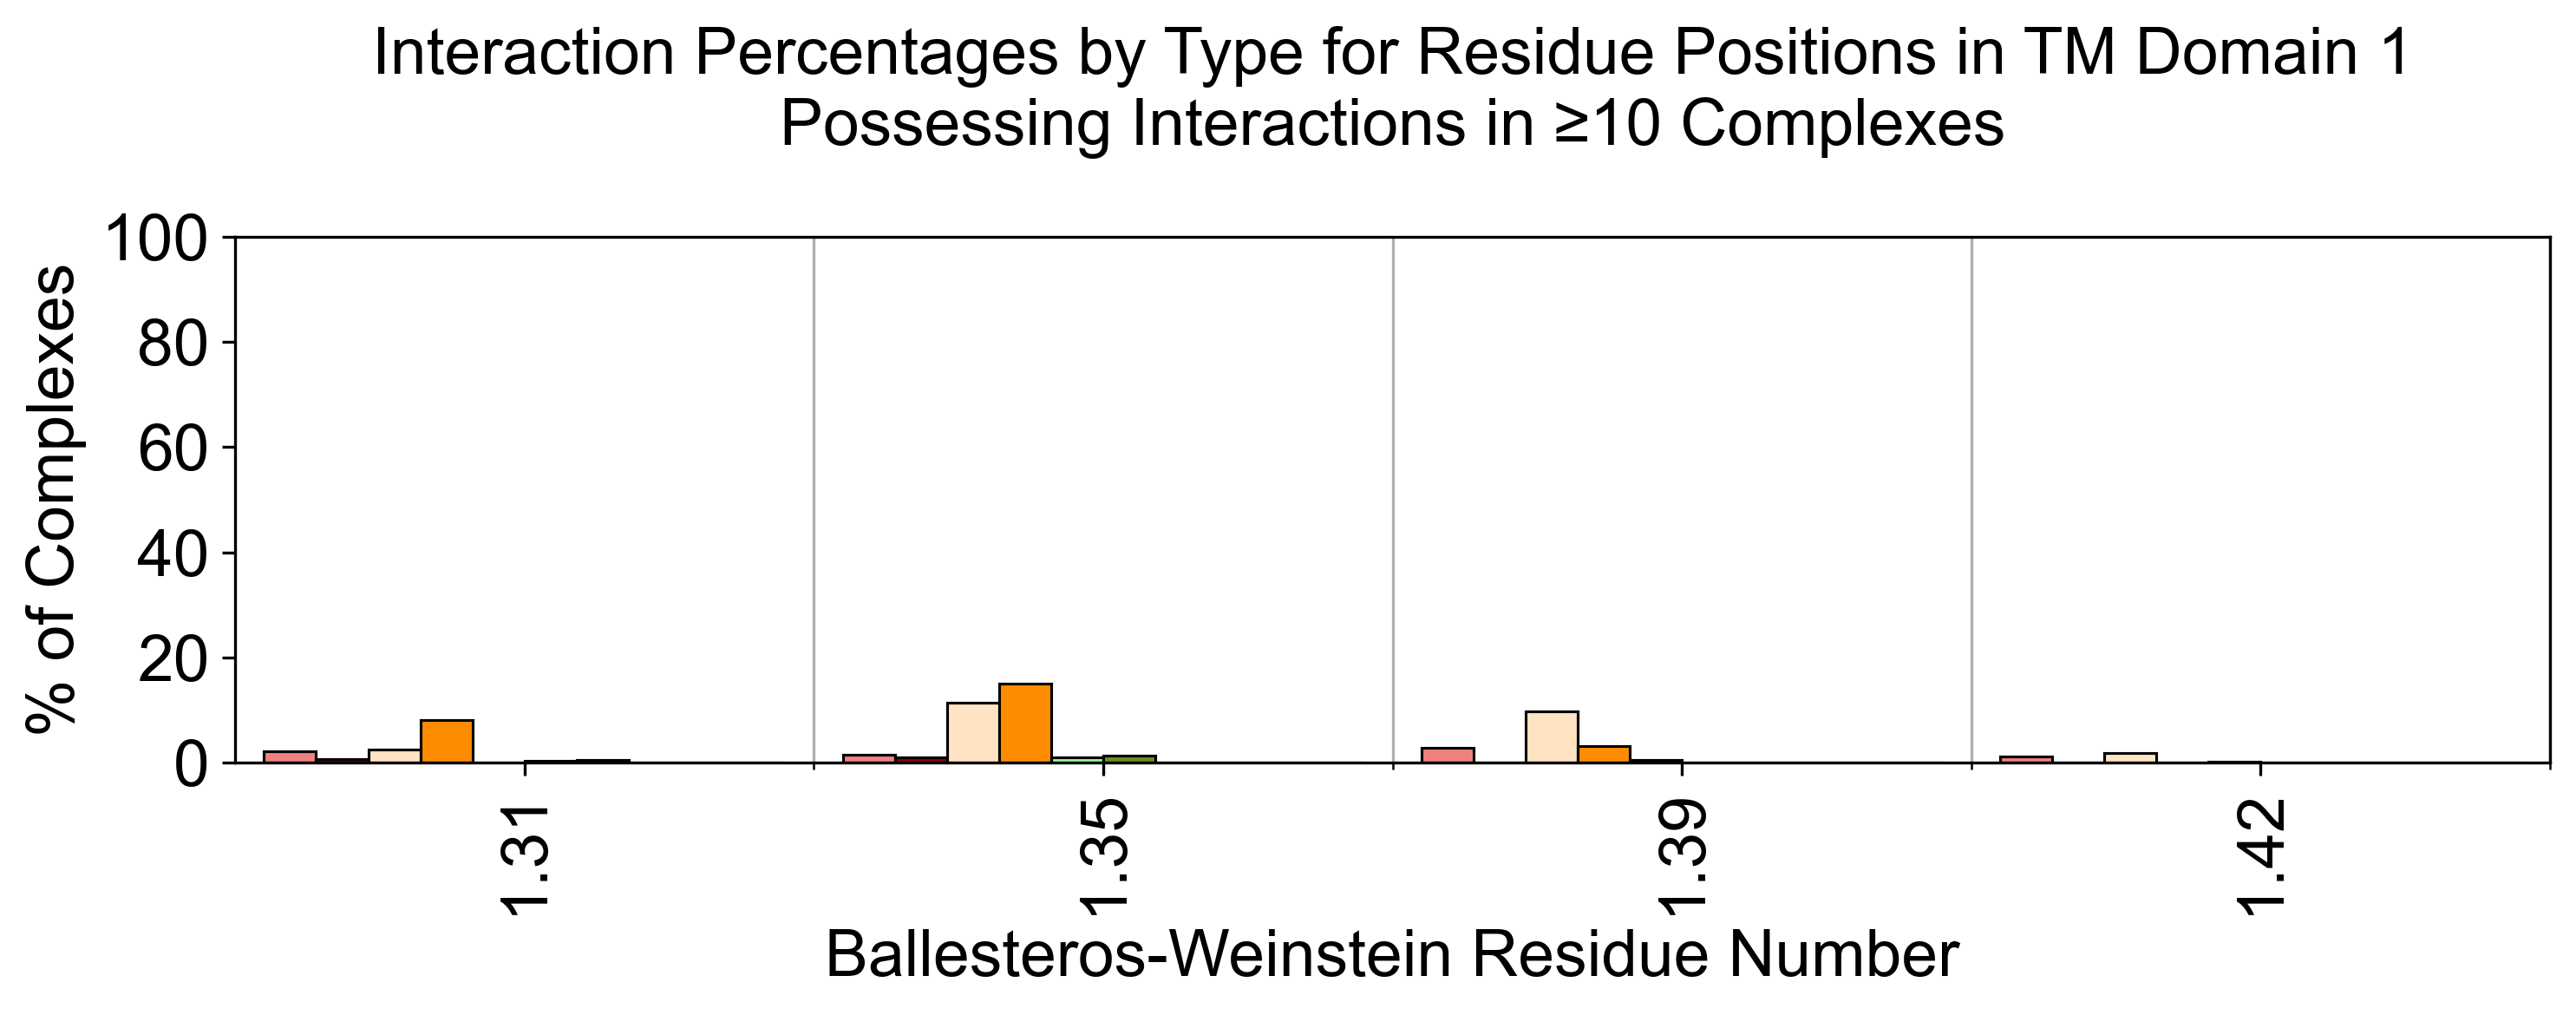

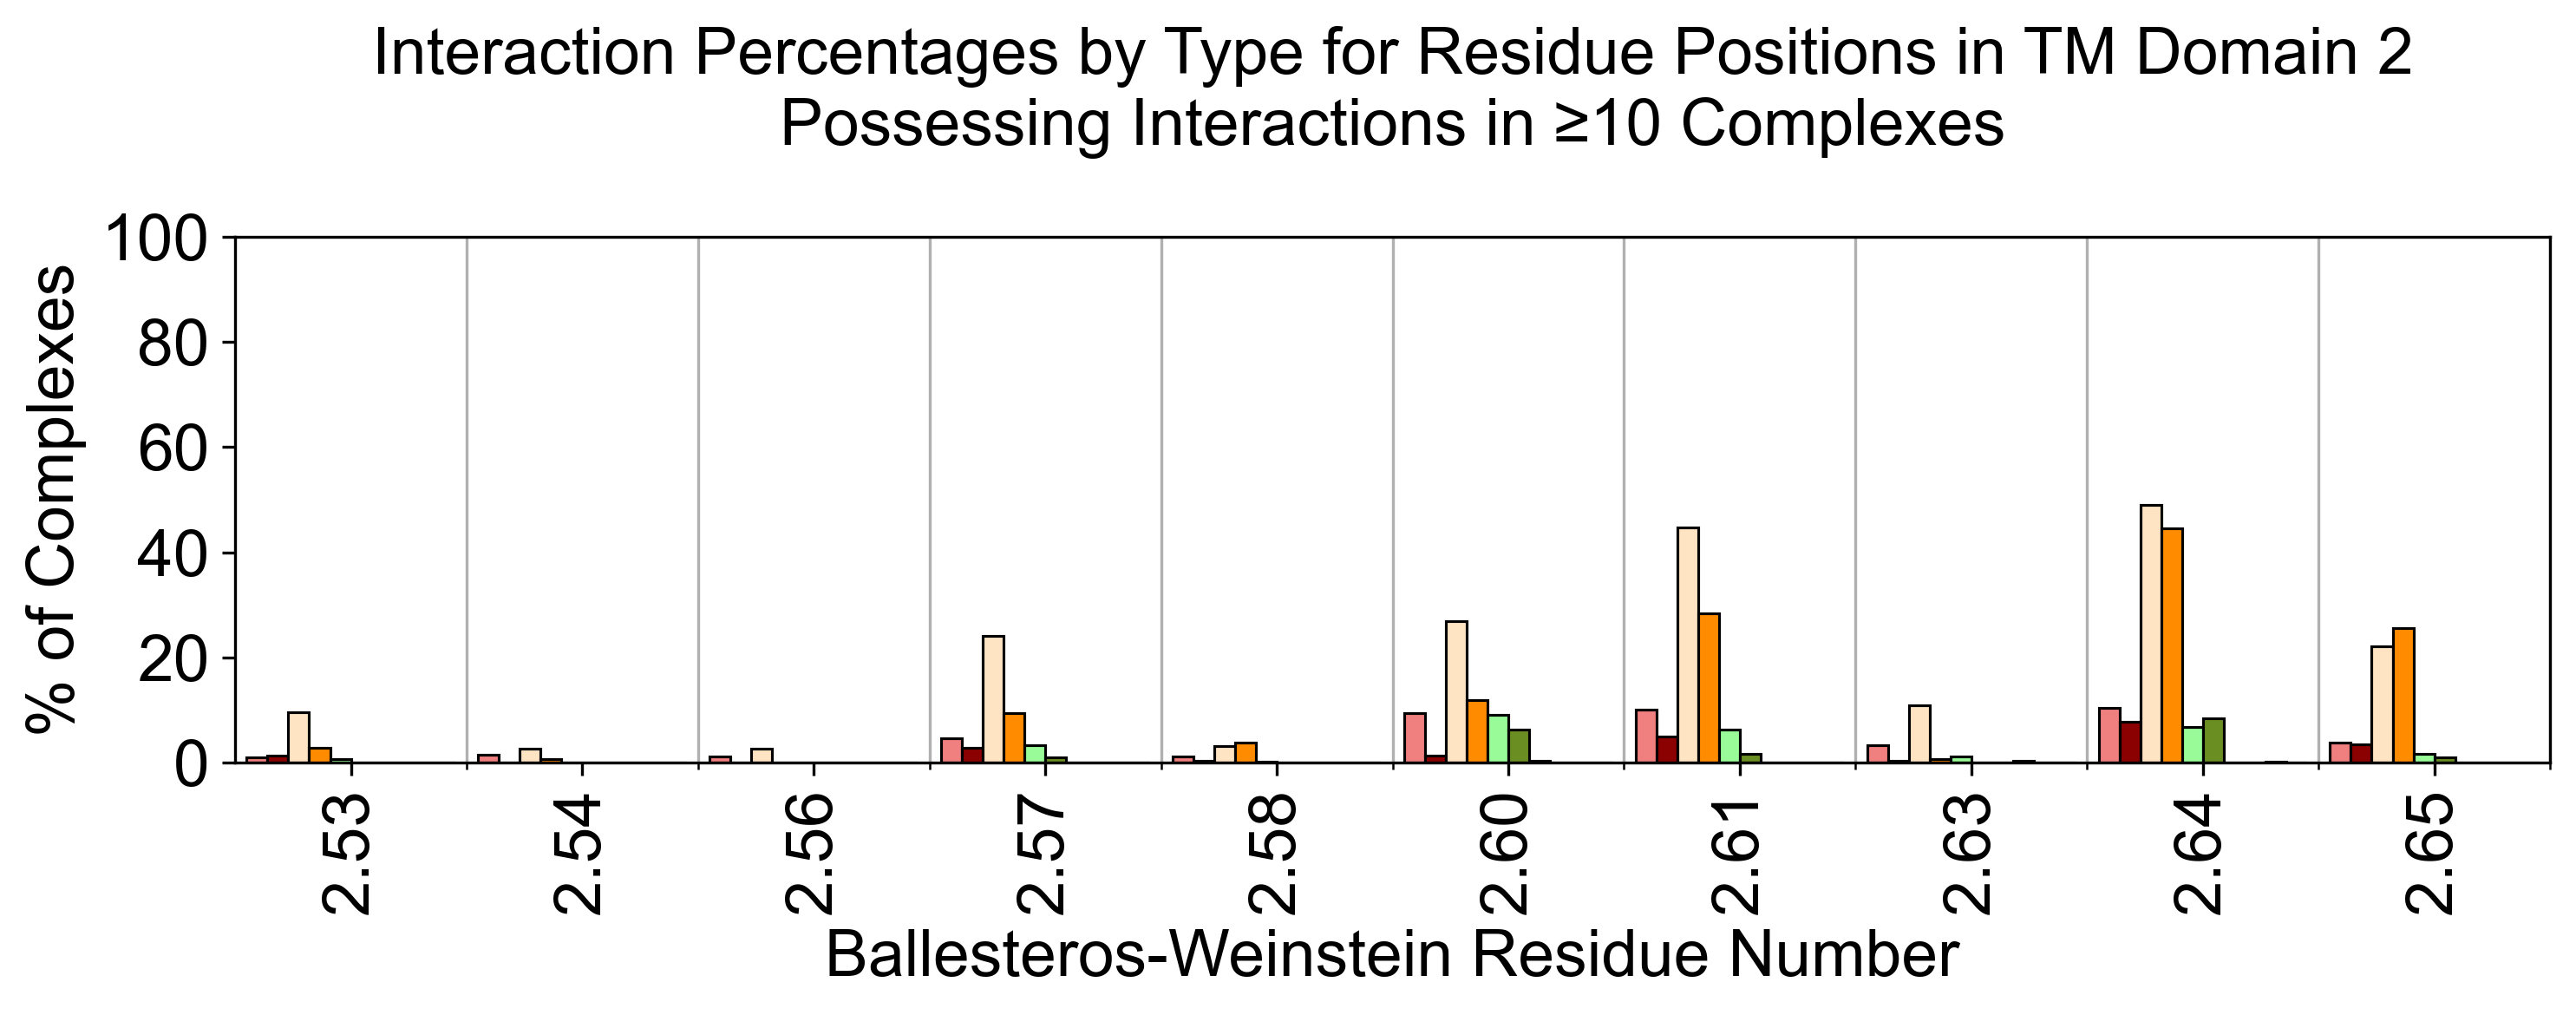

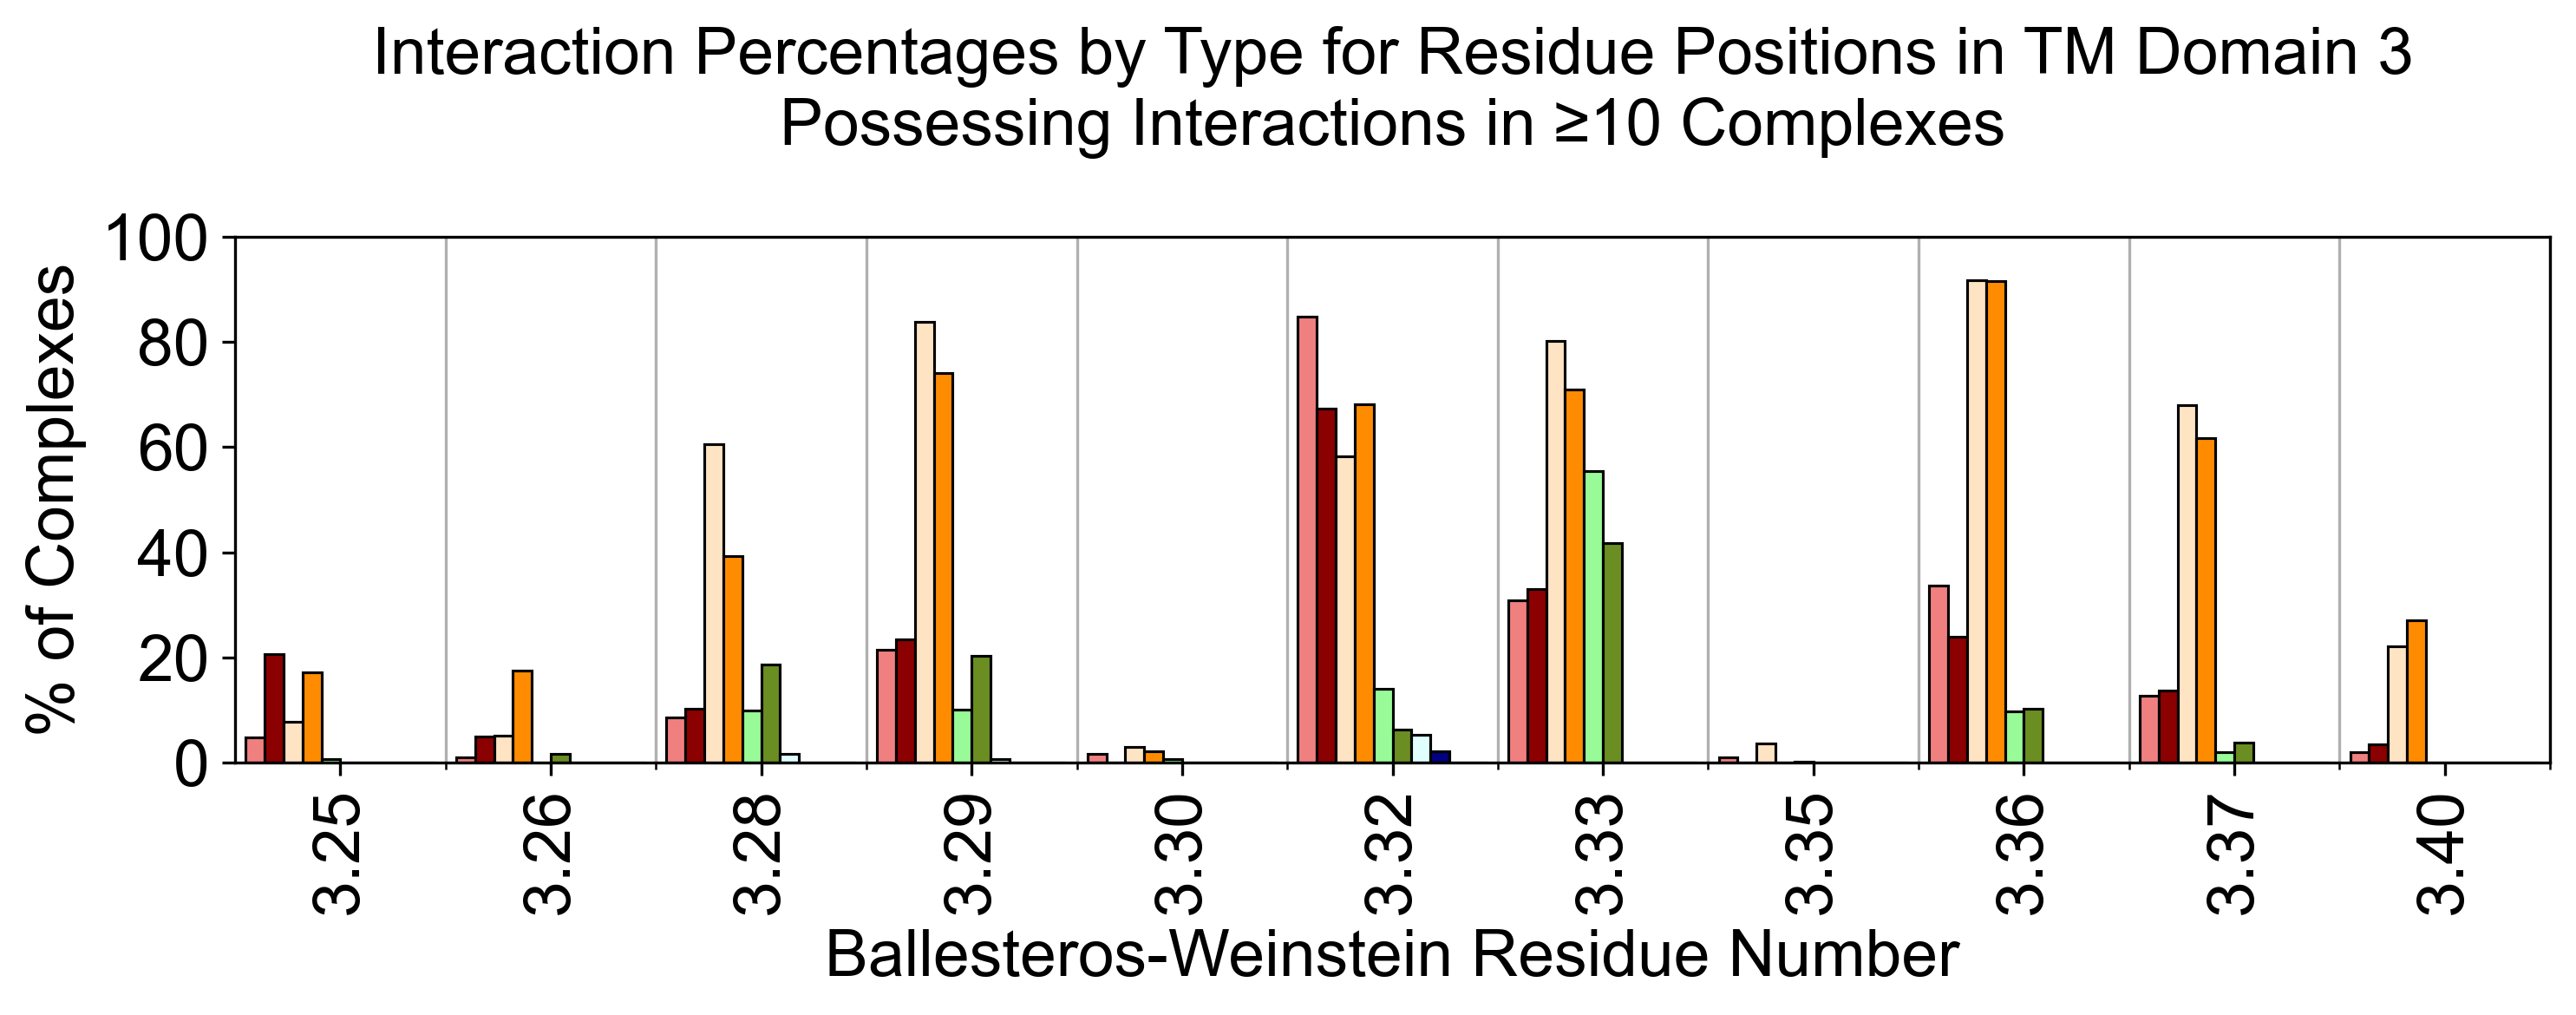

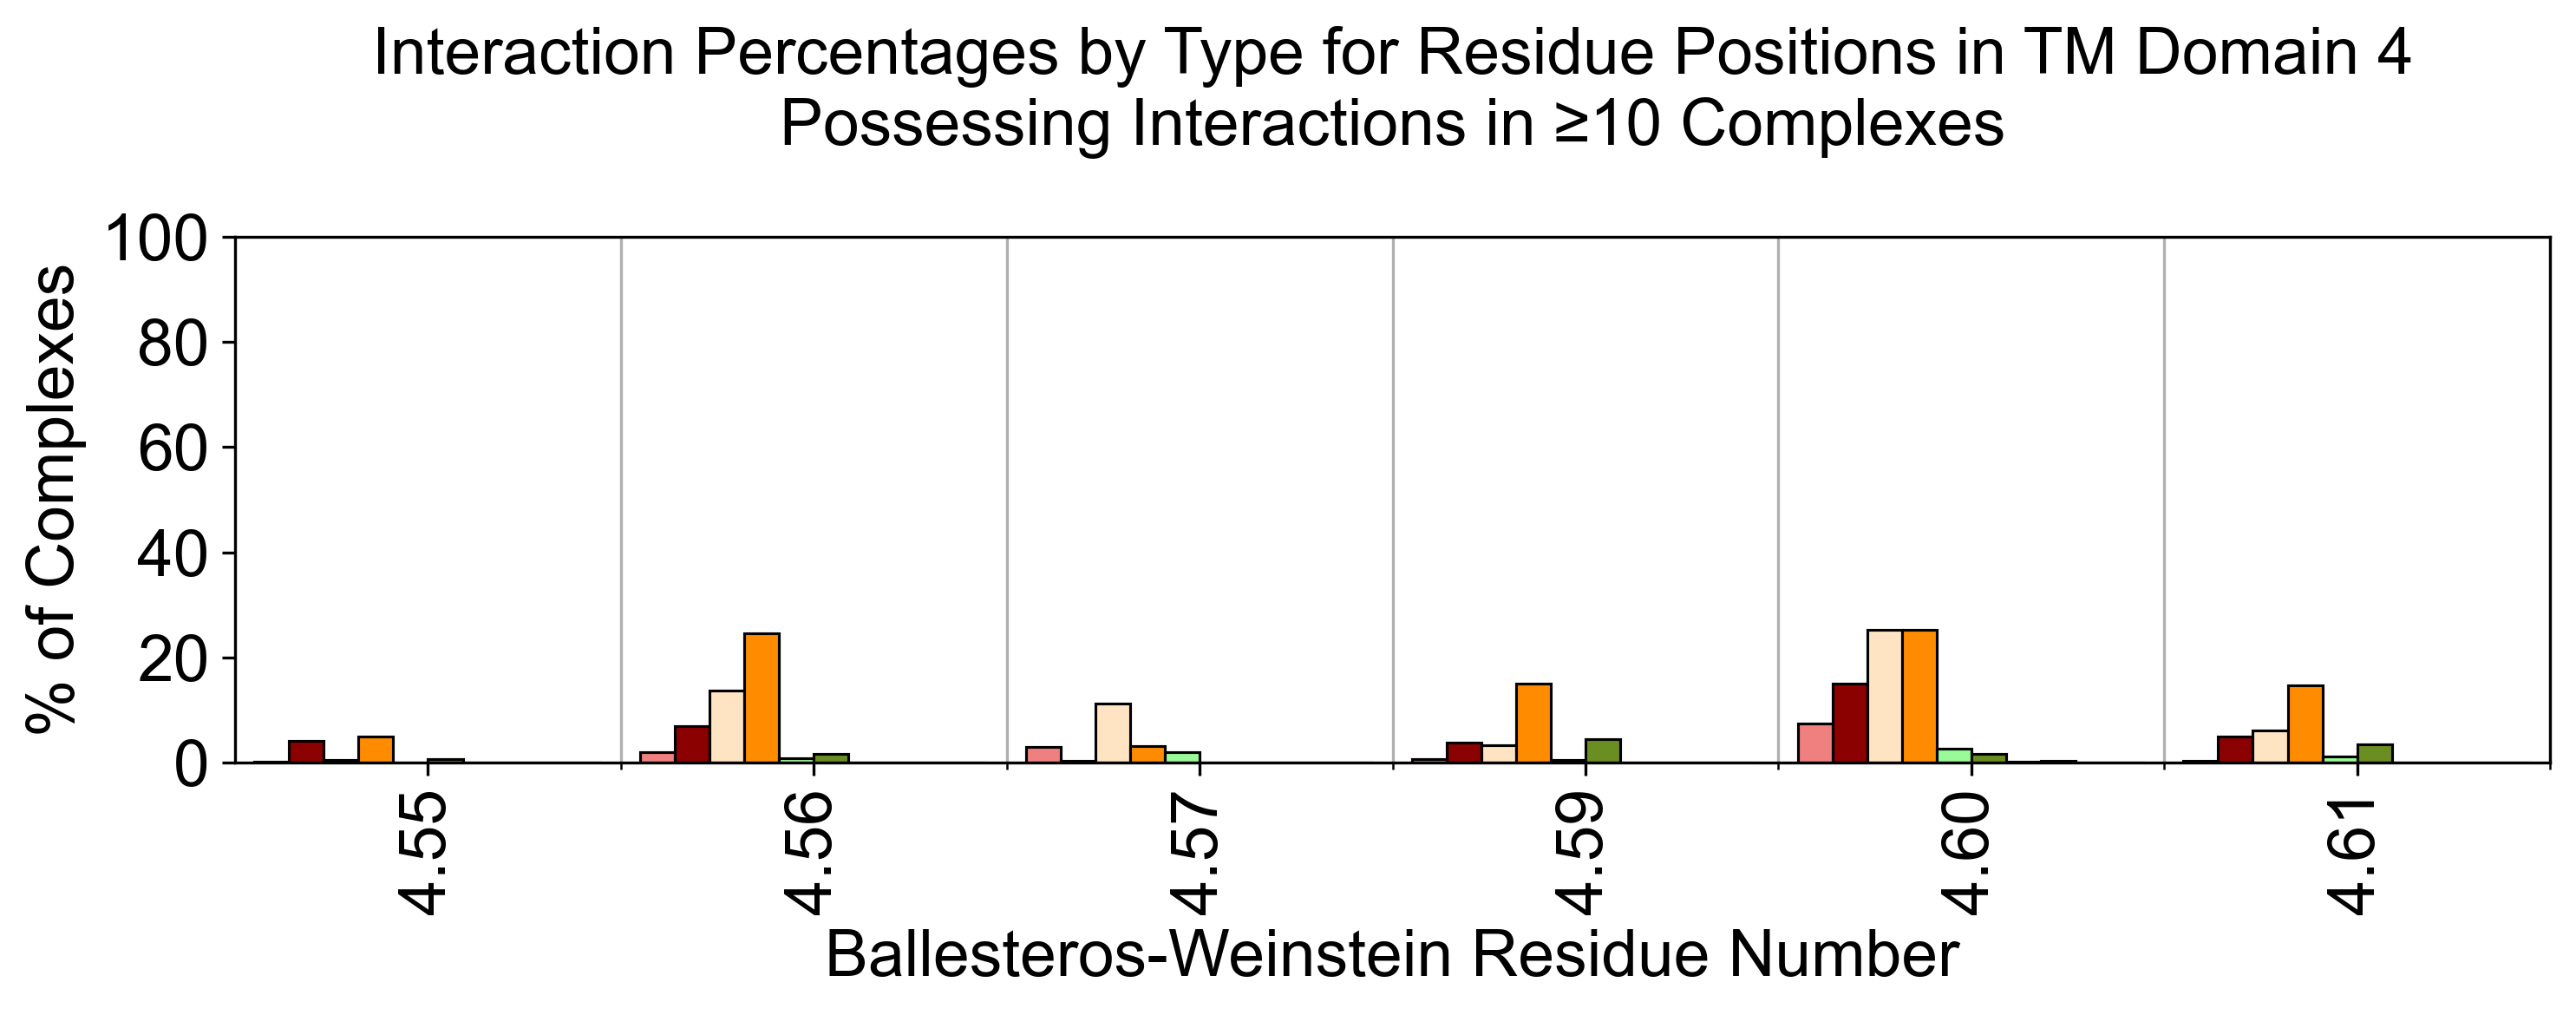

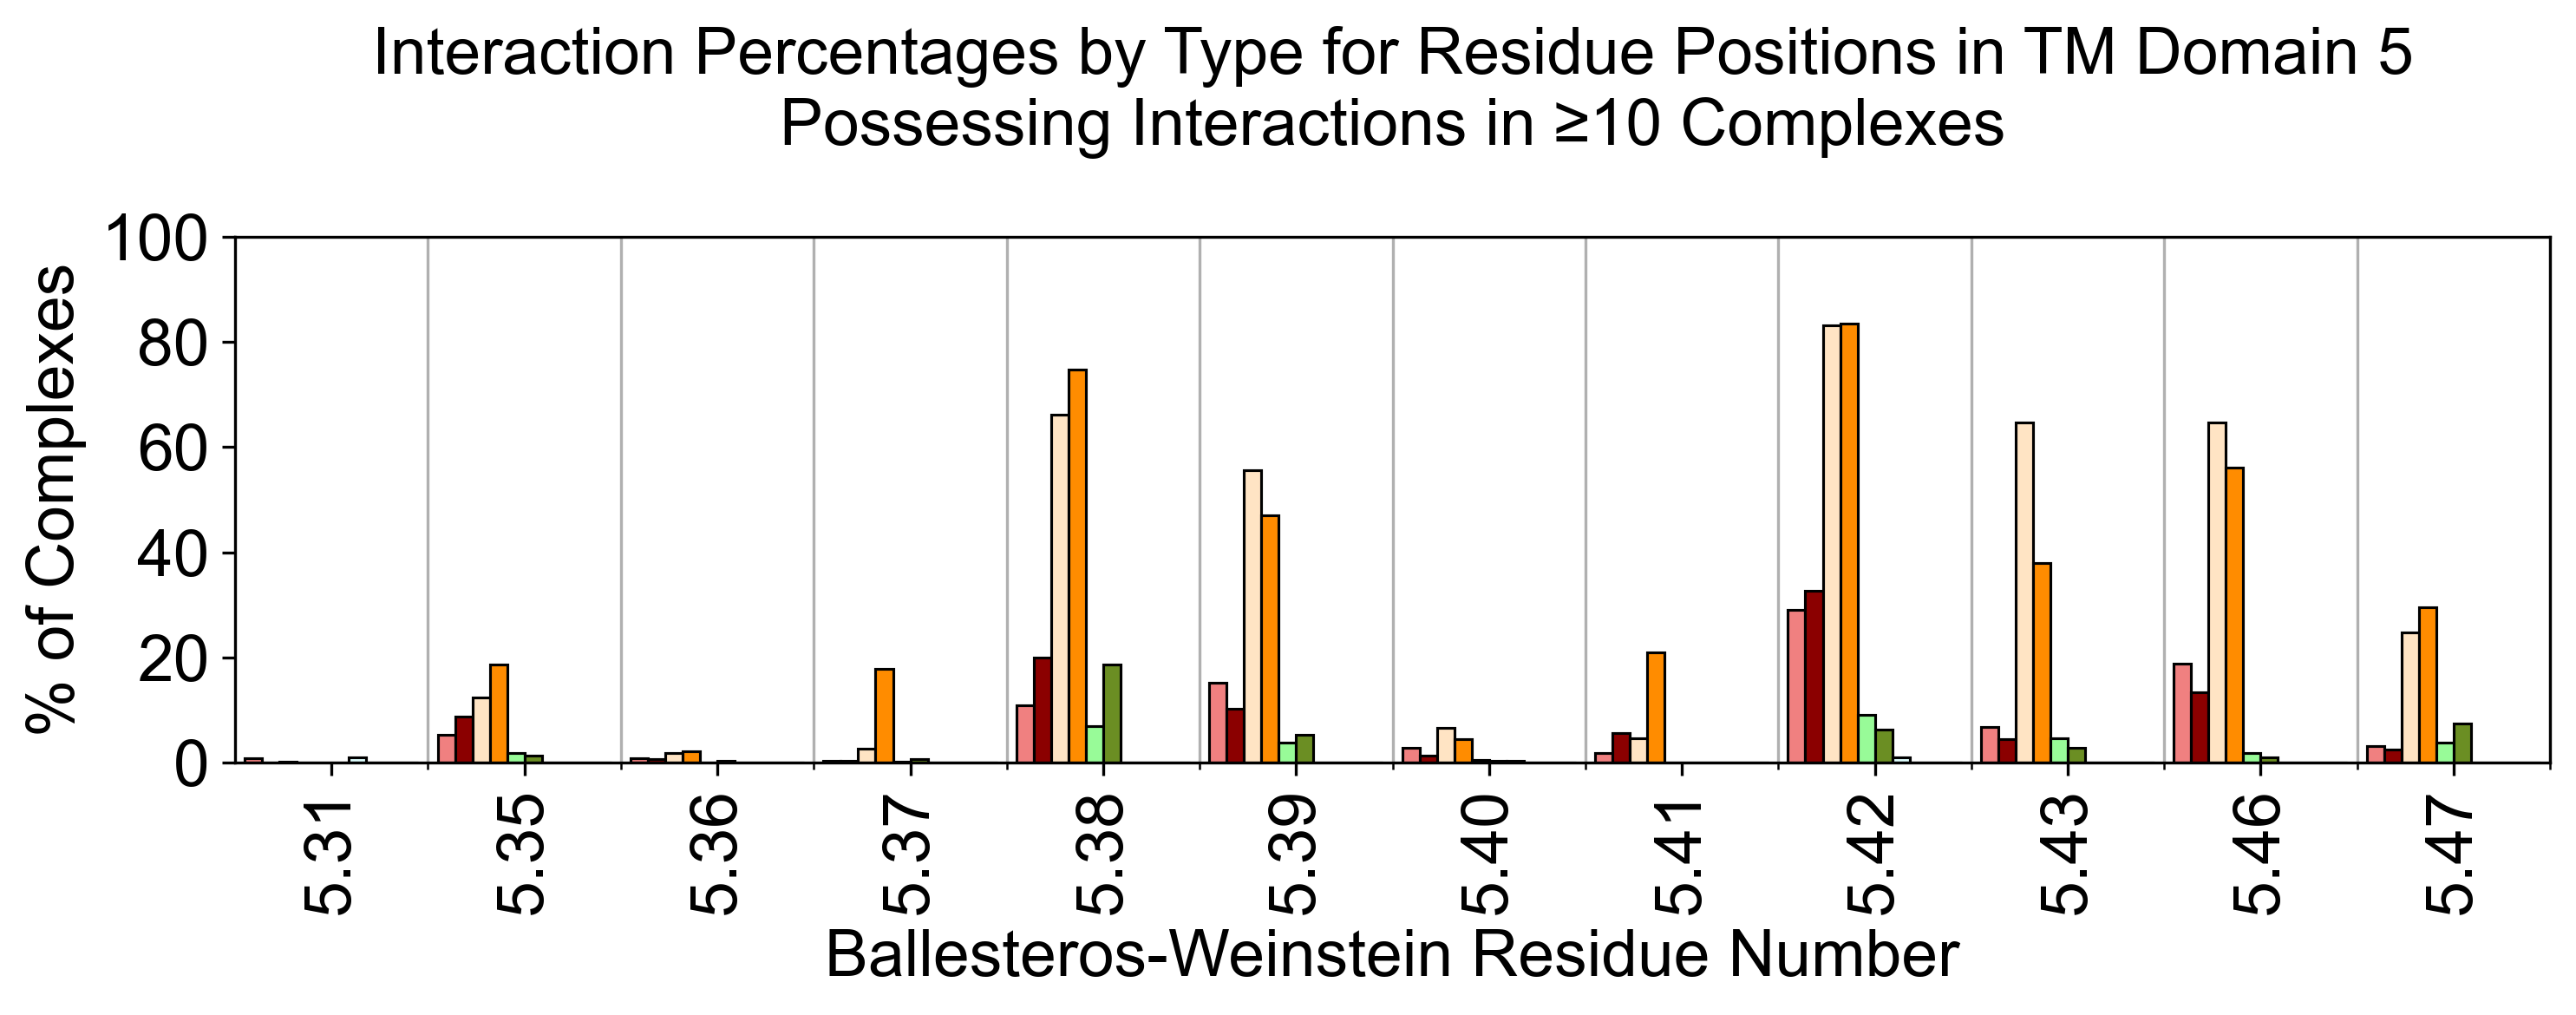

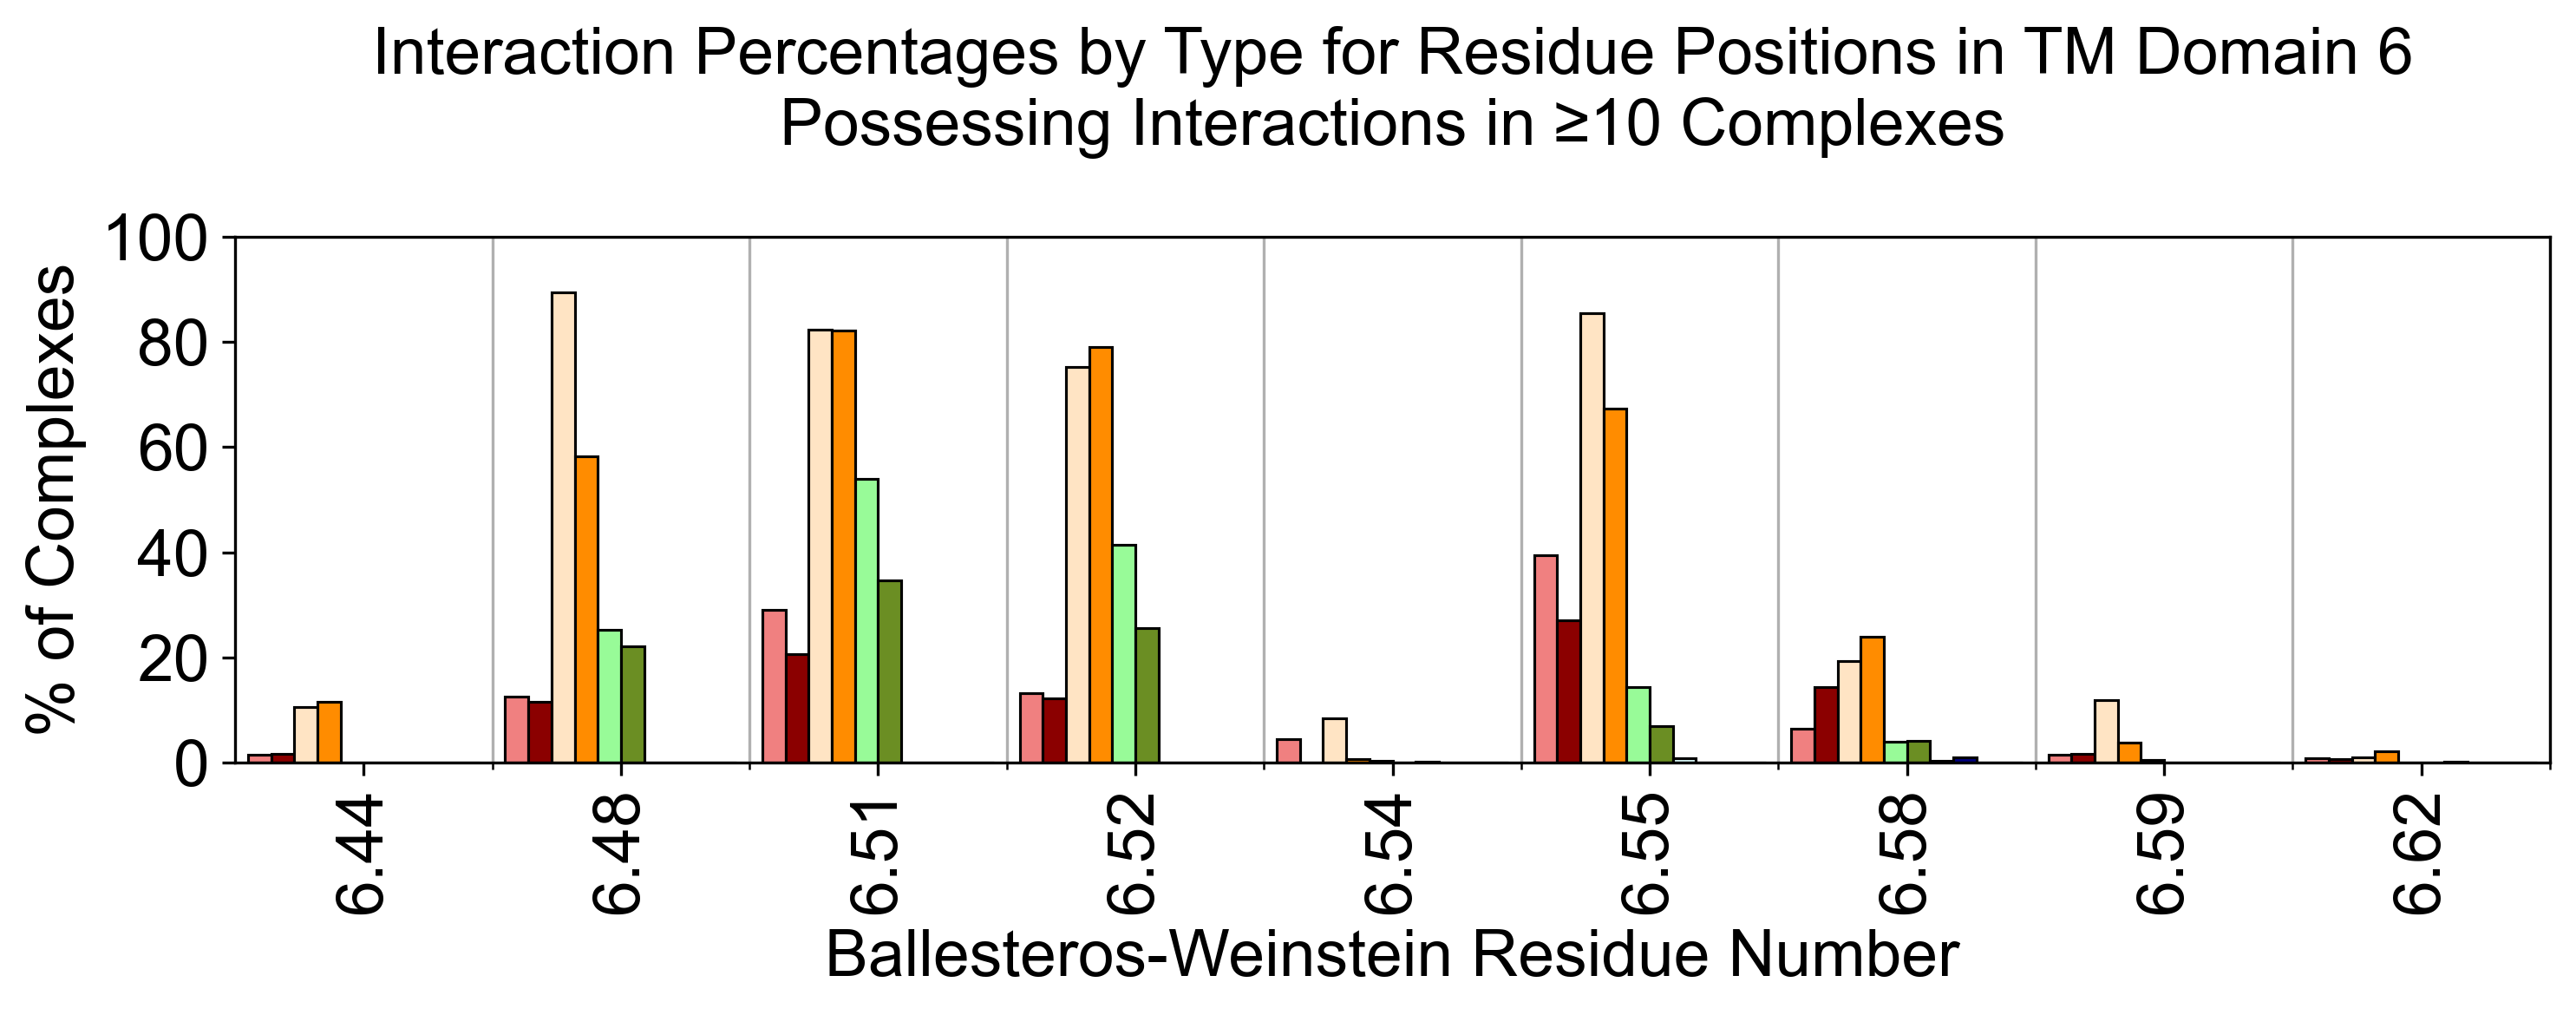

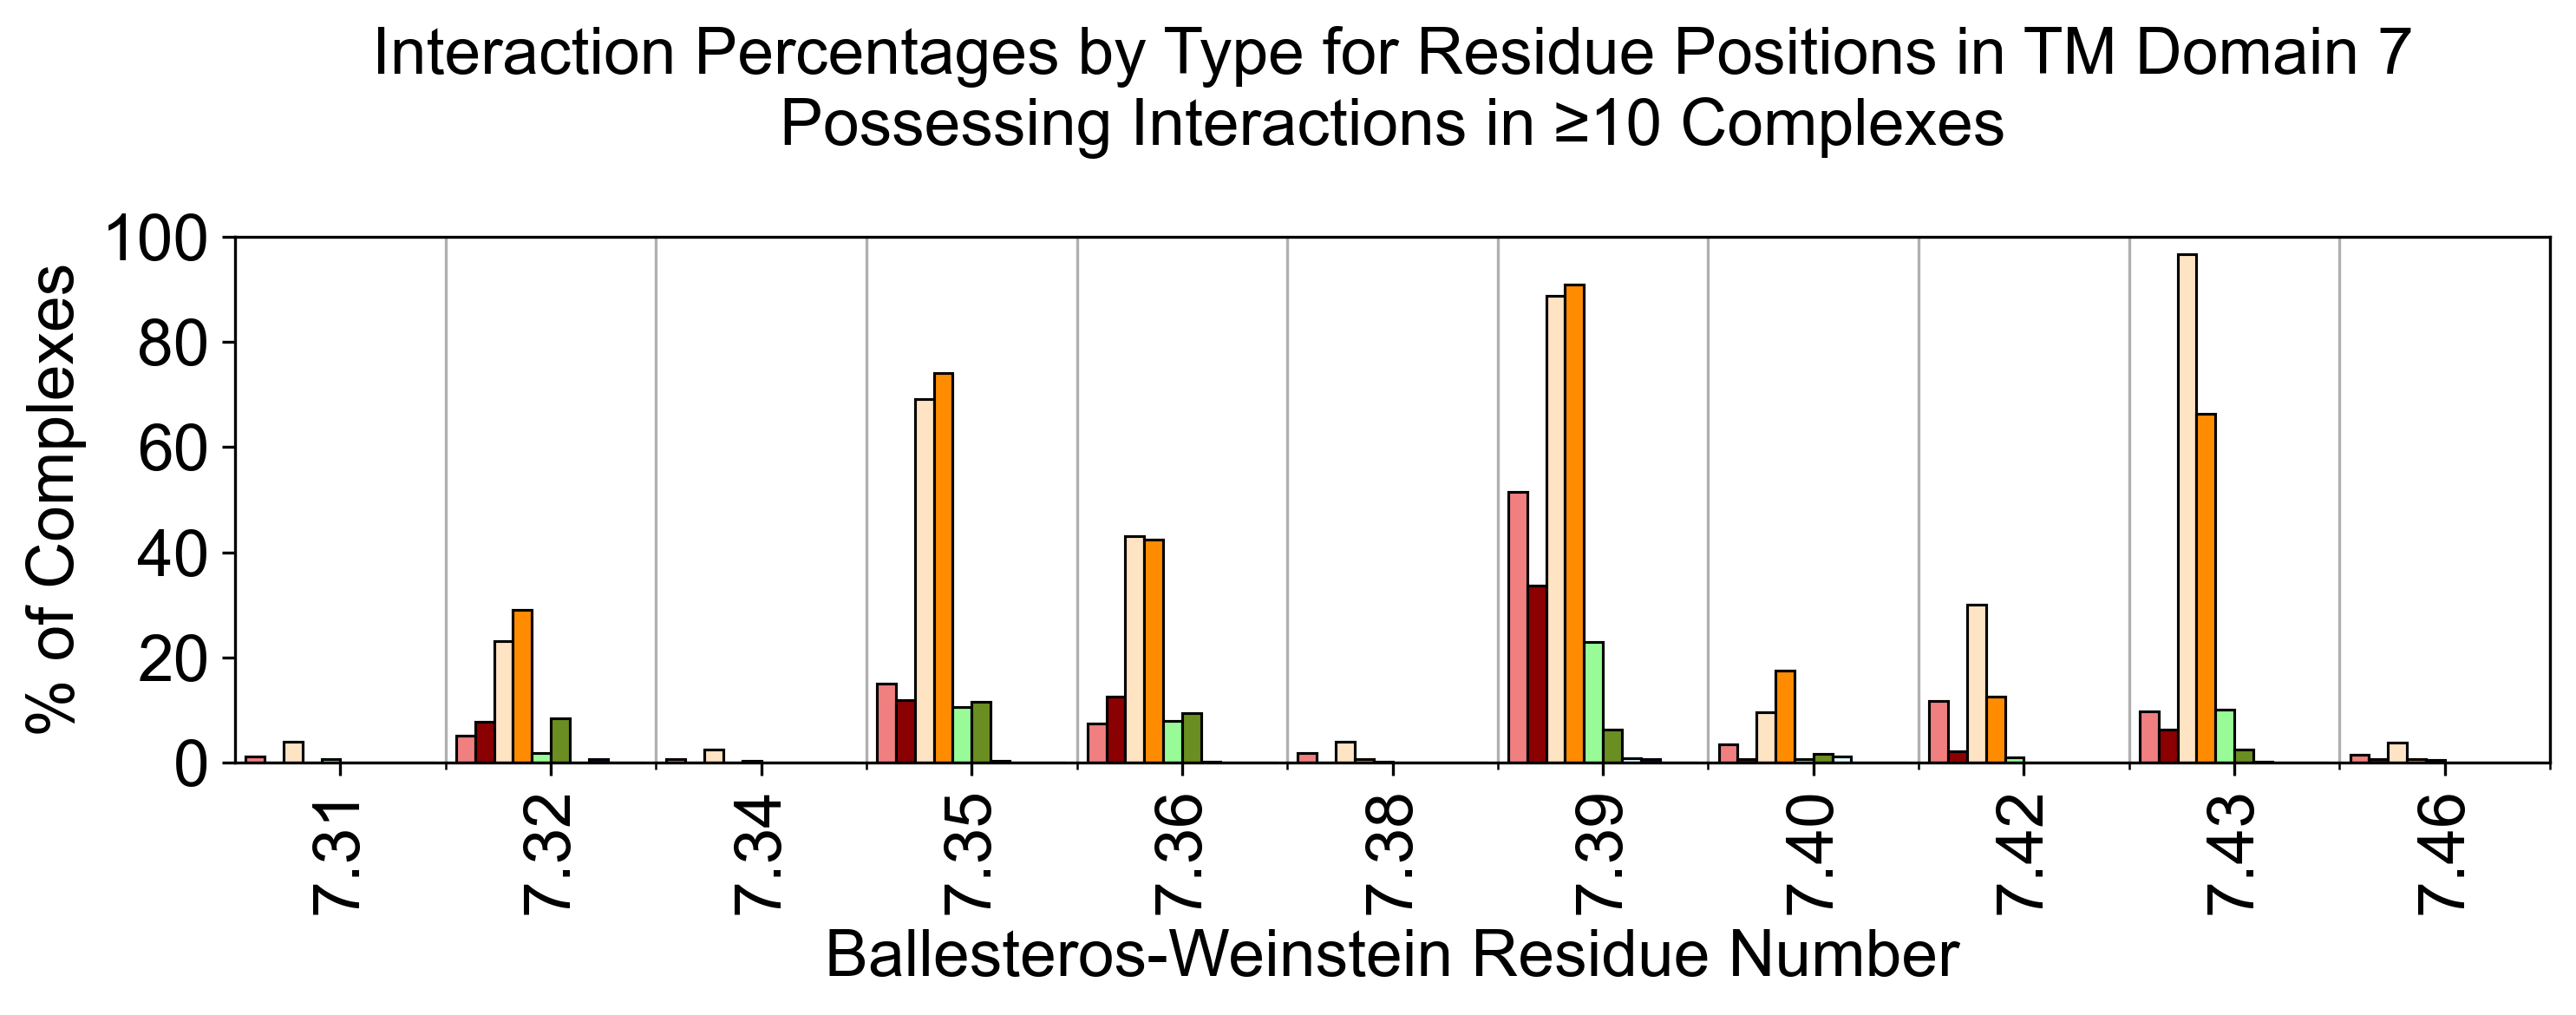

In [61]:
i = 0
for df in [TM1_inttype_cols,TM2_inttype_cols,TM3_inttype_cols,TM4_inttype_cols,TM5_inttype_cols,TM6_inttype_cols,TM7_inttype_cols]:
    i+=1
    gen_inttype_plots_classbased(df, i)

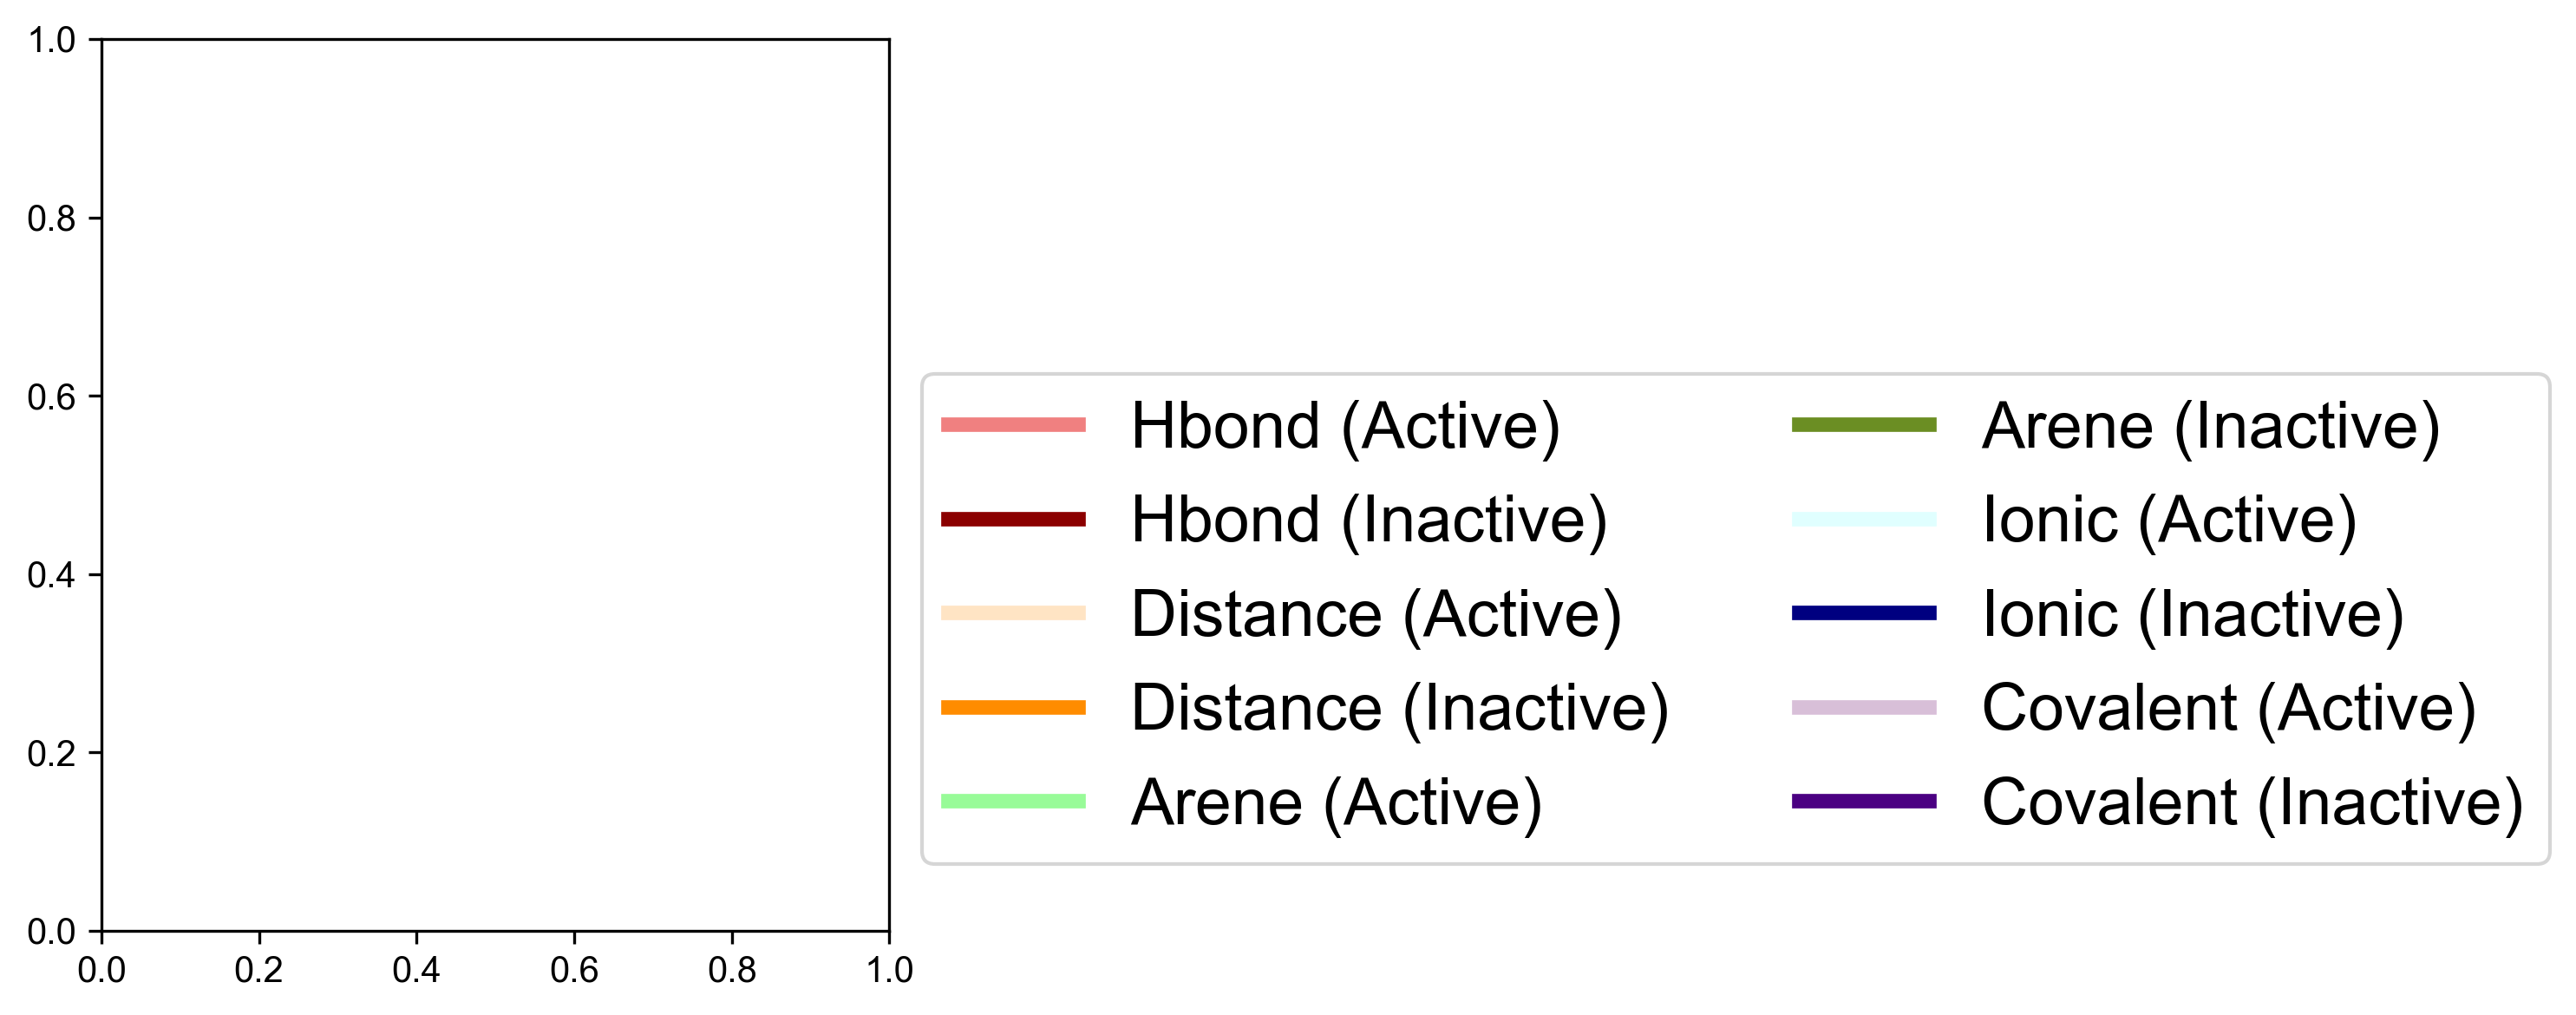

In [62]:
# plots
matplotlib.rcParams['figure.figsize'] = [10, 4] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
matplotlib.rcParams["font.family"] = "arial"
width = 0.18  # the width of the bars
fig, ax = plt.subplots()


#Add Legend
custom_lines = [Line2D([0], [0], color='lightcoral', lw=4),
                Line2D([0], [0], color='darkred', lw=4),
                Line2D([0], [0], color='bisque', lw=4),
                Line2D([0], [0], color='darkorange', lw=4),
                Line2D([0], [0], color='palegreen', lw=4),
                Line2D([0], [0], color='olivedrab', lw=4),
                Line2D([0], [0], color='lightcyan', lw=4),
                Line2D([0], [0], color='navy', lw=4),
                Line2D([0], [0], color='thistle', lw=4),
                Line2D([0], [0], color='indigo', lw=4)]

ax.legend(custom_lines, ['Hbond (Active)',
                         'Hbond (Inactive)',
                         'Distance (Active)',
                         'Distance (Inactive)',
                         'Arene (Active)',
                         'Arene (Inactive)',
                         'Ionic (Active)',
                         'Ionic (Inactive)',
                         'Covalent (Active)',
                         'Covalent (Inactive)'], fontsize = 18, loc='center left', bbox_to_anchor=(1, 0.35), ncol = 2)

fig.tight_layout()

plt.savefig('plots/manuscript_plots/intpercplot_bytype_legend.png', bbox_inches='tight')
plt.show()

In [64]:
structure_df_nonbinders[['6.52_inttype1', '6.52_inttype2']].apply(pd.Series.value_counts)

6.52_inttype1  6.52_inttype2
Arene                56             17
Distance             86            139
Hbond                28              7
None                115            122

In [244]:
len(structure_df_binders)

1250

---